# <span style="color : purple">Analysez des ventes d'une librairie avec Python</span>

# <span style="color : #8470FF">PARTIE 1 - Nettoyage des données</span>

1. **Importation des librairies**
2. **Chargement et nettoyage du fichier Transactions**
3. **Chargement et nettoyage du fichier Customers**
4. **Chargement et nettoyage du fichier Products**

# <span style="color : #8470FF">PARTIE 2 - Antoine : Analyse des indicateurs de ventes</span>

1. **Chiffre d'affaires : indicateurs, graphiques et évolution dans le temps**
2. **Chiffre d'affaires : décomposition en moyenne mobile (tendance globale)**
3. **Zoom sur les références : Tops et Flops**
4. **Zoom sur les références : Répartition par catégorie**
5. **Profils clients : Répartition du CA**
6. **Profils clients : informations**

# <span style="color : #8470FF">PARTIE 3 - Julie : Analyse des Clients</span>

1. **Lien entre le genre d’un client et les catégories des livres achetés**
2. **Lien entre l’âge des clients et le montant total des achats**
3. **Lien entre l’âge des clients et la fréquence d’achat**
4. **Lien entre l’âge des clients et la taille du panier moyen**
5. **Lien entre l’âge des clients et les catégories des livres achetés**

# <span style="color : #FFA500">PARTIE 1 - Nettoyage des données</span>

# <span style="color : #8470FF"><u>1 - Importation des librairies.</u></span>

On importe les différentes librairies :
- `pandas` pour les manipulations et l'analyse des données
- `numpy` pour réaliser des calculs sur des tableaux ou des matrices
- `matplotlib` pour tracer ou visualiser les données sous forme de graphique
- `datetime` pour gérer les formats de date et de temps
- `scipy.stats` pour avoir les fonctions statistiques et de probabilité
- `plotly` pour tracer ou visualiser les données sous forme de graphique de manière esthétique
- `locale` pour avoir le format français dans la présentation des chiffres
- `statsmodels`pour faire le test statistique Tukey

In [1]:
import numpy as np
import warnings
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use("tkAgg")
%matplotlib inline
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import seaborn as sns
from datetime import datetime
from scipy.stats import chi2_contingency, pearsonr, f_oneway, shapiro, spearmanr, kruskal
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from statsmodels.stats.multicomp import pairwise_tukeyhsd

import locale
locale.setlocale(locale.LC_NUMERIC, 'fr_FR.UTF-8')


'fr_FR.UTF-8'

# <span style="color : #8470FF"><u>Données</u></span>

In [2]:
transactions = pd.read_csv(r"C:\Users\david\OneDrive\Perso\Essai P9\transactions.csv", sep=';')
customers = pd.read_csv(r"C:\Users\david\OneDrive\Perso\Essai P9\customers.csv", sep=';')
products = pd.read_csv(r"C:\Users\david\OneDrive\Perso\Essai P9\products.csv", sep=';')

# <span style="color : #8470FF"><u>1 - Chargement et nettoyage du fichier Transactions.</u></span>

### <span style="color : blue">Informations sur le fichier transactions et son analyse.</span>

In [3]:
# Observation des 5 premiers lignes de l'échantillon
transactions.head(5)

id_prod                        date session_id client_id
0  0_1518  2022-05-20 13:21:29.043970   s_211425     c_103
1   1_251  2022-02-02 07:55:19.149409   s_158752    c_8534
2  0_1277  2022-06-18 15:44:33.155329   s_225667    c_6714
3   2_209  2021-06-24 04:19:29.835891    s_52962    c_6941
4  0_1509  2023-01-11 08:22:08.194479   s_325227    c_4232

In [4]:
# Forme du jeu de donnés
transactions.shape

(679532, 4)

* Nous avions enregistré 679532 transactions c'est à dire chaque ligne représente une vente par produit et par client en 4 colonnes (caractéristiques).

In [5]:
# Vérifions
len(transactions["id_prod"]) == len(transactions)

True

In [6]:
# Vérifions
len(transactions["client_id"]) == len(transactions)

True

In [7]:
# Pourcentages des valeurs nulls
pourcentage_valeur_null = round((transactions.isnull().sum()/transactions.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

id_prod       0.0
date          0.0
session_id    0.0
client_id     0.0
dtype: float64

In [8]:
# Vérification des doublons
transactions[transactions.duplicated()].shape

(126, 4)

In [9]:
# Vérification des doublons
transactions[transactions.duplicated(["id_prod"])].shape

(676265, 4)

In [10]:
# Vérification des doublons
transactions[transactions.duplicated(["client_id"])].shape

(670930, 4)

In [11]:
# Vérification des doublons
transactions[transactions.duplicated(["session_id"])].shape

(337216, 4)

* Nous pouvons dire que les ventes ayant les mêmes identifiants ("session_id") viennent des commandes de client qui ont acheté plusieurs produits en même temps dans le cadre de la même commande.
* Pour cela nous n'allons pas supprimer ces lignes.

In [12]:
# Garder les doublons
#data_transactions[data_transactions.duplicated(["session_id"], keep = False)].shape
data_duplicad = transactions[transactions["session_id"].duplicated(keep = False)].shape
data_duplicad

(516182, 4)

In [13]:
# Vérification des doublons
transactions[transactions.duplicated(["date"])]

id_prod                             date session_id client_id
23678      T_0  test_2021-03-01 02:30:02.237430        s_0      ct_1
27778      T_0  test_2021-03-01 02:30:02.237437        s_0      ct_1
52424      T_0  test_2021-03-01 02:30:02.237419        s_0      ct_0
82253      T_0  test_2021-03-01 02:30:02.237427        s_0      ct_1
92684      T_0  test_2021-03-01 02:30:02.237444        s_0      ct_1
...        ...                              ...        ...       ...
657830     T_0  test_2021-03-01 02:30:02.237417        s_0      ct_0
662081     T_0  test_2021-03-01 02:30:02.237427        s_0      ct_1
670680     T_0  test_2021-03-01 02:30:02.237449        s_0      ct_1
671647     T_0  test_2021-03-01 02:30:02.237424        s_0      ct_1
679180     T_0  test_2021-03-01 02:30:02.237425        s_0      ct_1

[161 rows x 4 columns]

In [14]:
# Typages de données
info = transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [15]:
# Statistiques descriptives
statistique = transactions.describe(include = "all").T
statistique

count  unique                              top   freq
id_prod     679532    3267                            1_369   2252
date        679532  679371  test_2021-03-01 02:30:02.237413     13
session_id  679532  342316                              s_0    200
client_id   679532    8602                           c_1609  25488

* Nous constatons après la statistique descriptive qu'il y'a erreurs sur certaines des dates, nous allons créer un mask pour en savoir plus sur ces dates

In [16]:
# Créer un mask pour afficher les transactions tests
transactions[transactions["date"] == "test_2021-03-01 02:30:02.237413"]

id_prod                             date session_id client_id
85486      T_0  test_2021-03-01 02:30:02.237413        s_0      ct_1
103119     T_0  test_2021-03-01 02:30:02.237413        s_0      ct_0
165314     T_0  test_2021-03-01 02:30:02.237413        s_0      ct_1
213273     T_0  test_2021-03-01 02:30:02.237413        s_0      ct_0
236225     T_0  test_2021-03-01 02:30:02.237413        s_0      ct_0
255856     T_0  test_2021-03-01 02:30:02.237413        s_0      ct_1
394969     T_0  test_2021-03-01 02:30:02.237413        s_0      ct_0
412584     T_0  test_2021-03-01 02:30:02.237413        s_0      ct_0
427604     T_0  test_2021-03-01 02:30:02.237413        s_0      ct_0
440821     T_0  test_2021-03-01 02:30:02.237413        s_0      ct_0
458295     T_0  test_2021-03-01 02:30:02.237413        s_0      ct_1
459137     T_0  test_2021-03-01 02:30:02.237413        s_0      ct_0
525579     T_0  test_2021-03-01 02:30:02.237413        s_0      ct_0

In [17]:
# Créer un mask pour afficher les transactions tests
transactions[transactions["date"] == "test_2021-03-01 02:30:02.237420"]

id_prod                             date session_id client_id
92834      T_0  test_2021-03-01 02:30:02.237420        s_0      ct_0
181233     T_0  test_2021-03-01 02:30:02.237420        s_0      ct_1
285945     T_0  test_2021-03-01 02:30:02.237420        s_0      ct_0
568854     T_0  test_2021-03-01 02:30:02.237420        s_0      ct_0
648864     T_0  test_2021-03-01 02:30:02.237420        s_0      ct_1

* Nous constatons des transactions tests réalisées avec deux comptes clients "ct_1" et "ct_0" ( à voir sur la table client ) chaque "2021-03-01" sur le produit "T_0" , qui ont tous le même session "s_0" (200 lignes concernées).
* Ces tests sont sûrement des transactions fictives lors de lancement du site.
* Pour cela nous allons supprimer ces lignes avec des sessions identiques (200 lignes).
* Ensuite convertir la colonne "date" au bon format (date)
* Enfin utiliser la fonction "split" pour diviser une chaine en une liste en spécifiant le séparateur.

In [18]:
# Créer un mask
#data_transactions[data_transactions["id_prod"] == "T_0"].index
transactions[transactions["session_id"] == "s_0"].index

# suppression des lignes 
transactions = transactions.drop(transactions[transactions["session_id"] == "s_0"].index)

In [19]:
# Diviser la chaine
transactions["date"] = transactions["date"].str.split('_', n = 1, expand = True)[0]
transactions["date"] = transactions["date"].str.split('.', n = 1, expand = True)[0]

In [20]:
# Observation des 5 premiers lignes de l'échantillon
transactions.head(5)

id_prod                 date session_id client_id
0  0_1518  2022-05-20 13:21:29   s_211425     c_103
1   1_251  2022-02-02 07:55:19   s_158752    c_8534
2  0_1277  2022-06-18 15:44:33   s_225667    c_6714
3   2_209  2021-06-24 04:19:29    s_52962    c_6941
4  0_1509  2023-01-11 08:22:08   s_325227    c_4232

In [21]:
# Convertir au format date
transactions["date"] = pd.to_datetime(transactions["date"], errors = 'coerce')

In [22]:
# Observation des 5 premiers lignes de l'échantillon
transactions.head(5)

id_prod                date session_id client_id
0  0_1518 2022-05-20 13:21:29   s_211425     c_103
1   1_251 2022-02-02 07:55:19   s_158752    c_8534
2  0_1277 2022-06-18 15:44:33   s_225667    c_6714
3   2_209 2021-06-24 04:19:29    s_52962    c_6941
4  0_1509 2023-01-11 08:22:08   s_325227    c_4232

In [23]:
# Forme du jeu de donnés
transactions.shape

(679332, 4)

In [24]:
# Typages de données
info = transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


In [25]:
transactions.iloc[3019,1]

Timestamp('2023-02-01 18:14:25')

In [26]:
# Pourcentages des valeurs nulls
pourcentage_valeur_null = round((transactions.isnull().sum()/transactions.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

id_prod       0.0
date          0.0
session_id    0.0
client_id     0.0
dtype: float64

In [27]:
# Typage de données
info = transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


In [28]:
# faire une copie
transactions_copy = transactions.copy()

# <span style="color : #8470FF"><u>2 - Chargement et nettoyage du fichier Customers.</u></span>

### <span style="color : blue">Informations sur le fichier customers et son analyse.</span>

In [29]:
# Observation des 5 premiers lignes de l'échantillon
customers.head(5)

client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943

In [30]:
# Forme du jeu de donnés
customers.shape

(8623, 3)

* On a 8623 lignes(client enregistrés) c'est à dire chaque ligne représente un unique client et 3 colonnes (caractéristiques).

In [31]:
# Vérifions
len(customers["client_id"]) == len(customers)

True

In [32]:
# Pourcentages des valeurs nulls
pourcentage_valeur_null = round((customers.isnull().sum()/customers.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

client_id    0.0
sex          0.0
birth        0.0
dtype: float64

* Pas de valeurs manquantes

In [33]:
# Vérification des doublons
customers[customers.duplicated()]

Empty DataFrame
Columns: [client_id, sex, birth]
Index: []

In [34]:
# Vérification des doublons
customers[customers.duplicated(["client_id"])]

Empty DataFrame
Columns: [client_id, sex, birth]
Index: []

* Nous constatons l'absence de doublons après vérification.

In [35]:
# Typage de données
info = customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


* Les colonnes sont au bon format.

In [36]:
# Afficher les différentes modalités
customers["client_id"].unique()

array(['c_4410', 'c_7839', 'c_1699', ..., 'c_5119', 'c_5643', 'c_84'],
      dtype=object)

* Nous constatons dans la table "transactions", deux identifiants clients qui étaient utilisés lors du lancement du site.
* Nous allons vérifier si ces identifiants clients sont aussi présents dans cette table.

In [37]:
# Créer un mask
customers[customers["client_id"] == "ct_1"]

client_id sex  birth
8494      ct_1   m   2001

In [38]:
# Créer un mask
customers[customers["client_id"] == "ct_0"]

client_id sex  birth
2735      ct_0   f   2001

* Nous constatons la présence de ces identifiants clients.
* Il s'agit des clients tests nés en 2001 avec comme identifiants : "ct_0" pour indiquer que c'est une fille et "ct_1" pour indiquer que c'est un garçon.
* Comme ils servent de test ces deux identifiants , dans ce cas nous allons les supprimer.

In [39]:
# Suppression de ces clients tests
customers = customers.drop(customers[customers["client_id"] == "ct_1"].index)
customers = customers.drop(customers[customers["client_id"] == "ct_0"].index)

* Nous allons créer une nouvelle colonne pour calculer l'âge actuelle de chacun des clients à partir de l'année en cours des dernières données 2023

In [40]:
# Création de nouvelles colonnes

# Age actuelle à partir de l'année en cours
from datetime import datetime

# Date et l'heure actuelle
now = datetime.now()

# Pour chaque client, on calcule l'age
customers['age'] = 2023 - customers['birth']


In [41]:
# Statistiques descriptives après convertion
statistique = customers.describe(include = "all").T
statistique

count unique     top  freq         mean        std     min  \
client_id    8621   8621  c_4410     1          NaN        NaN     NaN   
sex          8621      2       f  4490          NaN        NaN     NaN   
birth      8621.0    NaN     NaN   NaN  1978.275606  16.917958  1929.0   
age        8621.0    NaN     NaN   NaN    44.724394  16.917958    19.0   

              25%     50%     75%     max  
client_id     NaN     NaN     NaN     NaN  
sex           NaN     NaN     NaN     NaN  
birth      1966.0  1979.0  1992.0  2004.0  
age          31.0    44.0    57.0    94.0

* Nous constatons que nous n'avons pas de valeurs aberrantes parce que l'âge minimum est de 19ans et l'âge maximum est de 94ans.

On rajoute la tranche d'âge de chaque client.

In [42]:
# Liste de conditions à associer à la liste de choix
list_condition = [
    (customers['age'] >= 65),
    (customers['age'] >= 55),
    (customers['age'] >= 45),
    (customers['age'] >= 35),
    (customers['age'] >= 25),
    (customers['age'] >= 18),
    (customers['age'] < 18)]

# Liste de choix 
list_choix = ['65 et plus', '55 - 64','45 - 54', '35 - 44', '25 - 34', '18 - 24', 'moins de 18']

# création de la colonne 'tranche_age' en fonction des conditions précédentes
customers['tranche_age'] = np.select(list_condition, list_choix, default  = 'Not Specified')
customers

client_id sex  birth  age tranche_age
0       c_4410   f   1967   56     55 - 64
1       c_7839   f   1975   48     45 - 54
2       c_1699   f   1984   39     35 - 44
3       c_5961   f   1962   61     55 - 64
4       c_5320   m   1943   80  65 et plus
...        ...  ..    ...  ...         ...
8618    c_7920   m   1956   67  65 et plus
8619    c_7403   f   1970   53     45 - 54
8620    c_5119   m   1974   49     45 - 54
8621    c_5643   f   1968   55     55 - 64
8622      c_84   f   1982   41     35 - 44

[8621 rows x 5 columns]

In [43]:
# Typage de données
info = customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8621 entries, 0 to 8622
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   client_id    8621 non-null   object
 1   sex          8621 non-null   object
 2   birth        8621 non-null   int64 
 3   age          8621 non-null   int64 
 4   tranche_age  8621 non-null   object
dtypes: int64(2), object(3)
memory usage: 404.1+ KB


In [44]:
customers.head()

client_id sex  birth  age tranche_age
0    c_4410   f   1967   56     55 - 64
1    c_7839   f   1975   48     45 - 54
2    c_1699   f   1984   39     35 - 44
3    c_5961   f   1962   61     55 - 64
4    c_5320   m   1943   80  65 et plus

In [45]:
# faire une copie
customers_copy = customers.copy()

# <span style="color : #8470FF"><u>3 - Chargement et nettoyage du fichier Products.</u></span>

### <span style="color : blue">Informations sur le fichier products et son analyse.</span>

In [46]:
# Observation des 5 premiers lignes de l'échantillon
products.head(5)

id_prod  price  categ
0  0_1421  19.99      0
1  0_1368   5.13      0
2   0_731  17.99      0
3   1_587   4.99      1
4  0_1507   3.99      0

In [47]:
# Forme du jeu de donnés
products.shape

(3287, 3)

Nous avions 3287 produits c'est à dire chaque ligne représente un produit de la librairie avec 3 colonnes (caractéristiques).

In [48]:
# Vérifions
len(products["id_prod"]) == len(products)

True

In [49]:
# Pourcentages des valeurs nulls
pourcentage_valeur_null = round((products.isnull().sum()/products.shape[0]*100),2).sort_values(ascending=False)
pourcentage_valeur_null

id_prod    0.0
price      0.0
categ      0.0
dtype: float64

In [50]:
# Vérification des doublons
products[products.duplicated(["id_prod"])]

Empty DataFrame
Columns: [id_prod, price, categ]
Index: []

In [51]:
# Typage de données
info = products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [52]:
# Statistiques descriptives
statistique = products.describe(include = "all").T
statistique

count unique     top freq       mean        std  min   25%    50%  \
id_prod    3287   3287  0_1421    1        NaN        NaN  NaN   NaN    NaN   
price    3287.0    NaN     NaN  NaN  21.856641  29.847908 -1.0  6.99  13.06   
categ    3287.0    NaN     NaN  NaN   0.370246   0.615387  0.0   0.0    0.0   

           75%    max  
id_prod    NaN    NaN  
price    22.99  300.0  
categ      1.0    2.0

* Nous constatons d'après la statistique descriptive le prix d'un produit négatif et égale à "-1€" 
* Il s'agit du produit "T_0" qui sert de test du site en lignes.
* Nous allons supprimer ces lignes.

In [53]:
# Créer un mask pour afficher la ligne
products[products["price"] == -1.0]

id_prod  price  categ
731     T_0   -1.0      0

In [54]:
# Créer un mask
products[products["id_prod"] == "T_0"].index

# suppression des lignes 
transactions = products.drop(products[products["id_prod"] == "T_0"].index)

In [55]:
# Afficher les différentes modalités (Trouver les éléments uniques de la colonnes)
products["categ"].unique()

array([0, 1, 2], dtype=int64)

* Après affichage nous obtenons qu'il y a 3 types de catégorie de produits.

In [56]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [57]:
# faire une copie
products_copy = products.copy()

# <span style="color : #8470FF"><u>Jointures</u></span>

* Dans cette parti nous allons faire deux jointures externes c'est à dire garder toutes les observations des deux dataframes avec leurs identifiants clés pour chaque dataframe qui permettent la jointure;
* La première jointure sera avec les dataframes transactions customers.
* Ensuite la deuxième jointure sera le résultat obtenu lors de la première jointure avec à nouveau le dataframe products pour obtenu un dataframe final.

In [58]:
# verifier le nombre de colonne et ligne avant jointure
print(transactions_copy.shape), print(transactions_copy.columns)
print("---------------------------------------------------------")
print(customers_copy.shape), print(customers_copy.columns)
print("---------------------------------------------------------")
print(products_copy.shape), print(products_copy.columns)
print("---------------------------------------------------------")

(679332, 4)
Index(['id_prod', 'date', 'session_id', 'client_id'], dtype='object')
---------------------------------------------------------
(8621, 5)
Index(['client_id', 'sex', 'birth', 'age', 'tranche_age'], dtype='object')
---------------------------------------------------------
(3287, 3)
Index(['id_prod', 'price', 'categ'], dtype='object')
---------------------------------------------------------


* Nous allons faire la jointure des deux tables "df_transactions" qui est la table des transactions et "customers" qui est la table customers

In [59]:
# verifier le nombre de colonne et ligne avant jointure
print(transactions_copy.shape)
print(customers_copy.shape)
print(products_copy.shape)

(679332, 4)
(8621, 5)
(3287, 3)


In [60]:
# jointure des deux dataframes
df_transa_custo = pd.merge(transactions_copy, customers_copy, on = "client_id", how = "outer", indicator = True)
print(df_transa_custo.shape)
df_transa_custo.head(3)                         

(679353, 9)


id_prod                date session_id client_id sex  birth  age  \
0  0_1518 2022-05-20 13:21:29   s_211425     c_103   f   1986   37   
1  0_1627 2022-06-18 05:55:31   s_225494     c_103   f   1986   37   
2  0_1104 2023-02-08 17:31:06   s_338755     c_103   f   1986   37   

  tranche_age _merge  
0     35 - 44   both  
1     35 - 44   both  
2     35 - 44   both

In [61]:
# verifier le nombre de colonne et ligne après jointure
print(df_transa_custo.shape)

(679353, 9)


In [62]:
# vérifier les valeurs manquantes après jointure
pourcentage_valeur_null = round(df_transa_custo.isnull().sum()/df_transa_custo.shape[0]*100,2).sort_values(ascending = False)
pourcentage_valeur_null

id_prod        0.0
date           0.0
session_id     0.0
client_id      0.0
sex            0.0
birth          0.0
age            0.0
tranche_age    0.0
_merge         0.0
dtype: float64

In [63]:
# On regarde si la colonne _merge contient autre chose que des 'both'
df_test_join1 = df_transa_custo[df_transa_custo['_merge']!='both']

# On observe
print(df_test_join1.shape)
df_test_join1.head()

(21, 9)


id_prod date session_id client_id sex  birth  age tranche_age  \
679332     NaN  NaT        NaN    c_8253   f   2001   22     18 - 24   
679333     NaN  NaT        NaN    c_3789   f   1997   26     25 - 34   
679334     NaN  NaT        NaN    c_4406   f   1998   25     25 - 34   
679335     NaN  NaT        NaN    c_2706   f   1967   56     55 - 64   
679336     NaN  NaT        NaN    c_3443   m   1959   64     55 - 64   

            _merge  
679332  right_only  
679333  right_only  
679334  right_only  
679335  right_only  
679336  right_only

In [64]:
# suppression de la colonne  '_merge'
df_transa_custo = df_transa_custo.drop(columns = ['_merge'])

### <span style="color : blue"> 2eme Jointure</span>

In [65]:
# jointure des deux dataframes
df_final = pd.merge(df_transa_custo, products_copy, on = "id_prod", how = "outer", indicator = True)
print(df_final.shape)
df_final.head(3)   

(679375, 11)


id_prod                date session_id client_id sex   birth   age  \
0  0_1518 2022-05-20 13:21:29   s_211425     c_103   f  1986.0  37.0   
1  0_1518 2021-07-20 13:21:29    s_64849     c_103   f  1986.0  37.0   
2  0_1518 2022-08-20 13:21:29   s_255965     c_103   f  1986.0  37.0   

  tranche_age  price  categ _merge  
0     35 - 44   4.18    0.0   both  
1     35 - 44   4.18    0.0   both  
2     35 - 44   4.18    0.0   both

In [66]:
# verifier le nombre de colonne et ligne après jointure
print(df_final.shape)

(679375, 11)


In [67]:
# vérifier les valeurs manquantes après jointure
pourcentage_valeur_null = round(df_final.isnull().sum()/df_final.shape[0]*100,2).sort_values(ascending = False)
pourcentage_valeur_null

price          0.04
categ          0.04
date           0.01
session_id     0.01
id_prod        0.00
client_id      0.00
sex            0.00
birth          0.00
age            0.00
tranche_age    0.00
_merge         0.00
dtype: float64

In [68]:
# On regarde si la colonne _merge contient autre chose que des 'both'
df_test_join2 = df_final[df_final['_merge']!='both']

# On observe
print(df_test_join2.shape)
df_test_join2.head()

(264, 11)


id_prod                date session_id client_id sex   birth   age  \
311747  0_2245 2021-04-22 04:57:20    s_23987    c_6714   f  1968.0  55.0   
311748  0_2245 2021-06-05 17:04:43    s_44481    c_6714   f  1968.0  55.0   
311749  0_2245 2022-04-05 17:04:43   s_189669    c_6714   f  1968.0  55.0   
311750  0_2245 2022-05-05 17:04:43   s_204093    c_6714   f  1968.0  55.0   
311751  0_2245 2022-12-05 17:04:43   s_307520    c_6714   f  1968.0  55.0   

       tranche_age  price  categ     _merge  
311747     55 - 64    NaN    NaN  left_only  
311748     55 - 64    NaN    NaN  left_only  
311749     55 - 64    NaN    NaN  left_only  
311750     55 - 64    NaN    NaN  left_only  
311751     55 - 64    NaN    NaN  left_only

In [69]:
# suppression de la colonne  '_merge'
df_final = df_final.drop(columns = ['_merge'])

In [70]:
# valeurs manquantes par colonnes
df_final.isnull().sum()

id_prod         21
date            43
session_id      43
client_id       22
sex             22
birth           22
age             22
tranche_age     22
price          242
categ          242
dtype: int64

* Après la vérification des valeurs manquantes, nous allons afficher ces différentes colonnes au format dataframe pour en savoir plus la raison de ces valeurs manquantes.

In [71]:
# afficher la colonne price
df_final[df_final["price"].isnull()]

id_prod                date session_id client_id sex   birth   age  \
311747  0_2245 2021-04-22 04:57:20    s_23987    c_6714   f  1968.0  55.0   
311748  0_2245 2021-06-05 17:04:43    s_44481    c_6714   f  1968.0  55.0   
311749  0_2245 2022-04-05 17:04:43   s_189669    c_6714   f  1968.0  55.0   
311750  0_2245 2022-05-05 17:04:43   s_204093    c_6714   f  1968.0  55.0   
311751  0_2245 2022-12-05 17:04:43   s_307520    c_6714   f  1968.0  55.0   
...        ...                 ...        ...       ...  ..     ...   ...   
679348     NaN                 NaT        NaN     c_862   f  1956.0  67.0   
679349     NaN                 NaT        NaN    c_7584   f  1960.0  63.0   
679350     NaN                 NaT        NaN      c_90   m  2001.0  22.0   
679351     NaN                 NaT        NaN     c_587   m  1993.0  30.0   
679352     NaN                 NaT        NaN    c_3526   m  1956.0  67.0   

       tranche_age  price  categ  
311747     55 - 64    NaN    NaN  
311748     55 - 64    NaN    NaN  
311749     55 - 64    NaN    NaN  
311750     55 - 64    NaN    NaN  
311751     55 - 64    NaN    NaN  
...            ...    ...    ...  
679348  65 et plus    NaN    NaN  
679349     55 - 64    NaN    NaN  
679350     18 - 24    NaN    NaN  
679351     25 - 34    NaN    NaN  
679352  65 et plus    NaN    NaN  

[242 rows x 10 columns]

In [72]:
# Créer un mask
df_mask = df_final[(df_final["id_prod"] == "0_2245") & (df_final["categ"] != 0) ]
df_mask

id_prod                date session_id client_id sex   birth   age  \
311747  0_2245 2021-04-22 04:57:20    s_23987    c_6714   f  1968.0  55.0   
311748  0_2245 2021-06-05 17:04:43    s_44481    c_6714   f  1968.0  55.0   
311749  0_2245 2022-04-05 17:04:43   s_189669    c_6714   f  1968.0  55.0   
311750  0_2245 2022-05-05 17:04:43   s_204093    c_6714   f  1968.0  55.0   
311751  0_2245 2022-12-05 17:04:43   s_307520    c_6714   f  1968.0  55.0   
...        ...                 ...        ...       ...  ..     ...   ...   
311963  0_2245 2021-10-19 09:32:03   s_107022    c_6128   m  1986.0  37.0   
311964  0_2245 2021-11-12 09:25:22   s_118458    c_7416   m  1933.0  90.0   
311965  0_2245 2021-08-22 08:51:27    s_79102    c_6752   m  1987.0  36.0   
311966  0_2245 2022-04-22 08:51:27   s_197669    c_6752   m  1987.0  36.0   
311967  0_2245 2021-05-20 07:44:21    s_36985    c_1450   f  1959.0  64.0   

       tranche_age  price  categ  
311747     55 - 64    NaN    NaN  
311748     55 - 64    NaN    NaN  
311749     55 - 64    NaN    NaN  
311750     55 - 64    NaN    NaN  
311751     55 - 64    NaN    NaN  
...            ...    ...    ...  
311963     35 - 44    NaN    NaN  
311964  65 et plus    NaN    NaN  
311965     35 - 44    NaN    NaN  
311966     35 - 44    NaN    NaN  
311967     55 - 64    NaN    NaN  

[221 rows x 10 columns]

In [73]:
# afficher la colonne id_prod
df_final[df_final["id_prod"].isnull()]

id_prod date session_id client_id sex   birth   age tranche_age  price  \
679332     NaN  NaT        NaN    c_8253   f  2001.0  22.0     18 - 24    NaN   
679333     NaN  NaT        NaN    c_3789   f  1997.0  26.0     25 - 34    NaN   
679334     NaN  NaT        NaN    c_4406   f  1998.0  25.0     25 - 34    NaN   
679335     NaN  NaT        NaN    c_2706   f  1967.0  56.0     55 - 64    NaN   
679336     NaN  NaT        NaN    c_3443   m  1959.0  64.0     55 - 64    NaN   
679337     NaN  NaT        NaN    c_4447   m  1956.0  67.0  65 et plus    NaN   
679338     NaN  NaT        NaN    c_3017   f  1992.0  31.0     25 - 34    NaN   
679339     NaN  NaT        NaN    c_4086   f  1992.0  31.0     25 - 34    NaN   
679340     NaN  NaT        NaN    c_6930   m  2004.0  19.0     18 - 24    NaN   
679341     NaN  NaT        NaN    c_4358   m  1999.0  24.0     18 - 24    NaN   
679342     NaN  NaT        NaN    c_8381   f  1965.0  58.0     55 - 64    NaN   
679343     NaN  NaT        NaN    c_1223   m  1963.0  60.0     55 - 64    NaN   
679344     NaN  NaT        NaN    c_6862   f  2002.0  21.0     18 - 24    NaN   
679345     NaN  NaT        NaN    c_5245   f  2004.0  19.0     18 - 24    NaN   
679346     NaN  NaT        NaN    c_5223   m  2003.0  20.0     18 - 24    NaN   
679347     NaN  NaT        NaN    c_6735   m  2004.0  19.0     18 - 24    NaN   
679348     NaN  NaT        NaN     c_862   f  1956.0  67.0  65 et plus    NaN   
679349     NaN  NaT        NaN    c_7584   f  1960.0  63.0     55 - 64    NaN   
679350     NaN  NaT        NaN      c_90   m  2001.0  22.0     18 - 24    NaN   
679351     NaN  NaT        NaN     c_587   m  1993.0  30.0     25 - 34    NaN   
679352     NaN  NaT        NaN    c_3526   m  1956.0  67.0  65 et plus    NaN   

        categ  
679332    NaN  
679333    NaN  
679334    NaN  
679335    NaN  
679336    NaN  
679337    NaN  
679338    NaN  
679339    NaN  
679340    NaN  
679341    NaN  
679342    NaN  
679343    NaN  
679344    NaN  
679345    NaN  
679346    NaN  
679347    NaN  
679348    NaN  
679349    NaN  
679350    NaN  
679351    NaN  
679352    NaN

* Nous constatons que le produit avec l'identifiant "0_2245" a été vendu 221 fois en différentes sessions et par différents clients mais sans prix et catégorie référencés.
* Nous pouvons remplacer les catégories de produits par 0 (car le 1er chiffre de l'identifiant du produit désigne la catégorie) et pour le prix prendre la mediane (moins sensible aux valeurs aberrantes) des prix de la catégorie 0.
* Ensuite on retrouve 22 clients qui ont un compte sur le site mais qui n'ont jamais fait d'achat (session_id = NaN), dans ce cas nous allons les ignorer.
* De même on retrouve 21 produits sur le site qui n'ont jamais été vendu, nous allons les ignorer. 

In [74]:
# Remplacer les catégories de produit manquants
df_final["categ"] = np.where(df_final["id_prod"] == "0_2245", 0, df_final["categ"])

# Remplacer les prix manquants par la mediane
df_final["price"] = np.where(df_final["id_prod"] == "0_2245", 
                                           df_final.loc[(df_final["categ"]==0),"price"].median(),
                                           df_final["price"])

In [75]:
# faire une copie
dff = df_final.copy()
# renommer les valeurs de la colonne
df_final.loc[(df_final["categ"] == 0, "categ")] = "categ_0"
df_final.loc[(df_final["categ"] == 1, "categ")] = "categ_1"
df_final.loc[(df_final["categ"] == 2, "categ")] = "categ_2"

C:\Users\david\AppData\Local\Temp\ipykernel_26380\1180594272.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'categ_0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_final.loc[(df_final["categ"] == 0, "categ")] = "categ_0"


In [76]:
df_final.nunique()

id_prod          3288
date           675678
session_id     342315
client_id        8621
sex                 2
birth              76
age                76
tranche_age         6
price            1455
categ               3
dtype: int64

In [77]:
# afficher à nouveau les valeurs manquantes par colonnes
df_final.isnull().sum()

id_prod        21
date           43
session_id     43
client_id      22
sex            22
birth          22
age            22
tranche_age    22
price          21
categ          21
dtype: int64

* Nous obtenons toujours des valeurs manquantes dans les colonnes mais de très faible quantité, pour cela nous allons les supprimer pour la suite de l'analyse.

In [78]:
# Suppression des valeurs manquantes
df_final = df_final.dropna()

# la dimension
print(df_final.shape)

data_final = df_final.copy()

(679332, 10)


In [79]:
# afficher à nouveau les valeurs manquantes par colonnes
data_final.isnull().sum()

id_prod        0
date           0
session_id     0
client_id      0
sex            0
birth          0
age            0
tranche_age    0
price          0
categ          0
dtype: int64

In [80]:
# Convertir au bon format
data_final["categ"] = data_final["categ"].astype(object)

In [81]:
data_final['day'] = data_final['date'].dt.date
print(data_final.head())

  id_prod                date session_id client_id sex   birth   age  \
0  0_1518 2022-05-20 13:21:29   s_211425     c_103   f  1986.0  37.0   
1  0_1518 2021-07-20 13:21:29    s_64849     c_103   f  1986.0  37.0   
2  0_1518 2022-08-20 13:21:29   s_255965     c_103   f  1986.0  37.0   
3  0_1518 2021-05-09 11:52:55    s_32104    c_6714   f  1968.0  55.0   
4  0_1518 2022-05-30 01:17:07   s_216118    c_6714   f  1968.0  55.0   

  tranche_age  price    categ         day  
0     35 - 44   4.18  categ_0  2022-05-20  
1     35 - 44   4.18  categ_0  2021-07-20  
2     35 - 44   4.18  categ_0  2022-08-20  
3     55 - 64   4.18  categ_0  2021-05-09  
4     55 - 64   4.18  categ_0  2022-05-30  


In [82]:
# Je passe maintenant le format de la date à un format aaaa-mm.

data_final['month'] = pd.to_datetime(data_final['day']).dt.strftime('%Y-%m')
data_final.head()

id_prod                date session_id client_id sex   birth   age  \
0  0_1518 2022-05-20 13:21:29   s_211425     c_103   f  1986.0  37.0   
1  0_1518 2021-07-20 13:21:29    s_64849     c_103   f  1986.0  37.0   
2  0_1518 2022-08-20 13:21:29   s_255965     c_103   f  1986.0  37.0   
3  0_1518 2021-05-09 11:52:55    s_32104    c_6714   f  1968.0  55.0   
4  0_1518 2022-05-30 01:17:07   s_216118    c_6714   f  1968.0  55.0   

  tranche_age  price    categ         day    month  
0     35 - 44   4.18  categ_0  2022-05-20  2022-05  
1     35 - 44   4.18  categ_0  2021-07-20  2021-07  
2     35 - 44   4.18  categ_0  2022-08-20  2022-08  
3     55 - 64   4.18  categ_0  2021-05-09  2021-05  
4     55 - 64   4.18  categ_0  2022-05-30  2022-05

* Nous obtenons un dataframe final prêt à l'emploi pour répondre aux différentes demandes.

In [83]:
# afficher le dataframe final
data_final.head(3)

id_prod                date session_id client_id sex   birth   age  \
0  0_1518 2022-05-20 13:21:29   s_211425     c_103   f  1986.0  37.0   
1  0_1518 2021-07-20 13:21:29    s_64849     c_103   f  1986.0  37.0   
2  0_1518 2022-08-20 13:21:29   s_255965     c_103   f  1986.0  37.0   

  tranche_age  price    categ         day    month  
0     35 - 44   4.18  categ_0  2022-05-20  2022-05  
1     35 - 44   4.18  categ_0  2021-07-20  2021-07  
2     35 - 44   4.18  categ_0  2022-08-20  2022-08

In [84]:
# vérification des valeurs manquantes
data_final[data_final["client_id"] == "NaN"]

Empty DataFrame
Columns: [id_prod, date, session_id, client_id, sex, birth, age, tranche_age, price, categ, day, month]
Index: []

In [85]:
# vérification des valeurs existantes
data_final[data_final["client_id"] != "NaN"].shape

(679332, 12)

* Nous allons créer de nouvelles colonne à partir de la colonne "date" pour faciliter la manipulation des dates

In [86]:
# Création de nouvelles colonnes
# Année
#data_transactions["année"] = data_transactions["date"].dt.year
data_final["année"] = data_final.date.dt.year

# Mois
data_final["mois"] = data_final.date.dt.month

# Jour (jour du mois)
data_final["jour"] = data_final.date.dt.day

In [87]:
# Convertir au bon format
data_final["age"] = data_final["age"].astype(int)

In [88]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 679332 entries, 0 to 679331
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id_prod      679332 non-null  object        
 1   date         679332 non-null  datetime64[ns]
 2   session_id   679332 non-null  object        
 3   client_id    679332 non-null  object        
 4   sex          679332 non-null  object        
 5   birth        679332 non-null  float64       
 6   age          679332 non-null  int32         
 7   tranche_age  679332 non-null  object        
 8   price        679332 non-null  float64       
 9   categ        679332 non-null  object        
 10  day          679332 non-null  object        
 11  month        679332 non-null  object        
 12  année        679332 non-null  int32         
 13  mois         679332 non-null  int32         
 14  jour         679332 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32

# <span style="color : #FFA500">PARTIE 2 - Antoine : Analyse des indicateurs de ventes</span>

# <span style="color : #8470FF"><u>1.Chiffre d'affaires : indicateurs, graphiques et évolution dans le temps</u></span>

In [89]:
# Total chiffre d'affaires
Total_CA = round(data_final["price"].sum(), 2)

# Le nombre de ventes correspond à la session_id
Nombre_de_ventes = data_final["session_id"].count()

# Afficher les résultats
print(f" Le total du chiffre d'affaires réalisé des ventes en lignes est : {Total_CA}euros")
print(f" Le nombre total de ventes réalisés en lignes est : {Nombre_de_ventes} ventes")

 Le total du chiffre d'affaires réalisé des ventes en lignes est : 11855936.47euros
 Le nombre total de ventes réalisés en lignes est : 679332 ventes


In [90]:
# Calcul du chiffre d'affaires annuel
CA_annuel = data_final.groupby(["année"])["price"].sum().sort_values(ascending=False).reset_index()
CA_annuel

année       price
0   2022  6109880.61
1   2021  4771695.69
2   2023   974360.17

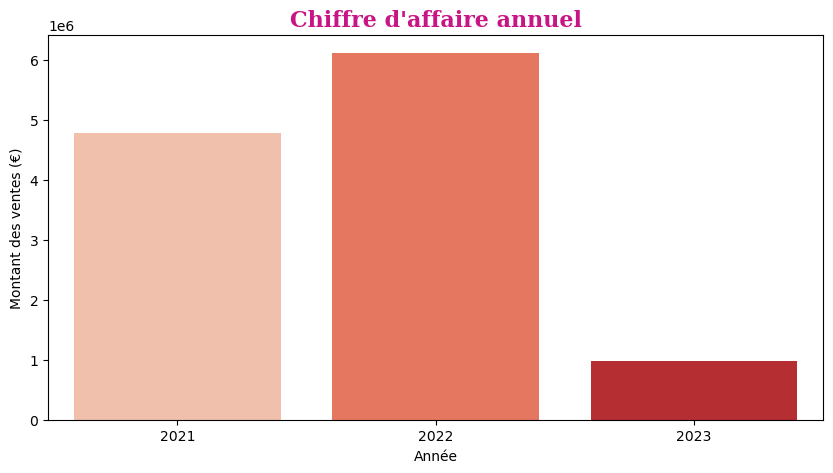

In [91]:
# Visualisation
font_title = {'family': 'serif', 'color': '#C71585', 'weight': 'bold', 'size': 16}
plt.figure(figsize=(10, 5))
sns.barplot(x = CA_annuel["année"], y = CA_annuel["price"], data = CA_annuel, palette='Reds')
plt.title("Chiffre d'affaire annuel", fontdict=font_title)
plt.ylabel("Montant des ventes (€)")
plt.xlabel("Année")
plt.show()

In [92]:
# Total des ventes annuel
TV_annuel = data_final.groupby(["année"])["session_id"].count().sort_values(ascending=False).reset_index()
TV_annuel

année  session_id
0   2022      346500
1   2021      278335
2   2023       54497

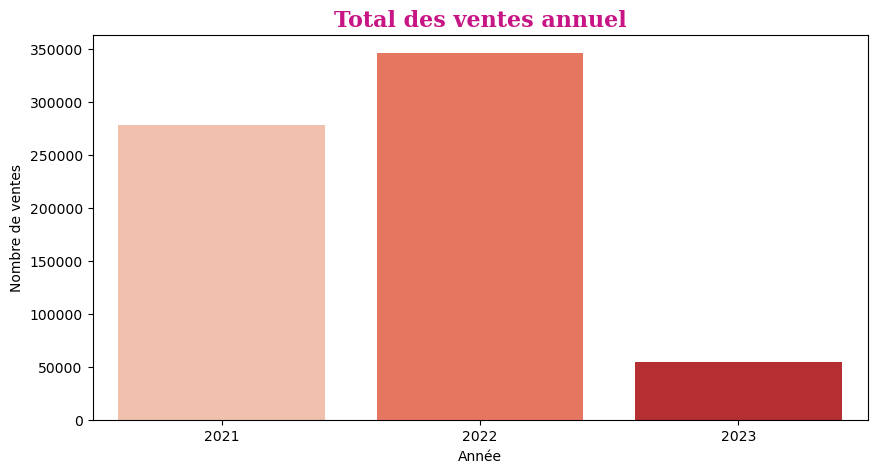

In [93]:
# Visualisation
plt.figure(figsize=(10, 5))
font_title = {'family': 'serif', 'color': '#C71585', 'weight': 'bold', 'size': 16}
sns.barplot(x = TV_annuel["année"], y = TV_annuel["session_id"], data = TV_annuel, palette='Reds')
plt.title("Total des ventes annuel", fontdict=font_title)
plt.ylabel("Nombre de ventes")
plt.xlabel("Année")
plt.show()

* Nous obtenons 2022 comme étant la meilleure année avec un total de chiffre d'affaires égale à 6108681.81 euros avec un total des ventes de 346380 livres.
* Par contre l'année 2023 n'est pas encore complete puisqu'on est au mois d'Avril et qu'il nous reste 8 autres mois pour les comparer réellement aux années précédentes;
* Pour cela nous allons calculer le chiffre d'affaires mensuelles afin de voir son évolution.

In [94]:
CA_temps = data_final['price'].groupby(data_final['day']).sum('price')
CA_temps =CA_temps.reset_index()
CA_temps.rename(columns = {'price' : 'CA'}, inplace = True)
CA_temps.head()

day        CA
0  2021-03-01  16575.21
1  2021-03-02  15496.44
2  2021-03-03  15198.69
3  2021-03-04  15196.07
4  2021-03-05  17471.37

In [95]:
# calculer le chiffre d'affaires année mois
CA_tempsGlissant = CA_temps.rolling(30, center = True, on = 'day').mean()
CA_tempsGlissant = CA_tempsGlissant.sort_values('day')

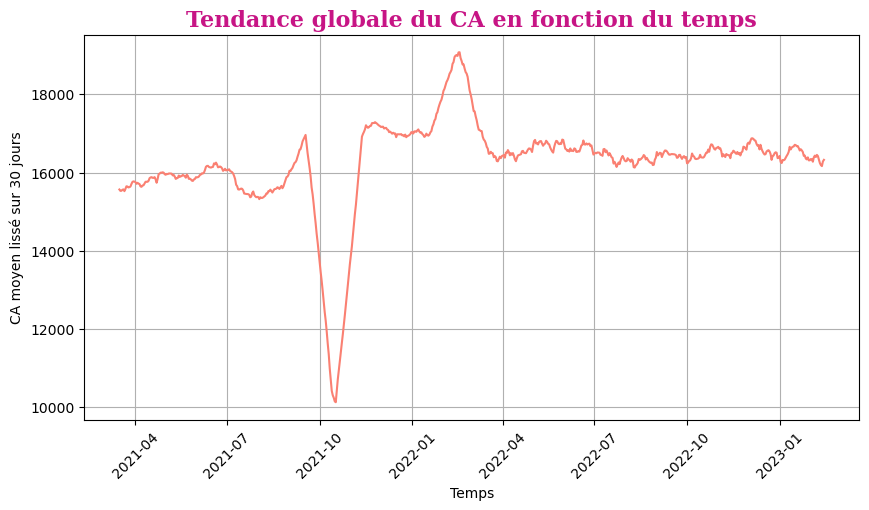

In [96]:
# Visualisation
plt.figure(figsize=(10,5))
font_title = {'family': 'serif', 'color': '#C71585', 'weight': 'bold', 'size': 16}
plt.plot(CA_tempsGlissant['day'], CA_tempsGlissant['CA'], color='salmon')
plt.title('Tendance globale du CA en fonction du temps', fontdict=font_title)
plt.xlabel('Temps')
plt.ylabel('CA moyen lissé sur 30 jours')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Evolution du chiffre d'affaire année par année

In [97]:
CA_temps['day'] = CA_temps['day'].astype(str)
CA_temps[['year','month','days']] = CA_temps.day.str.rsplit(pat = "-", expand=True)
CA_temps['date'] = CA_temps['month']+'-'+CA_temps['days']
CA_temps['day'] = CA_temps['day'].astype('datetime64[ns]')

In [98]:
CA_03_2021_02_2022 = CA_temps.loc[CA_temps['day']<'2022-03-01']
CA_03_2022_02_2023 = CA_temps.loc[CA_temps['day']>'2022-03-01']

In [99]:
CA_03_2021_02_2022['year'] = 2021
CA_03_2022_02_2023['year'] = 2022
CA_temps_year = pd.concat([CA_03_2021_02_2022,CA_03_2022_02_2023])

C:\Users\david\AppData\Local\Temp\ipykernel_26380\1383623873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_03_2021_02_2022['year'] = 2021
C:\Users\david\AppData\Local\Temp\ipykernel_26380\1383623873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_03_2022_02_2023['year'] = 2022


C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\david\AppData\Local\Temp\ipykernel_26380\609811857.py:8: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  plt.legend(handles=plot.legend_.legendHandles, labels=['2021-2022', '2022-2023'])


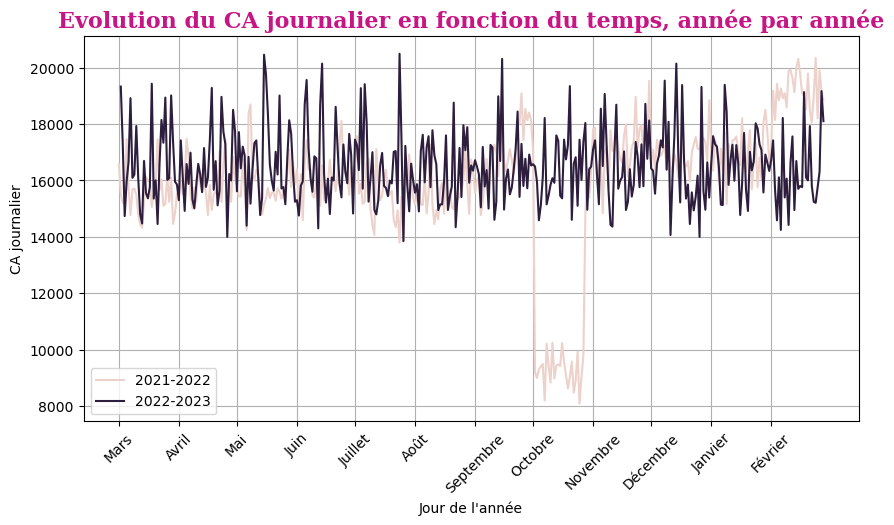

In [100]:
plt.figure(figsize = (10,5))
plot = sns.lineplot(data=CA_temps_year, x="date", y="CA", hue="year")
plt.title('Evolution du CA journalier en fonction du temps, année par année', fontdict=font_title)
plt.xlabel("Jour de l'année")
plt.ylabel('CA journalier')
plt.xticks(rotation=45,ticks = ["03-01","04-01","05-01","06-01","07-01","08-01","09-01","10-01","11-01","12-01","01-01","02-01"], labels = ["Mars","Avril","Mai","Juin","Juillet","Août","Septembre","Octobre", "Novembre","Décembre","Janvier","Février"])
plt.grid()
plt.legend(handles=plot.legend_.legendHandles, labels=['2021-2022', '2022-2023'])
plt.show()

In [101]:
CA_tempsGlissant['day'] = CA_tempsGlissant['day'].astype(str)
CA_tempsGlissant[['year','month','days']] = CA_tempsGlissant.day.str.rsplit(pat = "-", expand=True)
CA_tempsGlissant['date'] = CA_tempsGlissant['month']+'-'+CA_tempsGlissant['days']
CA_tempsGlissant['day'] = CA_tempsGlissant['day'].astype('datetime64[ns]')

In [102]:
CA_2021 = CA_tempsGlissant.loc[CA_tempsGlissant['day']<'2022-03-01']
CA_2022 = CA_tempsGlissant.loc[CA_tempsGlissant['day']>'2022-03-01']

In [103]:
CA_2021['year'] = 2021
CA_2022['year'] = 2022
CA_year = pd.concat([CA_2021,CA_2022])

C:\Users\david\AppData\Local\Temp\ipykernel_26380\2115295541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_2021['year'] = 2021
C:\Users\david\AppData\Local\Temp\ipykernel_26380\2115295541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CA_2022['year'] = 2022


C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\david\AppData\Local\Temp\ipykernel_26380\1342721496.py:8: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  plt.legend(handles=plot.legend_.legendHandles, labels=['2021-2022', '2022-2023'])


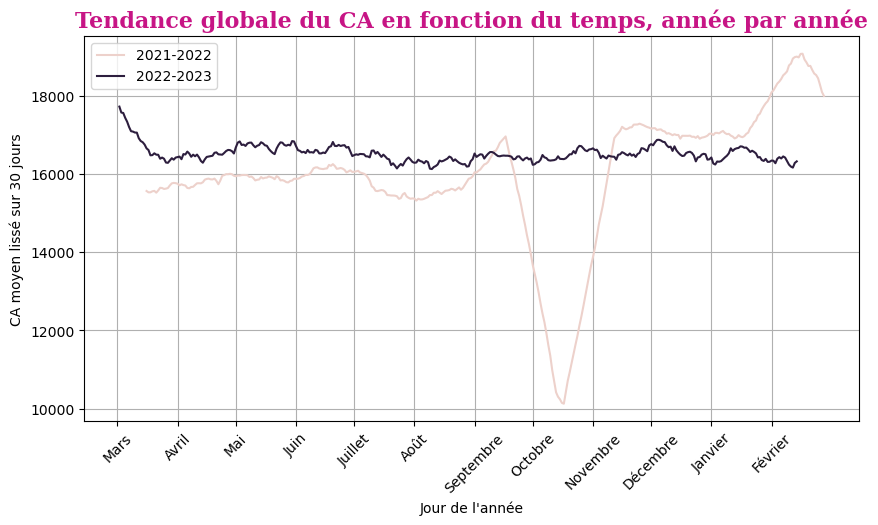

In [104]:
plt.figure(figsize = (10,5))
plot= sns.lineplot(data=CA_year, x="date", y="CA", hue="year")
plt.title('Tendance globale du CA en fonction du temps, année par année', fontdict=font_title)
plt.xlabel("Jour de l'année")
plt.ylabel('CA moyen lissé sur 30 jours')
plt.xticks(rotation=45, ticks = ["03-01","04-01","05-01","06-01","07-01","08-01","09-01","10-01","11-01","12-01","01-01","02-01"], labels = ["Mars","Avril","Mai","Juin","Juillet","Août","Septembre","Octobre", "Novembre","Décembre","Janvier","Février"])
plt.grid()
plt.legend(handles=plot.legend_.legendHandles, labels=['2021-2022', '2022-2023'])
plt.show()

### Explication du trou du CA sur octobre 2021

In [105]:
# création du dataframe du mois d'octobre pour l'année 2021
data_octobre = data_final.loc[(data_final["année"] == 2021) & (data_final["mois"] == 10), ["session_id", "price", "categ", "jour"]]
data_octobre.head(5)

session_id  price    categ  jour
6    s_109153   4.18  categ_0    23
27   s_104281   4.18  categ_0    13
31   s_106465   4.18  categ_0    18
75   s_100641   4.18  categ_0     6
98   s_103594   4.18  categ_0    12

In [106]:
# calculer le CA et le nombre de vente par catégories et jour du mois 
df_octobre = data_octobre.groupby(["jour", "categ"]).agg({"price": "sum",
                                                                 "session_id" : "count"}).sort_values(by = "session_id",ascending = False).reset_index()

# renommer les colonnes 
df_octobre.columns = ["jour", "categ", "CA", "Nombre_de_Ventes"]
df_octobre.head (5)

jour    categ       CA  Nombre_de_Ventes
0     6  categ_0  7546.58               702
1     8  categ_0  7069.53               669
2     1  categ_0  6950.50               663
3    16  categ_0  6898.14               661
4     2  categ_0  7141.01               661

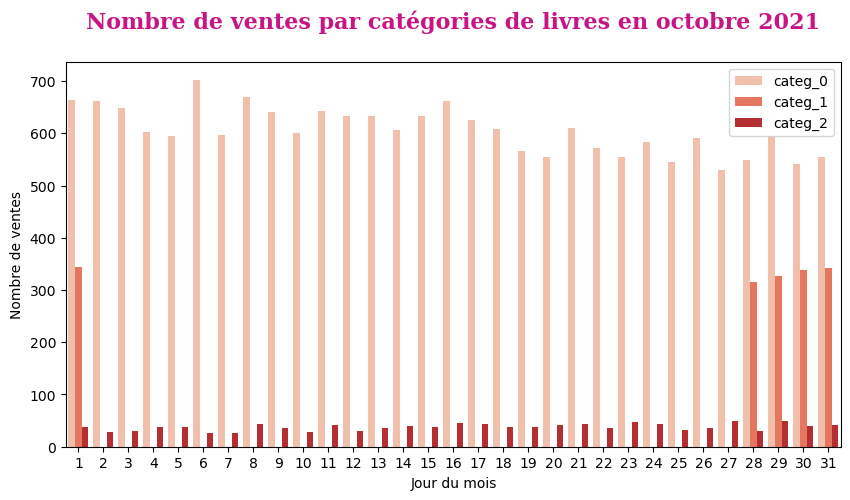

In [107]:
# Faire la visualisation
df_octobre["categ"] = df_octobre["categ"].astype(str)
plt.figure(figsize=(10, 5))
sns.barplot(x = df_octobre["jour"], y = df_octobre["Nombre_de_Ventes"], hue = "categ", data = df_octobre, palette = "Reds")
plt.title("Nombre de ventes par catégories de livres en octobre 2021\n", fontdict = font_title)
plt.ylabel("Nombre de ventes")
plt.xlabel("Jour du mois")
plt.legend()
plt.show()

#### <span style="color : blue">Comme on peut le remarquer, il n'y a aucune vente de produit dans la catégorie 1, entre le 2 octobre et le 27 octobre 2021 inclus. il peut s'agir d'une erreur, mais dans tous les cas, cela pose un problème d'altération des données réelles.</span>
#### <span style="color : blue">En attendant que la lumière soit faite à propos de ce problème de données, Octobre 2021 ne sera pas pris en compte dans les analyses.</span>

In [108]:
data_final = data_final.drop(index = data_final[(data_final['date'] >= '2021-10-01 00:00:0.0') & (data_final['date'] <= '2021-10-31 23:59:59.9')].index)

### Comptage du nombre total de paniers :

In [109]:
data_final["session_id"].nunique()

330769

### Comptage du nombre total de livres vendus :

In [110]:
data_final["id_prod"].count()

657726

In [111]:
# Evolution du nombre de ventes par mois
ventes_par_mois = data_final.groupby(['month'])['id_prod'].count()
ventes_par_mois.head()

month
2021-03    28610
2021-04    28457
2021-05    28293
2021-06    26857
2021-07    24742
Name: id_prod, dtype: int64

Text(0.5, 1.0, 'Graphique : Evolution du nombre de ventes par Mois-Année')

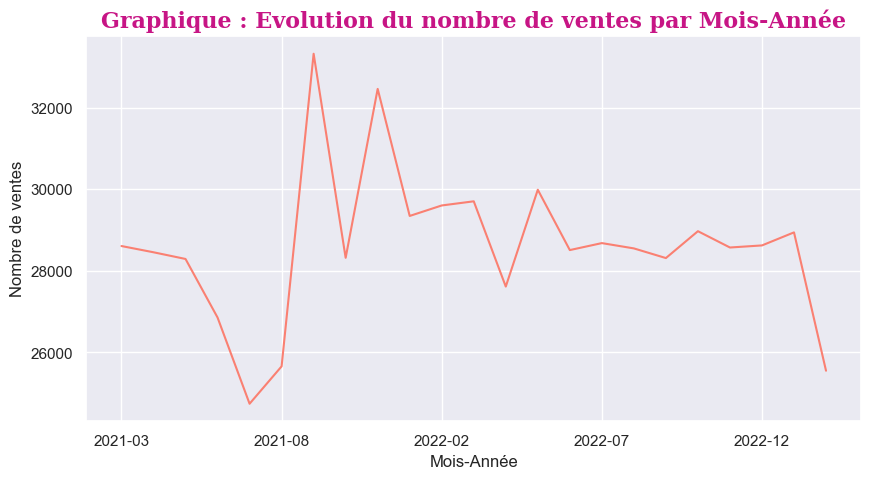

In [349]:
# Graphique: courbe d'évolution du nombre de ventes mensuelles

plt.figure(figsize = (10,5))
ventes_par_mois.plot(color='salmon')
plt.xlabel("Mois-Année")
plt.ylabel('Nombre de ventes')
plt.title('Graphique : Evolution du nombre de ventes par Mois-Année', fontdict = font_title)

In [113]:
# Aggrégation par jour pour obtenir le ca journalier
ca_jour = data_final.groupby('day')['price'].sum().reset_index().rename(columns={'price':'CA jour'})

In [114]:
# calcul des indicateurs
print("Indicateurs du chiffre d'affaires journalier")
print("-"*43)
print(ca_jour['CA jour'].describe(include='all'))
print("")
print("median:",round(ca_jour['CA jour'].median(),2))
print("variance:",round(ca_jour['CA jour'].var(ddof=0),2))

Indicateurs du chiffre d'affaires journalier
-------------------------------------------
count      699.000000
mean     16502.242918
std       1291.354155
min      13792.210000
25%      15569.170000
50%      16338.900000
75%      17253.060000
max      20497.670000
Name: CA jour, dtype: float64

median: 16338.9
variance: 1665209.86


In [115]:
# Moyenne mobile sur 3 mois
ca_jour['3m_rolling_avg'] = ca_jour['CA jour'].rolling(90).mean()
  
# viewing the dataset
ca_jour.head(10)

day   CA jour  3m_rolling_avg
0  2021-03-01  16575.21             NaN
1  2021-03-02  15496.44             NaN
2  2021-03-03  15198.69             NaN
3  2021-03-04  15196.07             NaN
4  2021-03-05  17471.37             NaN
5  2021-03-06  15785.28             NaN
6  2021-03-07  14770.19             NaN
7  2021-03-08  15679.53             NaN
8  2021-03-09  15710.51             NaN
9  2021-03-10  15496.87             NaN

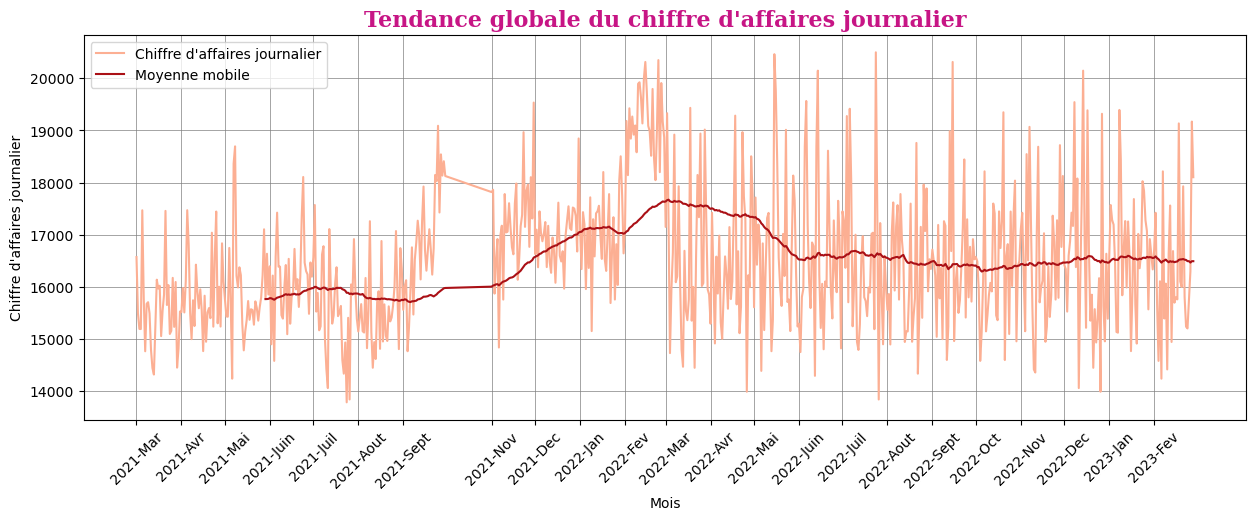

In [116]:
plt.figure(figsize = ( 15, 5))
  
# courbe données
plt.plot(ca_jour['day'], ca_jour['CA jour'],
        label = "Chiffre d'affaires journalier",
        color='#fcaf93')
  
# Moyenne mobile
plt.plot(ca_jour['day'], ca_jour['3m_rolling_avg'],
        label = 'Moyenne mobile',
        color='#aa1016')

# setting customized ticklabels for x axis
pos = [ '2021-03-01', '2021-04-01', '2021-05-01', '2021-06-01', 
       '2021-07-01', '2021-08-01', '2021-09-01', 
       '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
       '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01', 
       '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
       '2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01']
  
lab = [ '2021-Mar', '2021-Avr', '2021-Mai', '2021-Juin', '2021-Juil', '2021-Aout', 
       '2021-Sept', '2021-Nov', '2021-Dec', '2022-Jan', '2022-Fev',
       '2022-Mar', '2022-Avr', '2022-Mai', '2022-Juin', '2022-Juil', '2022-Aout',
       '2022-Sept', '2022-Oct', '2022-Nov', '2022-Dec', '2023-Jan', '2023-Fev',]
  
plt.xticks( pos, lab, rotation=45)
plt.xlabel('Mois')
plt.ylabel("Chiffre d'affaires journalier")
plt.title("Tendance globale du chiffre d'affaires journalier", fontdict = font_title)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.legend()
plt.savefig('CA_jour_moy.png')
plt.show()

In [117]:
# Evolution des ventes par jour

ventes_par_jour = data_final.groupby(['day'])['id_prod'].count()
ventes_par_jour.head()

day
2021-03-01    963
2021-03-02    940
2021-03-03    911
2021-03-04    903
2021-03-05    943
Name: id_prod, dtype: int64

Text(0.5, 1.0, "Graphique : Courbe d'évolution du nombre de ventes par jour")

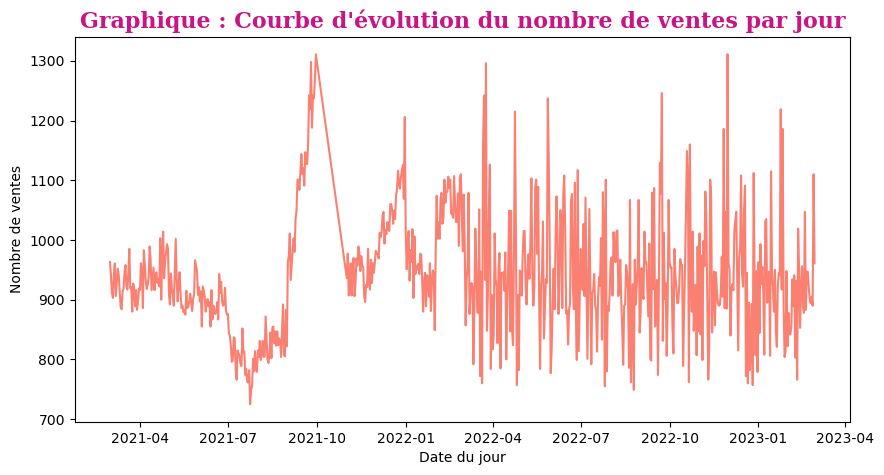

In [118]:
# Graphique: courbe d'évolution du nombre de ventes journalières 

plt.figure(figsize = (10,5))
ventes_par_jour.plot(color='salmon')
plt.xlabel("Date du jour")
plt.ylabel('Nombre de ventes')
plt.title("Graphique : Courbe d'évolution du nombre de ventes par jour", fontdict = font_title)

In [119]:
# Tri des ventes par jour 

ventes_par_jour.sort_values(ascending = False)

day
2021-09-30    1311
2022-11-30    1311
2021-09-25    1298
2022-03-25    1296
2021-09-29    1268
              ... 
2022-07-26     755
2021-07-26     755
2021-07-25     749
2022-08-25     749
2021-07-24     725
Name: id_prod, Length: 699, dtype: int64

In [120]:
# calculer les ventes par jour de la semaine
df_jour = data_final.groupby(data_final["date"].dt.dayofweek)["session_id"].count().sort_values(ascending=False).reset_index()
df_jour

date  session_id
0     1       95808
1     0       95213
2     2       94829
3     3       93835
4     6       93711
5     5       92262
6     4       92068

C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


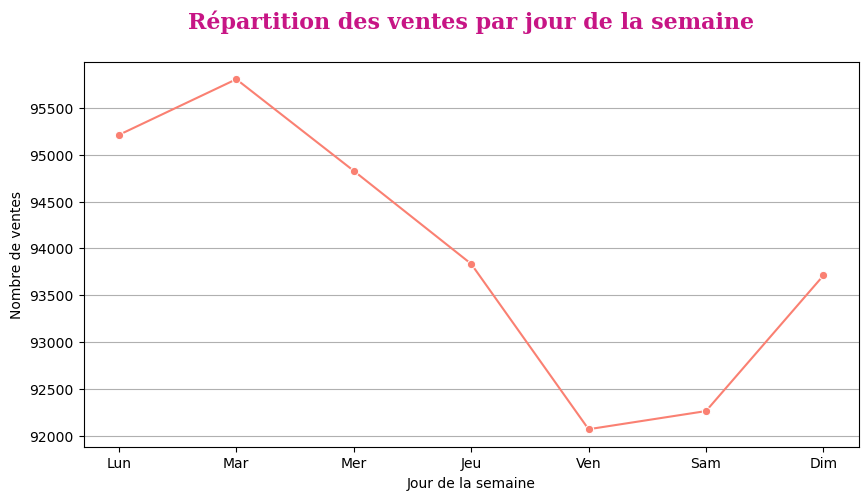

In [121]:
# Regrouper les données par jour de la semaine
df_jour = data_final.groupby(data_final["date"].dt.dayofweek)["session_id"].count().sort_values(ascending=False).reset_index()

# Configuration de la figure
plt.figure(figsize=(10, 5))

# Traçage du graphique linéaire
sns.lineplot(x = df_jour["date"], y = df_jour["session_id"], data = df_jour, marker='o', color='salmon')

# Ajout de la grille
plt.grid(axis='y')

# Titre et étiquettes des axes
plt.title("Répartition des ventes par jour de la semaine\n", fontdict = font_title)
plt.ylabel("Nombre de ventes")
plt.xlabel("Jour de la semaine")

# Paramètres des libellés des jours de la semaine sur l'axe des abscisses
plt.xticks(np.arange(0, 7), ['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim'], rotation='horizontal')

# Affichage du graphique
plt.show()

C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


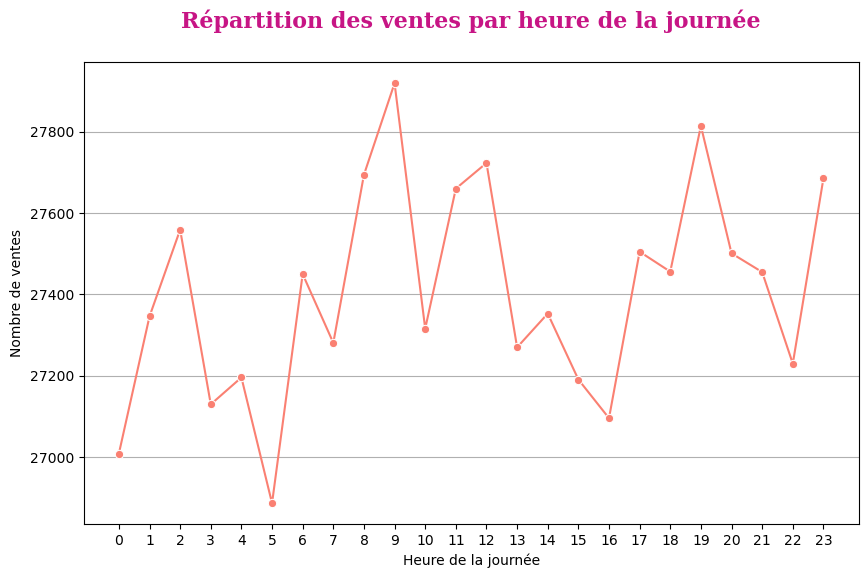

In [122]:
# Regrouper les données par heure de la journée
df_heure = data_final.groupby(data_final["date"].dt.hour)["session_id"].count().reset_index()

# Configuration de la figure
plt.figure(figsize=(10, 6))

# Traçage du graphique linéaire avec marqueurs
sns.lineplot(x = df_heure["date"], y = df_heure["session_id"], data = df_heure, marker='o', color='salmon')

# Ajout de la grille
plt.grid(axis='y')

# Titre et étiquettes des axes
plt.title("Répartition des ventes par heure de la journée\n", fontdict = font_title)
plt.ylabel("Nombre de ventes")
plt.xlabel("Heure de la journée")

# Paramètres des libellés des heures sur l'axe des abscisses
plt.xticks(np.arange(0, 24, 1))

# Affichage du graphique
plt.show()

* Nous constatons que les jours où il y a le plus de ventes sont les lundis, mardis et dimanches des pics de ventes à 9h, 19h et 23h.
* Pour lancer les campagnes de publicitaires et obtenir le plus de ventes.

# <span style="color : #8470FF"><u>2.Chiffre d'affaires : décomposition en moyenne mobile (tendance globale)</u></span>

* Nous allons mettre en place une décomposition en moyenne mobile pour évaluer la tendance globale.

+ Chiffre d'affaire en fonction du jour

In [123]:
ca_jour = data_final.groupby(['day'])['price'].sum()
ca_jour.head()

day
2021-03-01    16575.21
2021-03-02    15496.44
2021-03-03    15198.69
2021-03-04    15196.07
2021-03-05    17471.37
Name: price, dtype: float64

Text(0.5, 1.0, "Evolution du chiffre d'affaire par jour")

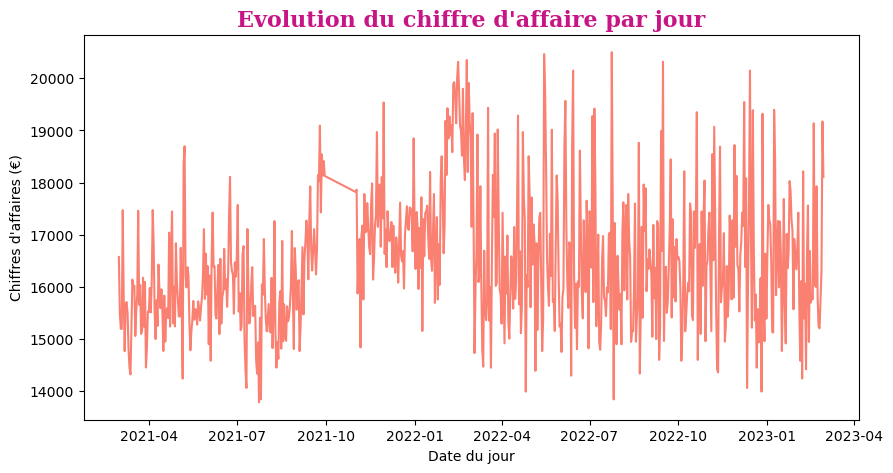

In [124]:
# Graphique: courbe d'évolution du CA journalier /2

plt.figure(figsize = (10,5))
ca_jour.plot(color='salmon')
plt.xlabel("Date du jour")
plt.ylabel("Chiffres d'affaires (€)")
plt.title("Evolution du chiffre d'affaire par jour", fontdict = font_title)

In [125]:
# Tri décroissant : dates et valeurs des CA les plus élevés

ca_jour.sort_values(ascending = False).head()

day
2022-07-24    20497.67
2022-05-15    20461.86
2022-02-24    20348.69
2022-02-15    20312.88
2022-09-15    20312.88
Name: price, dtype: float64

In [126]:
# Tri croissant : dates et valeurs des CA les plus faibles

ca_jour.sort_values().head()

day
2021-07-24    13792.21
2021-07-26    13846.53
2022-07-26    13846.53
2022-04-26    13995.51
2022-12-26    13995.51
Name: price, dtype: float64

### Moyenne mobile du CA sur 7 jours

In [127]:
# Calcul de la moyenne mobile sur 1 semaine (7 jours)

moy_mobile_jour = ca_jour.rolling(7).mean()
moy_mobile_jour

day
2021-03-01             NaN
2021-03-02             NaN
2021-03-03             NaN
2021-03-04             NaN
2021-03-05             NaN
                  ...     
2023-02-24    16490.205714
2023-02-25    16008.174286
2023-02-26    16036.448571
2023-02-27    16488.997143
2023-02-28    16513.984286
Name: price, Length: 699, dtype: float64

Text(0.5, 1.0, "Moyenne mobile du chiffre d'affaire sur 7 jours")

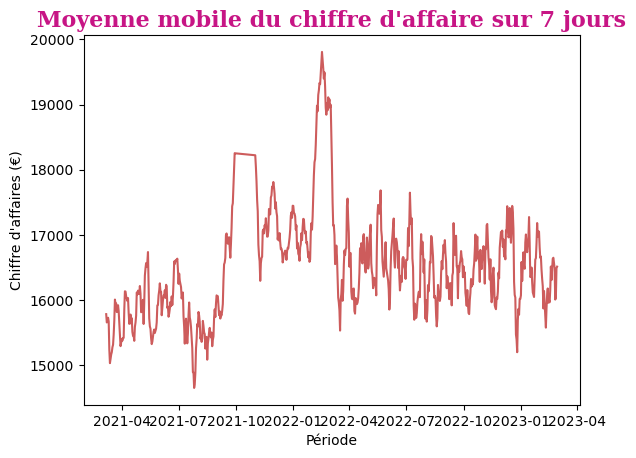

In [128]:
# Graphique de la moyenne mobile sur 7 jours 

plt.plot(moy_mobile_jour, color = 'indianred', label = 'Moyenne mobile')
plt.xlabel("Période")
plt.ylabel("Chiffre d'affaires (€)")
plt.title("Moyenne mobile du chiffre d'affaire sur 7 jours", fontdict = font_title)

In [129]:
# Calcul de la moyenne mobile sur 2 semaine (15 jours)

moy_mobile_jours = ca_jour.rolling(15).mean()
moy_mobile_jours

day
2021-03-01             NaN
2021-03-02             NaN
2021-03-03             NaN
2021-03-04             NaN
2021-03-05             NaN
                  ...     
2023-02-24    16197.498667
2023-02-25    16286.740667
2023-02-26    16264.638000
2023-02-27    16371.835333
2023-02-28    16582.269333
Name: price, Length: 699, dtype: float64

Text(0.5, 1.0, "Moyenne mobile du chiffre d'affaire sur 15 jours")

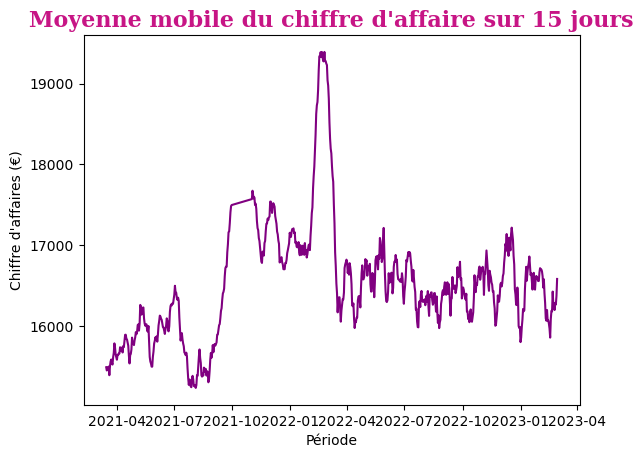

In [130]:
# Graphique de la moyenne mobile sur 15 jours

plt.plot(moy_mobile_jours, color = 'purple', label = 'Moyenne mobile')
plt.xlabel("Période")
plt.ylabel("Chiffre d'affaires (€)")
plt.title("Moyenne mobile du chiffre d'affaire sur 15 jours", fontdict = font_title)

In [131]:
# Calcul de la moyenne mobile sur 90 jours

moy_mobile_3mois = ca_jour.rolling(30).mean()
moy_mobile_3mois.head()

day
2021-03-01   NaN
2021-03-02   NaN
2021-03-03   NaN
2021-03-04   NaN
2021-03-05   NaN
Name: price, dtype: float64

Text(0.5, 1.0, "Moyenne mobile du chiffre d'affaire sur 90 jours")

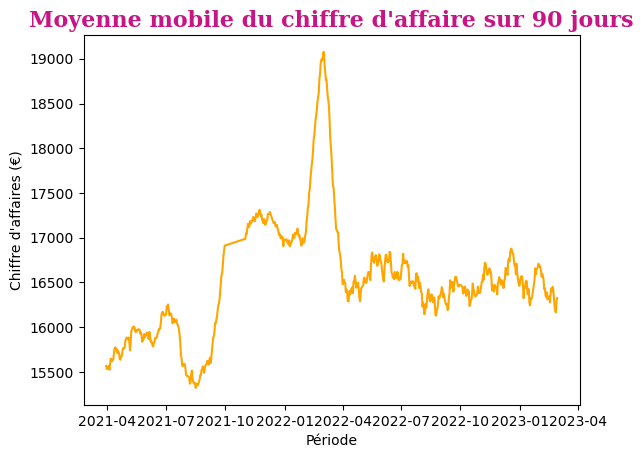

In [132]:
# Graphique de la moyenne mobile sur 90 jours

plt.plot(moy_mobile_3mois, color = 'orange', label = 'Moyenne mobile')
plt.xlabel("Période")
plt.ylabel("Chiffre d'affaires (€)")
plt.title("Moyenne mobile du chiffre d'affaire sur 90 jours", fontdict = font_title)

Text(0.5, 1.0, "Evolution du chiffre d'affaire par jour et de la moyenne mobile sur 7 jours")

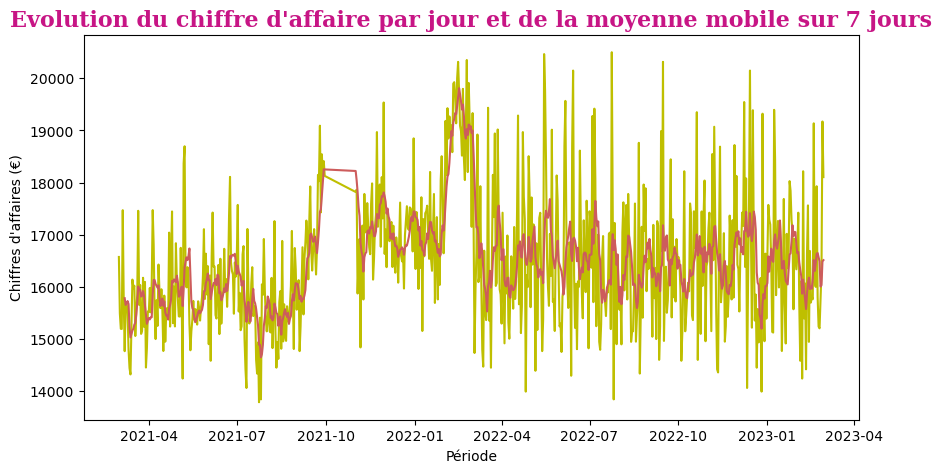

In [133]:
# Supperposition des graphiques du ca par jour et de la moyenne mobile sur 7 jours 

plt.figure(figsize = (10,5))
ca_jour.plot(color='y')
plt.plot(moy_mobile_jour, color = 'indianred', label = 'Moyenne mobile')
plt.xlabel("Période")
plt.ylabel("Chiffres d'affaires (€)")
plt.title("Evolution du chiffre d'affaire par jour et de la moyenne mobile sur 7 jours", fontdict = font_title)

Text(0.5, 1.0, "Evolution du chiffre d'affaire par jour et de la moyenne mobile sur 15 jours")

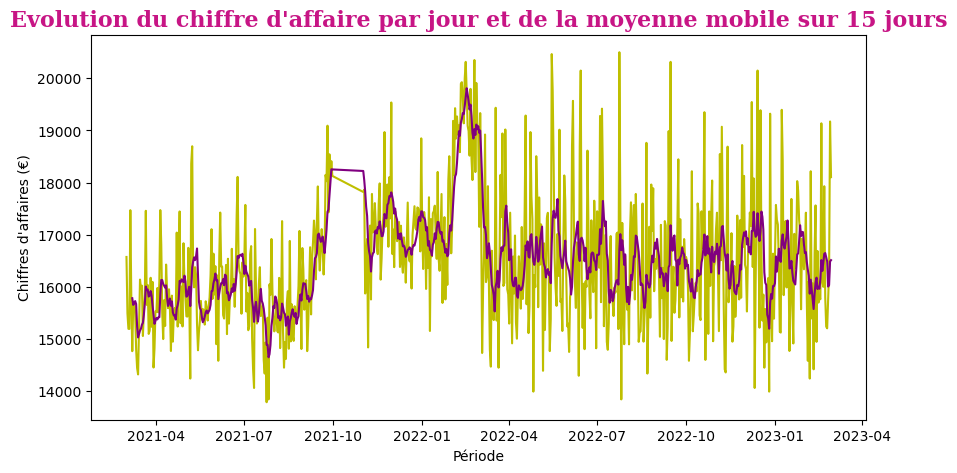

In [134]:
# Supperposition des graphiques du ca par jour et de la moyenne mobile sur 15 jours

plt.figure(figsize = (10,5))
ca_jour.plot(color='y')
plt.plot(moy_mobile_jour, color = 'purple', label = 'Moyenne mobile')
plt.xlabel("Période")
plt.ylabel("Chiffres d'affaires (€)")
plt.title("Evolution du chiffre d'affaire par jour et de la moyenne mobile sur 15 jours", fontdict = font_title)

Text(0.5, 1.0, "Evolution du chiffre d'affaire par jour et de la moyenne mobile sur 90 jours")

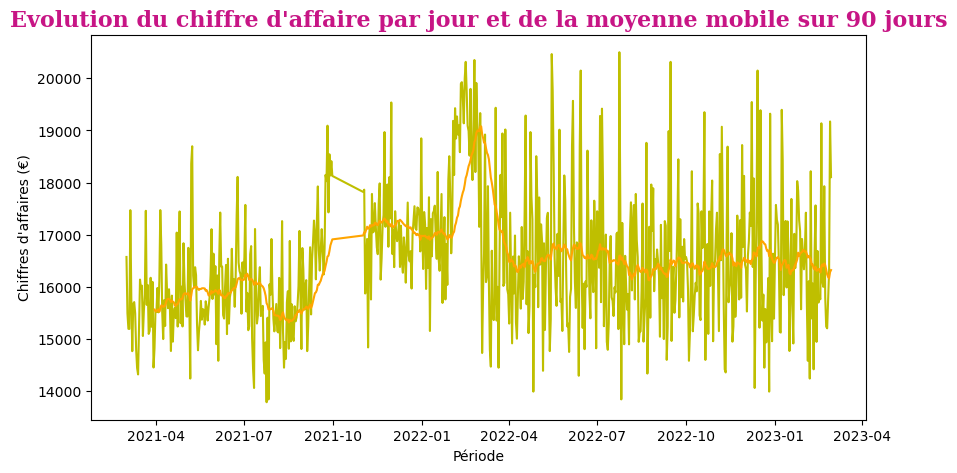

In [135]:
# Supperposition des graphiques du ca par jour et de la moyenne mobile sur 90 jours

plt.figure(figsize = (10,5))
ca_jour.plot(color='y')
plt.plot(moy_mobile_3mois, color = 'orange', label = 'Moyenne mobile')
plt.xlabel("Période")
plt.ylabel("Chiffres d'affaires (€)")
plt.title("Evolution du chiffre d'affaire par jour et de la moyenne mobile sur 90 jours", fontdict = font_title)

# <span style="color : #8470FF"><u>3.Zoom sur les références : Tops et Flops</u></span>

## Top des ventes

On va maintenant voir le top 10 des références les plus vendus est le top 10 des références les plus vendus par catégories.

In [136]:
df_vente_par_produit = data_final.groupby(['id_prod','categ']).agg(
                            nombre_vente = ('id_prod', 'count'),
                            chiffre_affaires_produit = ('price', 'sum')).reset_index()

df_top_10_vente = df_vente_par_produit.sort_values('nombre_vente', ascending = False).head(10)
df_top_10_vente

id_prod    categ  nombre_vente  chiffre_affaires_produit
2590   1_369  categ_1          2237                  53665.63
2643   1_417  categ_1          2173                  45611.27
2640   1_414  categ_1          2166                  51615.78
2732   1_498  categ_1          2117                  49474.29
2652   1_425  categ_1          2084                  35407.16
2628   1_403  categ_1          1950                  35080.50
2638   1_412  categ_1          1938                  32267.70
2639   1_413  categ_1          1931                  34738.69
2631   1_406  categ_1          1931                  47908.11
2632   1_407  categ_1          1923                  30748.77

In [137]:
fig_top_10_vente = px.bar(df_top_10_vente, x='nombre_vente', y='id_prod', 
             labels={
                     "nombre_vente": "Nombre de vente",
                     "id_prod": "", 
                 },
             title="Les 10 meilleures ventes", 
             text_auto=True,
            width=500, height=500, color_discrete_sequence=['salmon'])

fig_top_10_vente.update_traces(textfont_size=16, textangle=0, textposition="inside", cliponaxis=False)
fig_top_10_vente.update_layout(plot_bgcolor = "white",
                  yaxis={'categoryorder':'total ascending'})
fig_top_10_vente.update_xaxes(showticklabels=False)
    

fig_top_10_vente.show()

In [138]:
# pour la catégorie 0
df_top_10_vente_categorie_0 = df_vente_par_produit[df_vente_par_produit['categ'] == 'categ_0' ].sort_values('nombre_vente', ascending = False).head(10)
df_top_10_vente_categorie_0

id_prod    categ  nombre_vente  chiffre_affaires_produit
475  0_1431  categ_0          1234                  13561.66
465  0_1422  categ_0          1233                  14068.53
468  0_1425  categ_0          1215                  15782.85
0       0_0  categ_0          1194                   4477.50
467  0_1424  categ_0          1193                  10033.13
453  0_1411  categ_0          1191                  10707.09
476  0_1432  categ_0          1191                  18293.76
486  0_1441  categ_0          1179                  22389.21
471  0_1428  categ_0          1178                   4181.90
478  0_1434  categ_0          1177                  10098.66

In [139]:
# pour la catégorie 1
df_top_10_vente_categorie_1 = df_vente_par_produit[df_vente_par_produit['categ'] == 'categ_1' ].sort_values('nombre_vente', ascending = False).head(10)
df_top_10_vente_categorie_1

id_prod    categ  nombre_vente  chiffre_affaires_produit
2590   1_369  categ_1          2237                  53665.63
2643   1_417  categ_1          2173                  45611.27
2640   1_414  categ_1          2166                  51615.78
2732   1_498  categ_1          2117                  49474.29
2652   1_425  categ_1          2084                  35407.16
2628   1_403  categ_1          1950                  35080.50
2638   1_412  categ_1          1938                  32267.70
2639   1_413  categ_1          1931                  34738.69
2631   1_406  categ_1          1931                  47908.11
2632   1_407  categ_1          1923                  30748.77

In [140]:
# pour la catégorie 2
df_top_10_vente_categorie_2 = df_vente_par_produit[df_vente_par_produit['categ'] == 'categ_2' ].sort_values('nombre_vente', ascending = False).head(10)
df_top_10_vente_categorie_2

id_prod    categ  nombre_vente  chiffre_affaires_produit
3033   2_102  categ_2           997                  58962.58
3069   2_135  categ_2           977                  67403.23
3044   2_112  categ_2           930                  62840.10
3200    2_39  categ_2           882                  51147.18
3198    2_37  categ_2           867                  42474.33
3042   2_110  categ_2           834                  51916.50
3150   2_208  categ_2           805                  44170.35
3151   2_209  categ_2           791                  55362.09
3149   2_207  categ_2           761                  38803.39
3040   2_109  categ_2           718                  38764.82

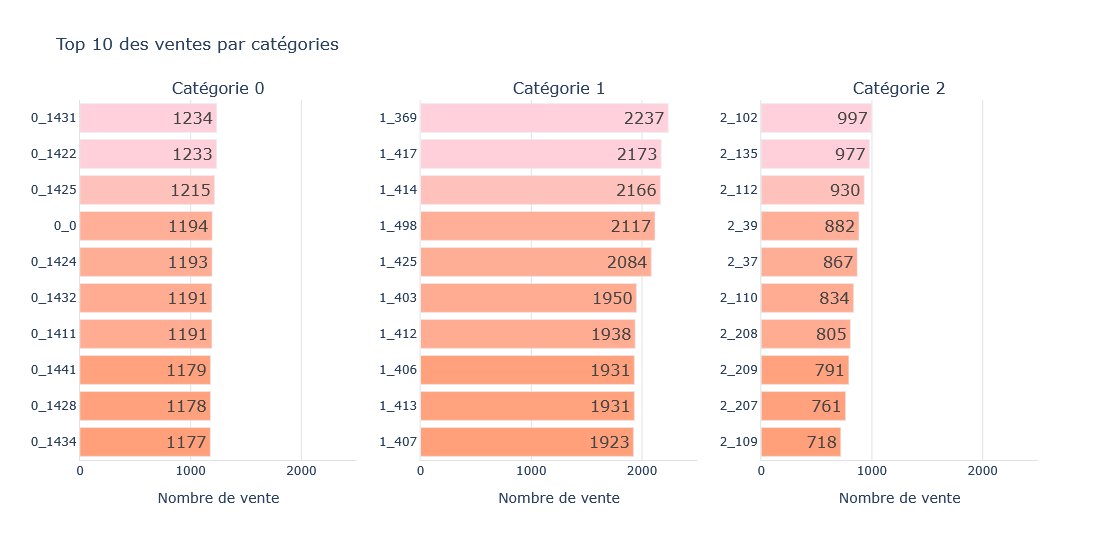

In [141]:
# Création du subplots
fig_top_10_vente_categorie = make_subplots(rows = 1, cols = 3, subplot_titles = ("Catégorie 0", "Catégorie 1", "Catégorie 2"))

# Ajout des graphiques
fig_top_10_vente_categorie.add_trace(
                go.Bar(x = df_top_10_vente_categorie_0['nombre_vente'], y = df_top_10_vente_categorie_0['id_prod'], orientation = 'h', showlegend = False,
                        text = df_top_10_vente_categorie_0['nombre_vente'], textposition = 'auto',marker=dict(
            color=df_top_10_vente_categorie_0['nombre_vente'],  # Valeurs pour le dégradé
            colorscale=[[0, '#FFA07A'], [1, '#FFD1DC']]  # Dégradé rose saumon
        )),
                row = 1, col = 1)

fig_top_10_vente_categorie.add_trace(
                go.Bar(x = df_top_10_vente_categorie_1['nombre_vente'], y = df_top_10_vente_categorie_1['id_prod'], orientation = 'h', showlegend = False,
                        text = df_top_10_vente_categorie_1['nombre_vente'], textposition = 'auto',
        marker=dict(
            color=df_top_10_vente_categorie_0['nombre_vente'],  # Valeurs pour le dégradé
            colorscale=[[0, '#FFA07A'], [1, '#FFD1DC']]  # Dégradé rose saumon
        )),

                row = 1, col = 2)

fig_top_10_vente_categorie.add_trace(
                go.Bar(x = df_top_10_vente_categorie_2['nombre_vente'], y = df_top_10_vente_categorie_2['id_prod'], orientation = 'h', showlegend = False,
                        text = df_top_10_vente_categorie_2['nombre_vente'], textposition = 'auto',marker=dict(
            color=df_top_10_vente_categorie_0['nombre_vente'],  # Valeurs pour le dégradé
            colorscale=[[0, '#FFA07A'], [1, '#FFD1DC']]  # Dégradé rose saumon
        )),

                row = 1, col = 3)


# Configuration des axes
fig_top_10_vente_categorie.update_xaxes(range = [0, 2500], title_text = 'Nombre de vente',gridcolor = '#E0E2E5', showline=True, linewidth=1,linecolor='#E0E2E5')
fig_top_10_vente_categorie.update_yaxes(categoryorder = "total ascending",showline=True, linewidth=1,linecolor='#E0E2E5')



fig_top_10_vente_categorie.update_traces(textfont_size=16, textangle=0, textposition="inside", cliponaxis=False)



# Configuration du layout
fig_top_10_vente_categorie.update_layout(plot_bgcolor = "white",height=540, title_text = 'Top 10 des ventes par catégories')


fig_top_10_vente_categorie.show()


## Flop des ventes

On va désormais voir les références les moins vendus. On va prendre celles qui ont cinq ventes ou moins.

In [142]:
df_flop_vente = df_vente_par_produit[df_vente_par_produit['nombre_vente']<=5]
df_flop_vente

id_prod    categ  nombre_vente  chiffre_affaires_produit
3      0_100  categ_0             3                     61.80
9     0_1005  categ_0             5                    104.95
17    0_1012  categ_0             3                     97.20
36    0_1032  categ_0             5                    108.00
41    0_1037  categ_0             3                     62.97
...      ...      ...           ...                       ...
3251    2_88  categ_2             5                    388.15
3252    2_89  categ_2             4                    431.96
3257    2_93  categ_2             2                    157.98
3259    2_95  categ_2             4                    395.96
3262    2_98  categ_2             1                    149.74

[232 rows x 4 columns]

* On s'aperçoit qu'il y a quand même 232 références qui n'ont pas été vendues ou très peu. 
* Je vais les trier par catégories afin de déterminer les flops par catégorie

In [143]:
df_nb_flop_categ = df_flop_vente.groupby('categ').agg(nb_flop = ('id_prod', 'count')).reset_index()
df_nb_flop_categ

categ  nb_flop
0  categ_0      196
1  categ_1       16
2  categ_2       20

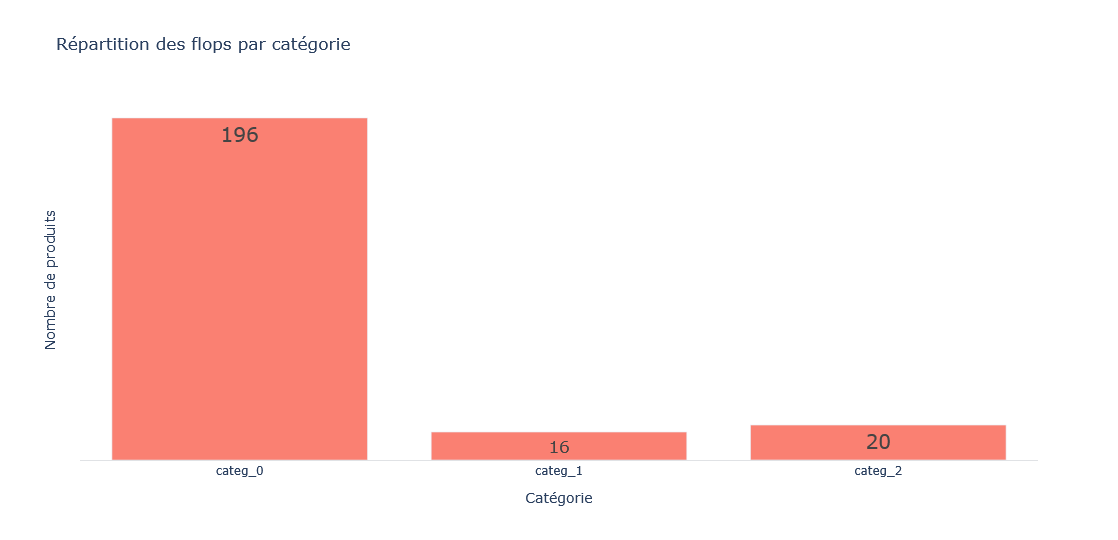

In [144]:
fig_flop_vente = px.bar(df_nb_flop_categ, x = 'categ', y = 'nb_flop', title = "Répartition des flops par catégorie",  
                        labels = {'categ':"Catégorie"},
                         color_discrete_sequence=['salmon'],
                        text_auto = True)

fig_flop_vente.update_layout(plot_bgcolor = "white", height =540)
fig_flop_vente.update_traces(textfont_size = 20, textangle = 0, textposition = "inside", cliponaxis = False)
fig_flop_vente.update_yaxes(showticklabels = False, title_text = 'Nombre de produits')
fig_flop_vente.update_xaxes(nticks = 3, showline=True, linewidth=1,linecolor='#E0E2E5')

fig_flop_vente.show()

* La majorité des flops sont dans la catégorie 0. 

# <span style="color : #8470FF"><u>4.Zoom sur les références : Répartition par catégorie</u></span>

In [145]:
# Le nombre de livres par catégories
categ_livre = data_final.groupby(["categ"])["id_prod"].count().sort_values(ascending = False).reset_index()
categ_livre

categ  id_prod
0  categ_0   396911
1  categ_1   225503
2  categ_2    35312

In [146]:
# Répartition des produits par catégorie
plt.figure(1,figsize=(10,5))
colors = sns.color_palette("Reds")
plt.pie(x=categ_livre['id_prod'],labels=categ_livre['categ'],colors = colors,autopct='%.1f%%',textprops={'fontsize': 11},
        explode=(0,0,0.1),shadow=True)
plt.title("Répartition des produits par catégorie",fontsize=11)
plt.legend (loc='lower left')
plt.show()

In [147]:
# Répartition du chiffre d'affaires par catégorie
data = data_final.groupby('categ')['price'].sum().reset_index()
colors = sns.color_palette("Reds")
plt.figure(figsize=(10,5))

plt.pie(x=data['price'], 
        labels=data['categ'],
        colors = colors, 
        autopct='%.1f%%',
        textprops={'fontsize': 11},
        explode=(0,0,0.1), 
        shadow=True)

plt.title("Répartition du chiffre d'affaires par catégorie",fontsize=11)
plt.legend(title='Catégorie et prix moyen', 
           labels={"categ 0 : 10,6€","categ 1 : 20,5€","categ 2 : 76,2€"}, 
           fontsize=11,
           loc="upper left")
plt.savefig('pie_CA_categ.png')
plt.show()

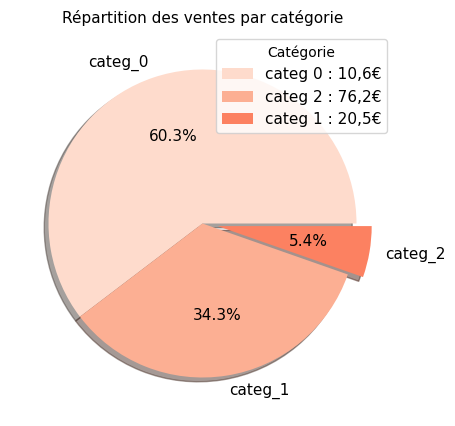

In [148]:
# Diagramme en secteurs pour représenter la répartition des ventes par catégorie
data = data_final.groupby('categ')['session_id'].count().reset_index()
plt.figure(figsize=(10,5))
colors = sns.color_palette("Reds")
plt.pie(x=data['session_id'], 
        labels=data['categ'],
        colors = colors, 
        autopct='%.1f%%',
        textprops={'fontsize': 11},
        explode=(0,0,0.1), 
        shadow=True)

plt.title("Répartition des ventes par catégorie",fontsize=11)
plt.legend(title='Catégorie',
           labels={"categ 0 : 10,6€","categ 1 : 20,5€","categ 2 : 76,2€"},
           fontsize=11,
           loc="upper right")
plt.savefig('pie_ventes_categ.png')
plt.show()

In [149]:
# Création d'une table par comptage du nombre de ventes par catégories et par mois

ca_categ_tps = data_final.groupby(["month","categ"])["price"].sum().reset_index()
ca_categ_tps.head()

month    categ      price
0  2021-03  categ_0  193719.08
1  2021-03  categ_1  186974.17
2  2021-03  categ_2  101837.27
3  2021-04  categ_0  205362.32
4  2021-04  categ_1  156138.35

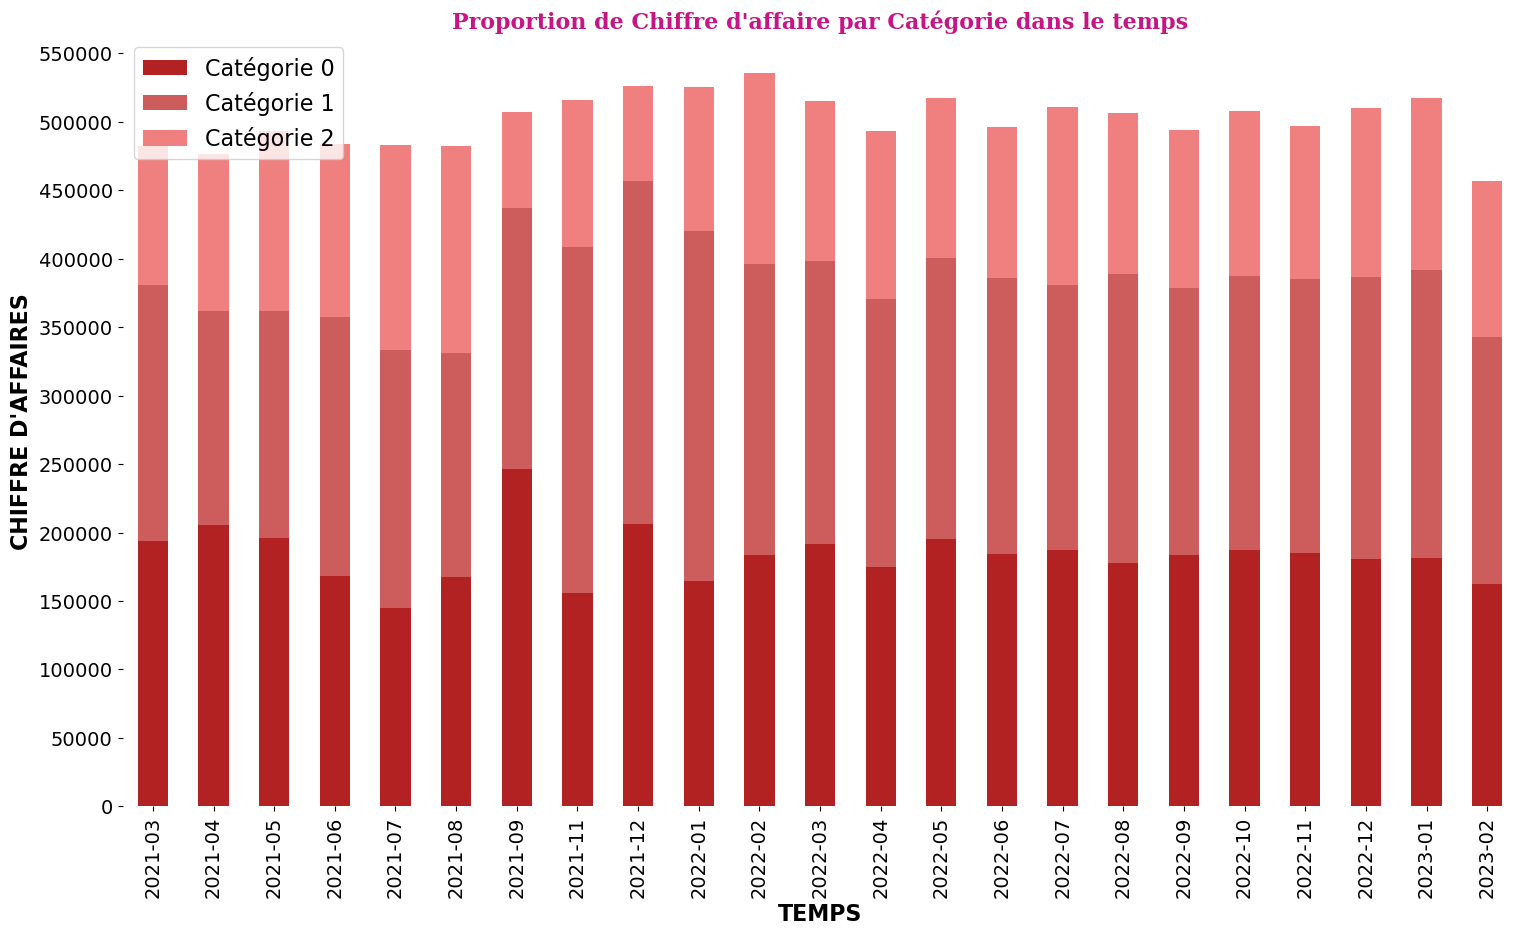

In [150]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_title("Proportion de Chiffre d'affaire par Catégorie dans le temps", fontdict = font_title)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.xaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ca_categ_tps.groupby(['month','categ']).sum().unstack().plot(kind='bar', 
                        y = 'price',  ax=ax, stacked=True, figsize = (18,10), 
                        color=['firebrick', "indianred", "lightcoral"])
plt.legend(('Catégorie 0','Catégorie 1', 'Catégorie 2'), fontsize=16, loc="upper left")
plt.ylabel("CHIFFRE D'AFFAIRES",weight='bold',size=16)
plt.xlabel("TEMPS",weight='bold',size=16)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(np.arange(0, 600000, 50000), fontsize=14)
plt.show()

In [151]:
# Le prix moyen par catégories de livres
prix_moy_categ = data_final.groupby(["categ"])["price"].mean().sort_values(ascending = False).reset_index()
prix_moy_categ

categ      price
0  categ_2  76.248568
1  categ_1  20.487357
2  categ_0  10.638702

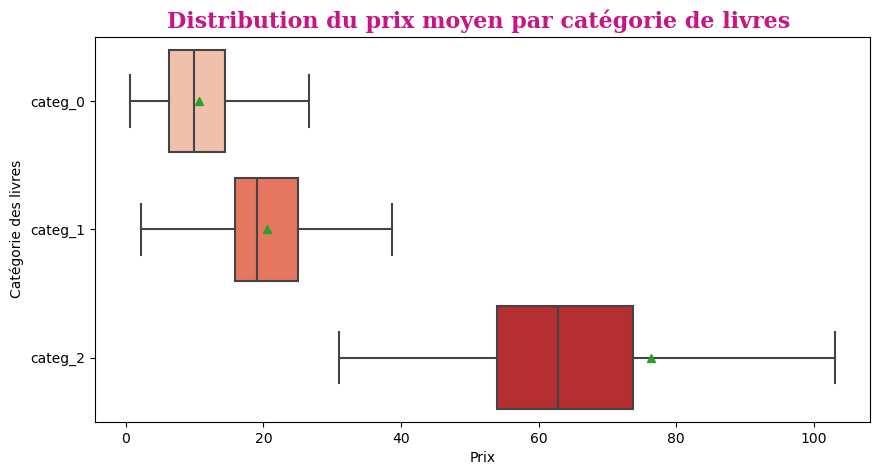

In [152]:
# visualisation du prix moyen par catégorie de livres 
plt.figure(figsize = (10,5))
sns.boxplot(y = data_final["categ"], x = data_final["price"], data = data_final, orient ='h', showfliers=False, showmeans=True, palette="Reds")
plt.xlabel("Prix")
plt.ylabel("Catégorie des livres")
plt.title("Distribution du prix moyen par catégorie de livres ", fontdict = font_title)
plt.show()

* Les catégories 1 coûtent en moyenne 20euros ce qui marquent la différence par rapport aux catégories 2 qui coûtent en moyenne 76euros.
* Ce qui fait que les meilleurs ventes de livres se font sur la catégorie 1.

In [153]:
# Creation d'un df "categorie" par filtrage du CA par categories et par mois-année :

categorie = data_final[['categ', 'price', 'month']]
categorie.head()

categ  price    month
0  categ_0   4.18  2022-05
1  categ_0   4.18  2021-07
2  categ_0   4.18  2022-08
3  categ_0   4.18  2021-05
4  categ_0   4.18  2022-05

In [154]:
# Création d'une table des sommes des ca par catégories et par mois

categorie_pivot = categorie.pivot_table(index='month', columns='categ', aggfunc= 'sum')
categorie_pivot.head()

price                      
categ      categ_0    categ_1    categ_2
month                                   
2021-03  193719.08  186974.17  101837.27
2021-04  205362.32  156138.35  114748.49
2021-05  196266.64  165893.40  130863.35
2021-06  168013.08  189162.04  126983.37
2021-07  144790.75  188523.27  149561.34

In [155]:
categorie_pivot.reset_index().head()

month      price                      
categ             categ_0    categ_1    categ_2
0      2021-03  193719.08  186974.17  101837.27
1      2021-04  205362.32  156138.35  114748.49
2      2021-05  196266.64  165893.40  130863.35
3      2021-06  168013.08  189162.04  126983.37
4      2021-07  144790.75  188523.27  149561.34

In [156]:
categorie_pivot.head()

price                      
categ      categ_0    categ_1    categ_2
month                                   
2021-03  193719.08  186974.17  101837.27
2021-04  205362.32  156138.35  114748.49
2021-05  196266.64  165893.40  130863.35
2021-06  168013.08  189162.04  126983.37
2021-07  144790.75  188523.27  149561.34

In [157]:
# Définition/Renommage des colonnes

categorie_pivot.columns = ['categ0', 'categ1', 'categ2']
categorie_pivot.head()

categ0     categ1     categ2
month                                   
2021-03  193719.08  186974.17  101837.27
2021-04  205362.32  156138.35  114748.49
2021-05  196266.64  165893.40  130863.35
2021-06  168013.08  189162.04  126983.37
2021-07  144790.75  188523.27  149561.34

Text(0.5, 1.0, "Evolution mensuelle du chiffre d'affaires par catégories")

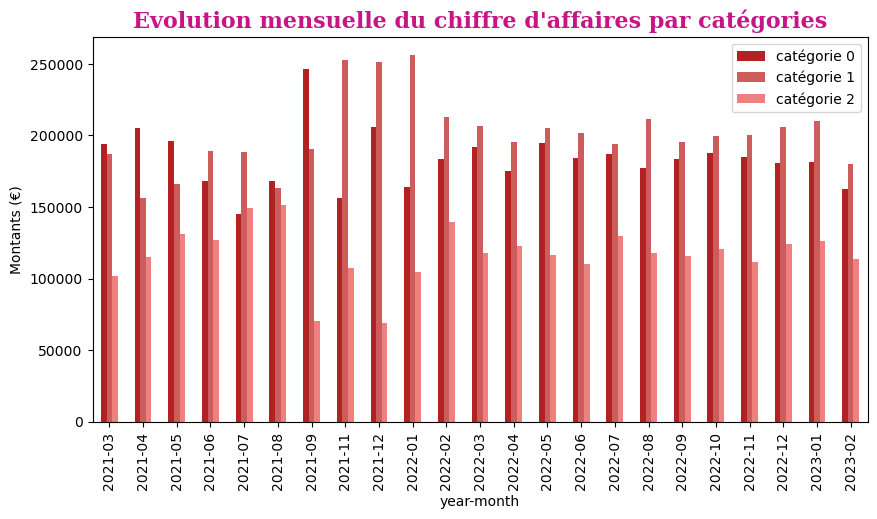

In [158]:
# Graphique : Histogramme du CA mensuel par catégories 

categorie_pivot[['categ0', 'categ1', 'categ2']].plot.bar(figsize = (10,5), color=['firebrick', "indianred", "lightcoral"])

plt.legend(['catégorie 0', 'catégorie 1', 'catégorie 2'])
plt.xlabel('year-month')
plt.ylabel('Montants (€)')
plt.title("Evolution mensuelle du chiffre d'affaires par catégories", fontdict = font_title)

Text(0.5, 1.0, "Courbes d'évolution mensuelle du chiffre d'affaires par catégories")

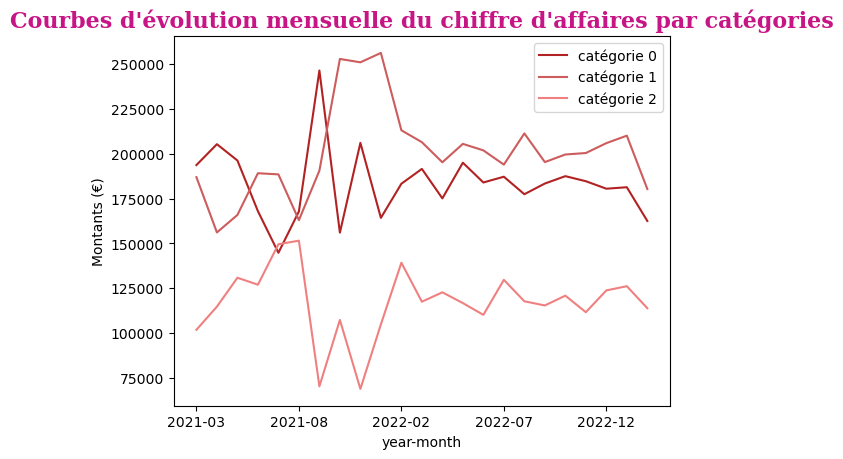

In [159]:
# Graphique : Courbe d'évolution du CA mensuel par catégorie

categorie_pivot[['categ0', 'categ1', 'categ2']].plot(color=['firebrick', "indianred", "lightcoral"])

plt.legend(['catégorie 0', 'catégorie 1', 'catégorie 2'])
plt.xlabel('year-month')
plt.ylabel('Montants (€)')
plt.title("Courbes d'évolution mensuelle du chiffre d'affaires par catégories", fontdict = font_title)

# <span style="color : #8470FF"><u>5.Profils clients : Répartition du CA</u></span>

* Nous allons calculer le montant et nombre d'achats moyen ainsi le chiffre d'affaire par client depuis l'ouverture du site en ligne.

In [342]:
# Calculer le montant moyen d'achats par client
montant_achat = data_final.groupby(["client_id"])["price"].sum().mean()

print(f" Le montant moyen d'achats par client est de : {montant_achat} ")

 Le montant moyen d'achats par client est de : 1341.5989532449407 


In [343]:
# Calculer le nombre moyen d'achats par client
nombre_achat = data_final.groupby(["client_id"])["session_id"].count().mean()

print(f" Le nombre d'achats moyen par client est de : {nombre_achat} ")

 Le nombre d'achats moyen par client est de : 76.49755757152826 


In [162]:
# calculer le chiffre d'affaires par client(montant d'achat par client)
CA_age_client = data_final.groupby(["client_id","sex","age"])["price"].sum().sort_values(ascending = False).reset_index()
CA_age_client.head(11)

client_id sex  age      price
0     c_1609   m   43  312755.08
1     c_4958   m   24  282654.61
2     c_6714   f   55  149843.69
3     c_3454   m   54  111796.68
4     c_2899   f   29    5214.05
5     c_1570   f   44    5136.14
6     c_3263   f   38    5129.89
7     c_7319   f   49    5120.55
8     c_8026   m   45    4979.40
9     c_5263   m   25    4964.87
10    c_2140   f   46    4949.96

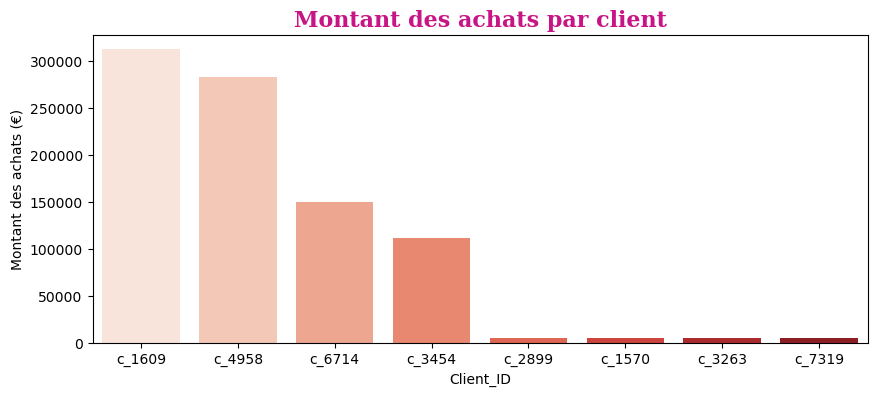

In [163]:
# Visualisation 
A = CA_age_client[CA_age_client["price"] >= 5082.58]
plt.figure(figsize = (10, 4))
sns.barplot(x = A["client_id"], y = A["price"], palette = "Reds")
plt.xlabel("Client_ID")
plt.ylabel("Montant des achats (€)")
plt.title("Montant des achats par client", fontdict = font_title)
plt.show()

* Nous constatons la présence de quatre clients avec les meilleurs chiffre d'affaire variant de 114110.57 à 326039.89euros.
* C'est possible qu'ils soient des revendeurs de livres (librairie ou bibliothécaire).
* Nous allons observer le volume des achats par catégories de livres ces 4 quatres clients.

Text(0.5, 1.0, 'Volume des achats par catégorie de livre par client ')

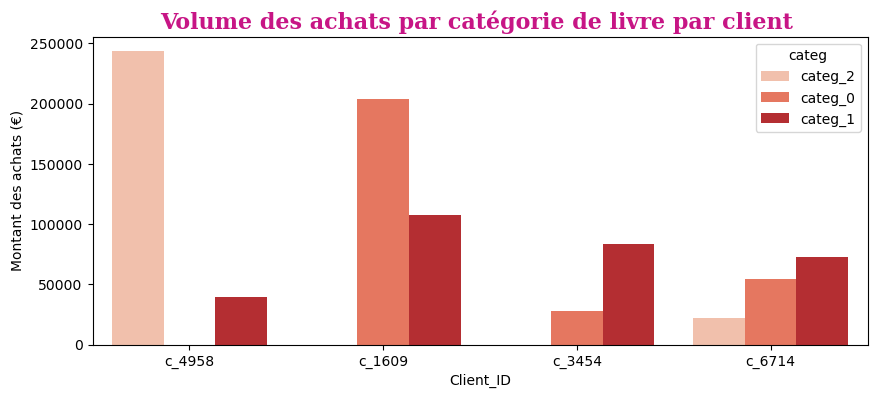

In [164]:
# calculer le chiffre d'affaires par client
CA_client = data_final.groupby(["client_id","sex","categ", "age"])["price"].sum().sort_values(ascending = False).reset_index()
data_final["categ"] = data_final["categ"].astype(str)
# Visualisation 
A = CA_client[CA_client["price"] >= 5082.58]
plt.figure(figsize = (10, 4))
sns.barplot(x = A["client_id"], y = A["price"], hue = "categ", data = A, palette = "Reds")
plt.xlabel("Client_ID")
plt.ylabel("Montant des achats (€)")
plt.title("Volume des achats par catégorie de livre par client ", fontdict = font_title)

* Nous constatons que le client qui fait le plus du chiffre d'affaire (cliend_id = c_1609) achète plus les catégories 1 par rapport au client (client_id = c_4958) qui achéte les livres de la catégorie 2 les plus chers.
* Pour cela nous allons une courbe de lorenz pour montrer l'inégalité dans la série en calculant le coef de Gini.

In [165]:
# CA généré par client et tri par ordre croissant

ca_genere = data_final.groupby('client_id')['price'].sum().sort_values()
ca_genere.head()

client_id
c_8140     8.30
c_8114     9.98
c_240     11.06
c_4648    11.20
c_2793    12.99
Name: price, dtype: float64

In [166]:
# Pourcentage cumulé des CA 

pourcentage_cumule_ca = ca_genere.cumsum() / ca_genere.sum()
pourcentage_cumule_ca.head()

client_id
c_8140    7.195450e-07
c_8114    1.584733e-06
c_240     2.543548e-06
c_4648    3.514500e-06
c_2793    4.640632e-06
Name: price, dtype: float64

In [167]:
# Pourcentage de clients cumulés

pourcentage_cumule_clients = np.arange(1, len(ca_genere) + 1) / len(ca_genere)
pourcentage_cumule_clients

array([1.16306118e-04, 2.32612235e-04, 3.48918353e-04, ...,
       9.99767388e-01, 9.99883694e-01, 1.00000000e+00])

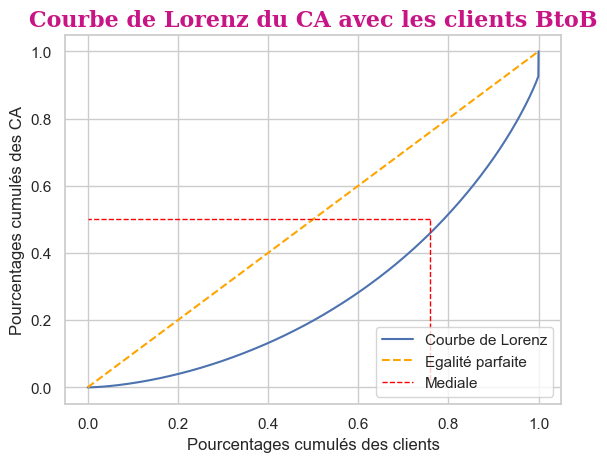

Indice de Gini : 0.45


In [168]:
# Courbe de Lorenz 

sns.set(style ='whitegrid')
plt.plot(pourcentage_cumule_clients, pourcentage_cumule_ca, label = 'Courbe de Lorenz')
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'orange', label = 'Egalité parfaite')
plt.title("Courbe de Lorenz du CA avec les clients BtoB", fontdict = font_title)
plt.xlabel('Pourcentages cumulés des clients')
plt.ylabel('Pourcentages cumulés des CA')

# insérer la médiale
plt.vlines(x=.76, ymin=0, ymax=.5, color='red', linestyle='--', linewidth=1, label='Mediale')
plt.hlines(xmin=.76, xmax=0, y=.5, color='red', linestyle='--', linewidth=1)
plt.legend(loc='lower right')
plt.show()

# Indice de Gini

# Aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"

aire_ss_courbe = pourcentage_cumule_ca[:-1].sum()/len(pourcentage_cumule_ca) 

# Aire entre la 1e bissectrice et la courbe de Lorenz

S = 0.5 - aire_ss_courbe
gini = round(2*S, 2)

print('Indice de Gini :', gini)

* La présence des 4 clients générant le plus de CA modifie légèrement la courbe de Lorenz; 
* Elle modifie aussi faiblement l'Indice de Gini, qui passe de 0.44 à 0.4
* L'indice de Gini s'éloigne fortement de 0, le poids des produits dans le chiffre d'affaires global est donc très inégal dans les 2 cas.

In [169]:
# Filtrer les 4 gros clients et travailler sans eux

# Créer un df sans les 4 clients dont les CA sont en grand décalage avec les autres

# Liste de 4 clients : 

clients_a_retirer = ['c_1609','c_4958', 'c_6714', 'c_3454' ]

# Créer un mask booléen pour les valeurs qui ne sont pas dans la liste

mask = ~data_final['client_id'].isin(clients_a_retirer)
mask

# Df sans ces 4 clients

data_final2 = data_final[mask]
data_final2.head()

id_prod                date session_id client_id sex   birth  age  \
0   0_1518 2022-05-20 13:21:29   s_211425     c_103   f  1986.0   37   
1   0_1518 2021-07-20 13:21:29    s_64849     c_103   f  1986.0   37   
2   0_1518 2022-08-20 13:21:29   s_255965     c_103   f  1986.0   37   
12  0_1518 2022-05-27 12:41:28   s_214775    c_7456   f  1985.0   38   
13  0_1518 2021-11-27 12:41:28   s_125853    c_7456   f  1985.0   38   

   tranche_age  price    categ         day    month  année  mois  jour  
0      35 - 44   4.18  categ_0  2022-05-20  2022-05   2022     5    20  
1      35 - 44   4.18  categ_0  2021-07-20  2021-07   2021     7    20  
2      35 - 44   4.18  categ_0  2022-08-20  2022-08   2022     8    20  
12     35 - 44   4.18  categ_0  2022-05-27  2022-05   2022     5    27  
13     35 - 44   4.18  categ_0  2021-11-27  2021-11   2021    11    27

In [170]:
# CA généré par client et tri par ordre croissant

ca_genere2 = data_final2.groupby('client_id')['price'].sum().sort_values()
ca_genere2.head()

client_id
c_8140     8.30
c_8114     9.98
c_240     11.06
c_4648    11.20
c_2793    12.99
Name: price, dtype: float64

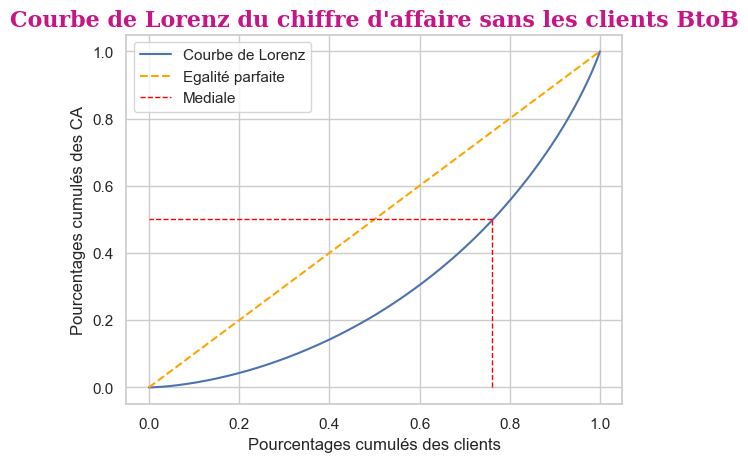

Indice de Gini 2 : 0.4


In [350]:
# Pourcentage cumulé des CA 

pourcentage_cumule_ca2 = ca_genere2.cumsum() / ca_genere2.sum()

# Pourcentage de clients cumulés

pourcentage_cumule_clients2 = np.arange(1, len(ca_genere2) + 1) / len(ca_genere2)

# Courbe de Lorenz

sns.set(style ='whitegrid')
plt.plot(pourcentage_cumule_clients2, pourcentage_cumule_ca2, label = 'Courbe de Lorenz')
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'orange', label = 'Egalité parfaite')
plt.title("Courbe de Lorenz du chiffre d'affaire sans les clients BtoB", fontdict = font_title)
plt.xlabel('Pourcentages cumulés des clients')
plt.ylabel('Pourcentages cumulés des CA') 

# insérer la médiale

plt.vlines(x=.76, ymin=0, ymax=.5, color='red', linestyle='--', linewidth=1, label='Mediale')
plt.hlines(xmin=.76, xmax=0, y=.5, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.show()

# Indice de Gini : Le coefficient de GINI permet d'évaluer de façon chiffrée cette répartition 

# Aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"

aire_ss_courbe2 = pourcentage_cumule_ca2[:-1].sum()/len(pourcentage_cumule_ca2) 

# Aire entre la 1e bissectrice et la courbe de Lorenz

S = 0.5 - aire_ss_courbe2
gini2 = round(2*S, 2)

print('Indice de Gini 2 :', gini2)

# <span style="color : #8470FF"><u>6.Profils clients : informations</u></span>

In [172]:
# Répartition des genres de notre clientèle 

genre = data_final.groupby(['sex'])['client_id'].count()
print(genre)

sex
f    327907
m    329819
Name: client_id, dtype: int64


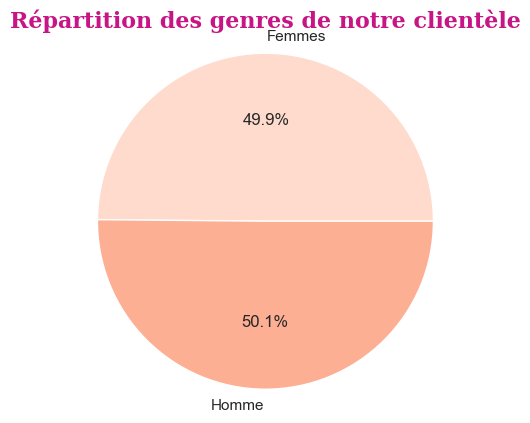

In [173]:
# Représentation graphique des 2 genres 
# Palette de couleurs 'Reds'
colors = sns.color_palette("Reds")
fig1, ax1 = plt.subplots()
ax1.pie(genre,
        labels=['Femmes','Homme'],
        autopct="%1.1f%%",colors=colors)
ax1.axis('equal')
plt.title('Répartition des genres de notre clientèle', fontdict = font_title)
plt.show()

In [174]:
# Répartition du CA par genres

ca_par_genre = data_final.groupby(['sex'])['price'].sum()
ca_par_genre

sex
f    5705513.54
m    5829554.26
Name: price, dtype: float64

In [175]:
# Moyenne d'achats par genre

moy_achats_genre = data_final.groupby(['sex'])['price'].mean()
moy_achats_genre

sex
f    17.399792
m    17.675010
Name: price, dtype: float64

In [176]:
# Répartition du nombre de ventes par genre en 2022

ventes_genre = data_final.groupby(['sex'])['session_id'].count()
ventes_genre

sex
f    327907
m    329819
Name: session_id, dtype: int64

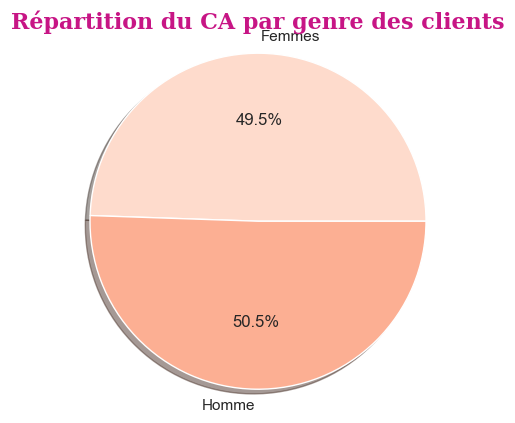

In [177]:
# Représentation graphique des ca entre les 2 genres 
colors = sns.color_palette("Reds")
fig3, ax3 = plt.subplots()
ax3.pie(ca_par_genre,
        labels=['Femmes','Homme'],
        autopct="%1.1f%%",colors=colors,
        shadow=True)
ax3.axis("equal")
plt.title('Répartition du CA par genre des clients', fontdict = font_title)
plt.show()

In [178]:
# calculer la moyenne des achats par genre
CA_moy_sex = data_final.groupby(["sex"])["price"].mean().sort_values(ascending = False).reset_index()
CA_moy_sex

sex      price
0   m  17.675010
1   f  17.399792

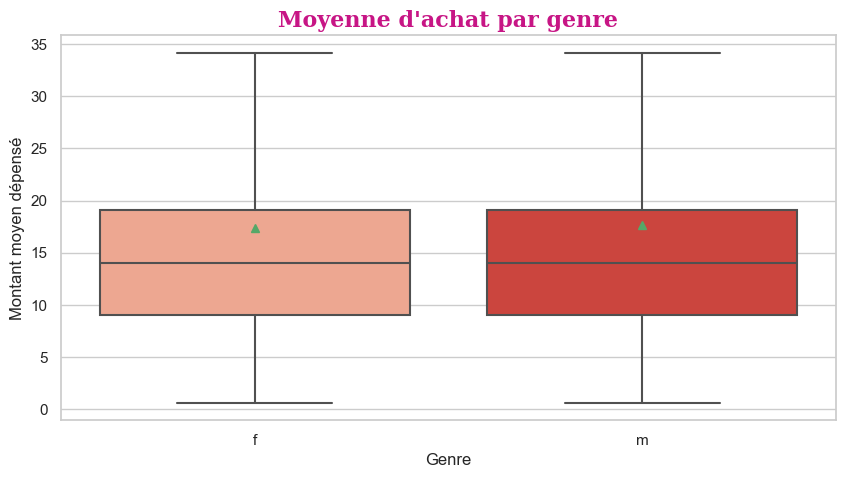

In [179]:
# visualisation de la moyenne des achats de livres par genre
plt.figure(figsize = (10,5))
sns.boxplot(y = data_final["price"], x = data_final["sex"], data = data_final, showfliers=False, showmeans=True, palette = "Reds")
plt.xlabel("Genre")
plt.ylabel("Montant moyen dépensé")
plt.title("Moyenne d'achat par genre", fontdict = font_title)
plt.show()

* Nous allons faire un histogramme avec la colonne âge pour voir la distribution des âges, ensuite pour pouvoir créer une liste des tranche d'âge.

C:\Users\david\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 1000x600 with 0 Axes>

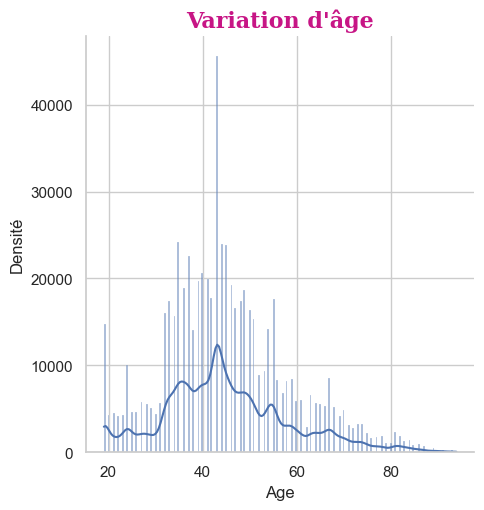

In [180]:
# visualisation de la distribution des âges
plt.figure(figsize=(10,6))
sns.displot(data_final["age"], kde = True)
plt.xlabel("Age")
plt.ylabel("Densité")
plt.title("Variation d'âge", fontdict = font_title)
plt.show()

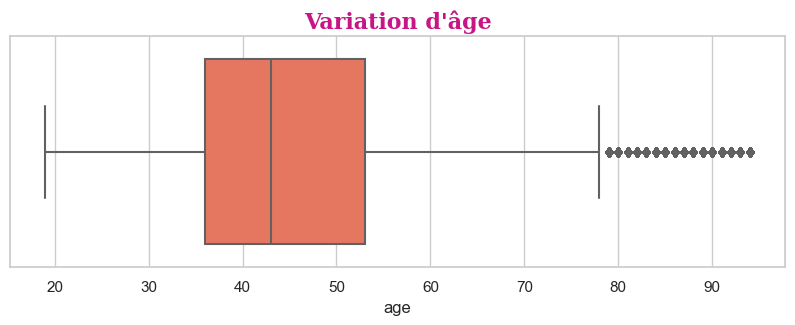

In [181]:
# visualisation de la distribution des âges
plt.figure(figsize=(10,3))
sns.boxplot(x = data_final["age"], palette = "Reds")
plt.title("Variation d'âge", fontdict = font_title)
plt.show()

* Nous allons utiliser la fontion "value_counts()" pour compter le nombre de clients dans chacune des catégories d'âge.

tranche_age
35 - 44       227332
45 - 54       159987
25 - 34        84978
55 - 64        76540
65 et plus     66935
18 - 24        41954
Name: count, dtype: int64
--------------------------------------------------------------
--------------------------------------------------------------


Text(0.5, 1.0, '% clients par tranche age')

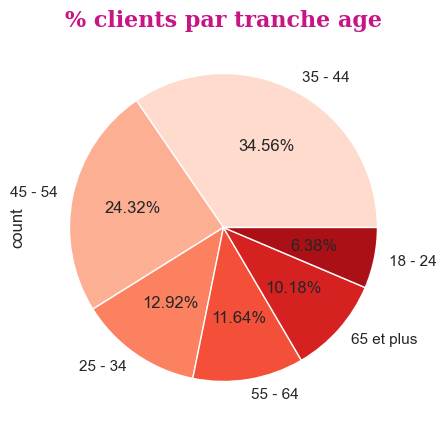

In [182]:
# Le nbre de clients pour chacune des catégories d'âge
print(data_final["tranche_age"].value_counts())
colors = sns.color_palette("Reds")
plt.figure(figsize=(10,5))
#data_final["groupe_age"].value_counts().plot.bar()
data_final["tranche_age"].value_counts().plot.pie(normalize = True,
        autopct = "%1.2f%%", colors=colors)
print("--------------------------------------------------------------")
print("--------------------------------------------------------------")
plt.title("% clients par tranche age", fontdict = font_title)

In [183]:
# Le chiffre d'affaires par catégories d'âges
CA_age = data_final.groupby(["tranche_age"])["price"].sum().sort_values(ascending = False).reset_index()
CA_age

tranche_age       price
0     35 - 44  3018111.36
1     45 - 54  2238157.51
2     25 - 34  2105178.12
3     18 - 24  1754900.52
4     55 - 64  1293369.44
5  65 et plus  1125350.85

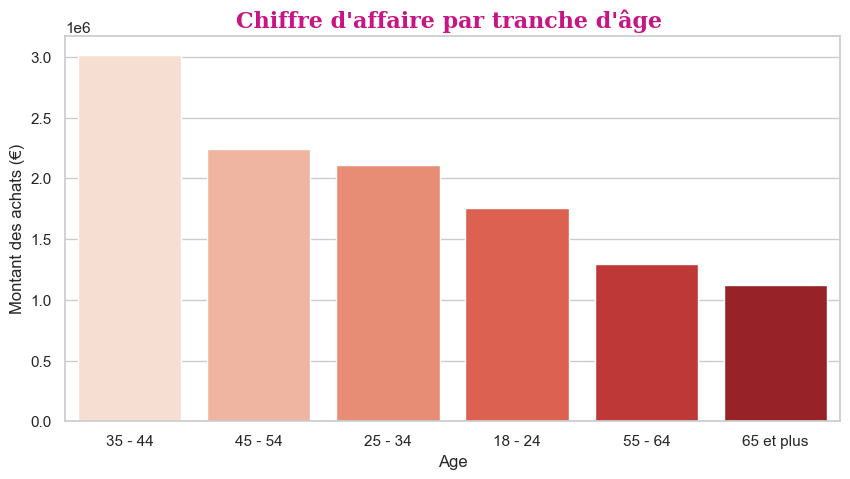

In [184]:
# Visualisation 
plt.figure(figsize = (10, 5))
sns.barplot(x = CA_age["tranche_age"], y = CA_age["price"], data = CA_age, palette = "Reds")
plt.xlabel("Age")
plt.ylabel("Montant des achats (€)")
plt.title("Chiffre d'affaire par tranche d'âge ", fontdict = font_title)
plt.show()

In [185]:
# Le nombre d'achats) par catégories d'âges
TV_age = data_final.groupby(["tranche_age"])["session_id"].count().sort_values(ascending = False).reset_index()
TV_age

tranche_age  session_id
0     35 - 44      227332
1     45 - 54      159987
2     25 - 34       84978
3     55 - 64       76540
4  65 et plus       66935
5     18 - 24       41954

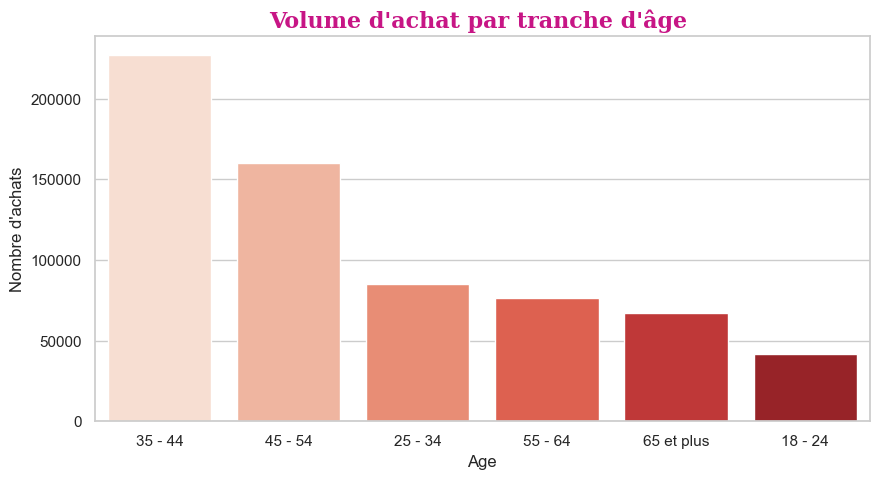

In [186]:
# Visualisation 
plt.figure(figsize = (10, 5))
sns.barplot(x = TV_age["tranche_age"], y = TV_age["session_id"], data = TV_age, palette = "Reds")
plt.xlabel("Age")
plt.ylabel("Nombre d'achats")
plt.title("Volume d'achat par tranche d'âge ", fontdict = font_title)
plt.show()

In [187]:
# comparer la moyenne du prix des catégories d'âge
# Le montant moyen des achats par catégories d'âge
CA_age_moy = data_final.groupby(["tranche_age"])["price"].mean().sort_values(ascending = False).reset_index()
CA_age_moy

tranche_age      price
0     18 - 24  41.829159
1     25 - 34  24.773213
2     55 - 64  16.897955
3  65 et plus  16.812592
4     45 - 54  13.989621
5     35 - 44  13.276228

In [347]:
# Calcul de la moyenne globale
moyenne_globale = data_final["price"].mean()
print(f"La moyenne globale du montant des achats est : {moyenne_globale:.2f}")

La moyenne globale du montant des achats est : 17.54


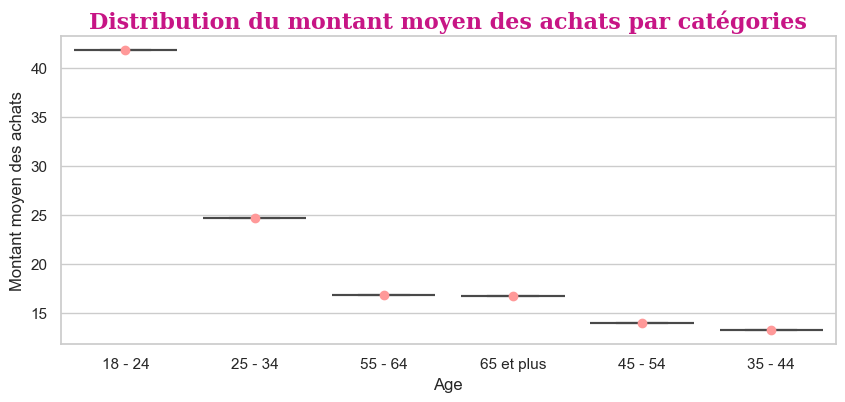

In [188]:
# visualisation du prix moyen par catégorie de livres 
plt.figure(figsize = (10,4))
meanprops = {"marker": "o", "markerfacecolor": "#FF9999", "markeredgecolor": "#FF9999"}
sns.boxplot(x = CA_age_moy["tranche_age"], y = CA_age_moy["price"], orient = "v", data = CA_age_moy, showfliers = False, showmeans=True,meanprops=meanprops)
plt.xlabel("Age")
plt.ylabel("Montant moyen des achats")
plt.title("Distribution du montant moyen des achats par catégories", fontdict = font_title)
plt.show()

* La catégorie Adolescents a le panier moyen le plus élevé, il faudrait essayer de développer le volume de ventes de cette catégorie

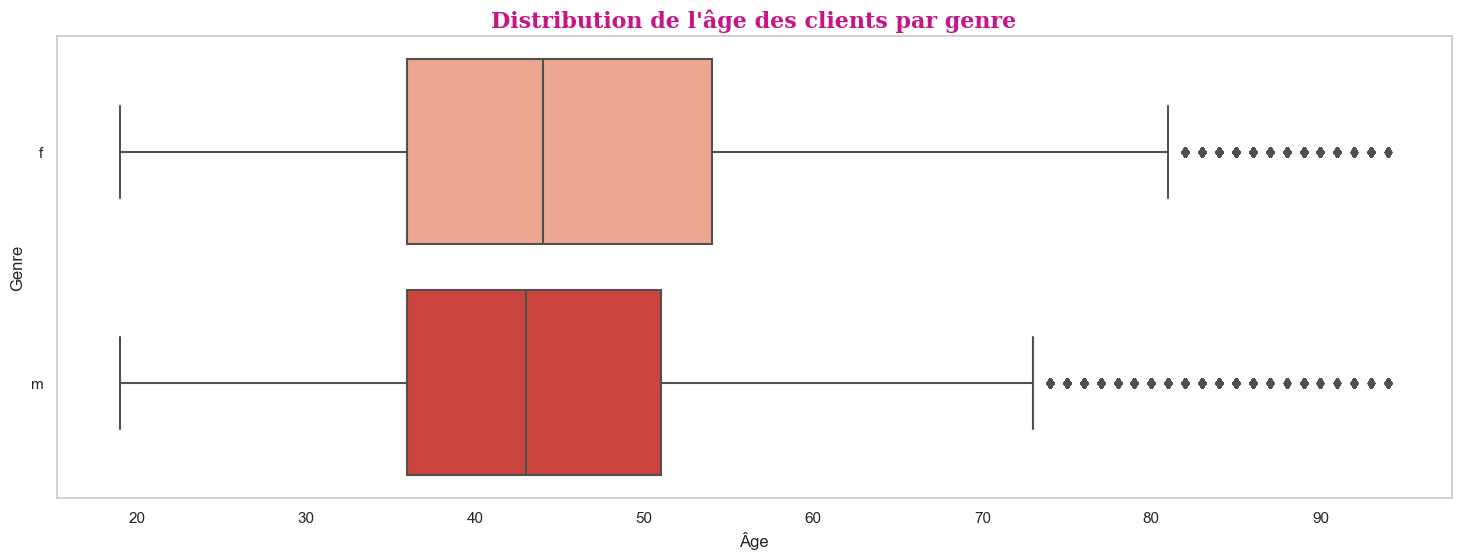

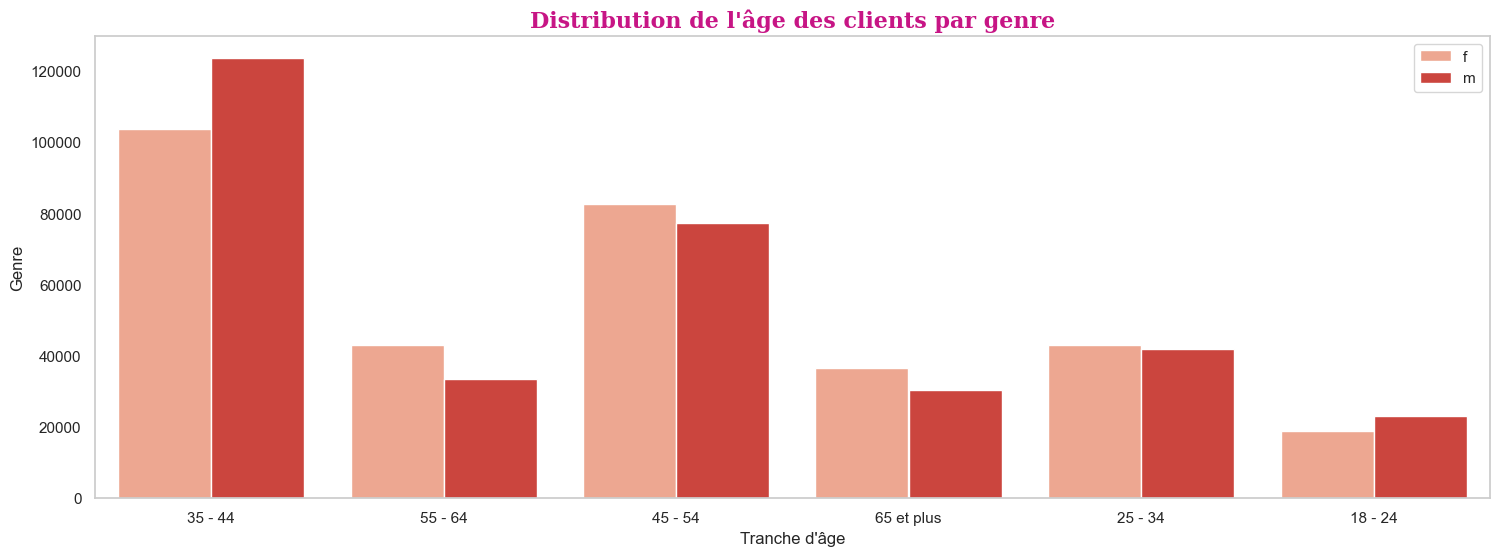

In [189]:
plt.figure(figsize =(18,6))
fig1 = sns.boxplot(data=data_final, x="age", y = 'sex',palette = "Reds")
plt.title("Distribution de l'âge des clients par genre", fontdict = font_title)
plt.xlabel("Âge")
plt.ylabel("Genre")
plt.grid(axis = 'x')

plt.figure(figsize =(18,6))
fig2 = sns.countplot(data=data_final, x="tranche_age", hue = 'sex',palette = "Reds")
plt.title("Distribution de l'âge des clients par genre", fontdict = font_title)
plt.xlabel("Tranche d'âge")
plt.ylabel("Genre")
plt.grid(axis = 'y')
plt.legend()

plt.show()

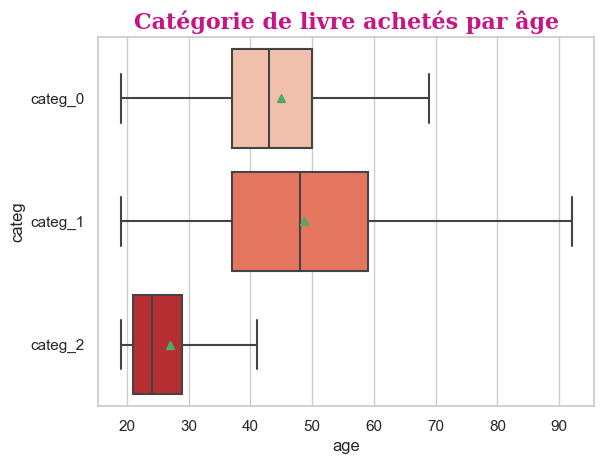

In [190]:
plt.title("Catégorie de livre achetés par âge", fontdict = font_title)
plt.xlabel("Age")
plt.ylabel("Catégorie")

sns.boxplot(data=data_final, x='age', y='categ', orient='h', showfliers=False, showmeans=True,palette = "Reds")
plt.show()

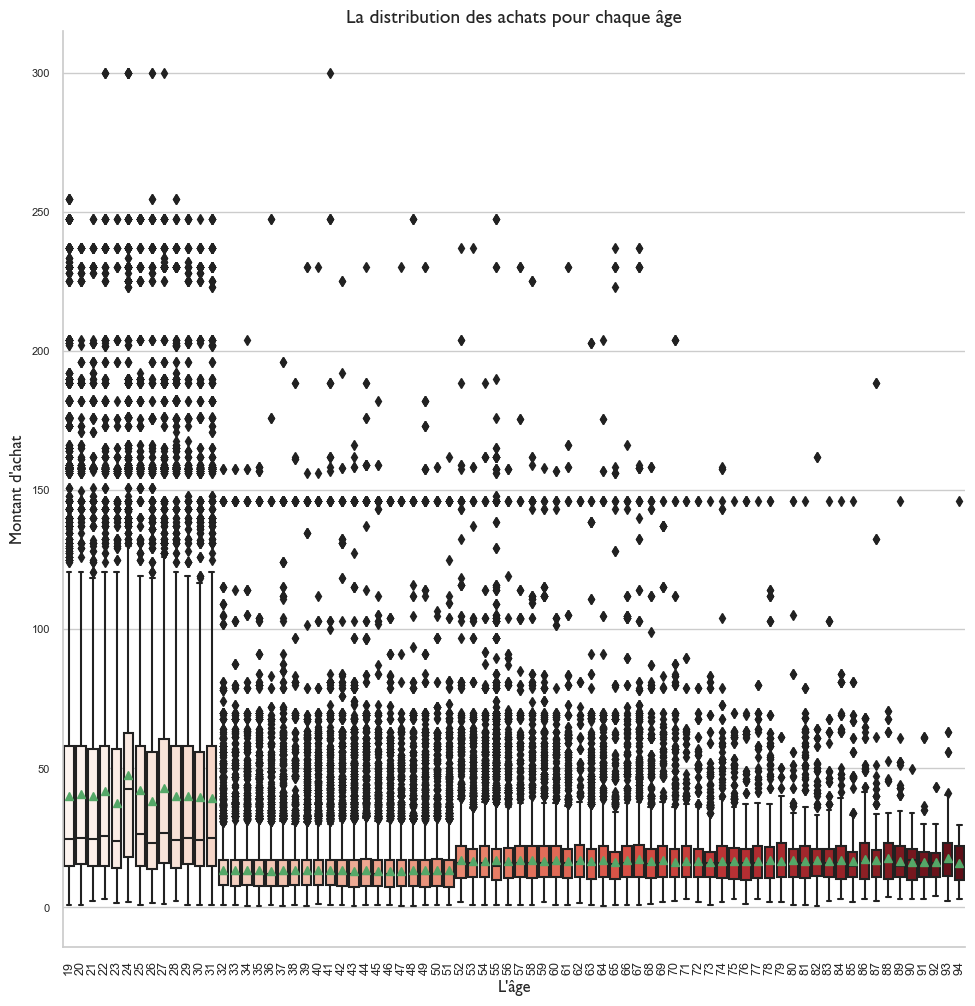

In [191]:
# Graphique (box plot) de la distribution de la variable numérique 'price' fonction de différentes catégories 'age')
sns.catplot(x='age', y='price', data=data_final, kind='box', height=10, showmeans=True,palette = "Reds")
plt.title("La distribution des achats pour chaque âge", fontname='Gill Sans MT', fontsize=14)
plt.ylabel('Montant d\'achat', fontname='Gill Sans MT', fontsize=12)
plt.xlabel('L\'âge', fontname='Gill Sans MT', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=8)
plt.xticks(rotation=90)
plt.show()

In [192]:
#CA détaillé des 4 clients BtoB
ca_clients_B2B = data_final.groupby(["client_id"])["price"].sum().nlargest(4).reset_index()
ca_clients_B2B = ca_clients_B2B.rename(columns={'price': 'Total des achats'})
ca_clients_B2B

client_id  Total des achats
0    c_1609         312755.08
1    c_4958         282654.61
2    c_6714         149843.69
3    c_3454         111796.68

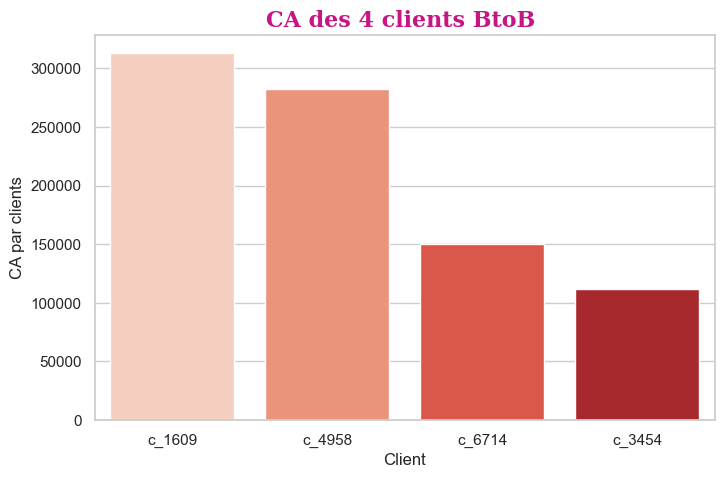

In [193]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=ca_clients_B2B,
    y='Total des achats', x='client_id', palette = "Reds")
plt.xticks(rotation=0)
plt.title('CA des 4 clients BtoB ', fontdict = font_title)
plt.ylabel("CA par clients")
plt.xlabel("Client")
plt.show()

In [194]:
# Les 4 clients btb
cli_btb = data_final[(data_final.client_id== 'c_1609')|(data_final.client_id=='c_4958')|(data_final.client_id=='c_6714')|(data_final.client_id=='c_3454')]
cli_btb

id_prod                date session_id client_id sex   birth  age  \
3       0_1518 2021-05-09 11:52:55    s_32104    c_6714   f  1968.0   55   
4       0_1518 2022-05-30 01:17:07   s_216118    c_6714   f  1968.0   55   
5       0_1518 2023-02-09 11:52:55   s_339104    c_6714   f  1968.0   55   
7       0_1518 2022-10-30 01:17:07   s_289949    c_6714   f  1968.0   55   
8       0_1518 2022-05-09 11:52:55   s_205930    c_6714   f  1968.0   55   
...        ...                 ...        ...       ...  ..     ...  ...   
669381   0_826 2021-07-05 10:12:08    s_58171    c_3454   m  1969.0   54   
669408   0_509 2021-09-10 21:34:16    s_87962    c_3454   m  1969.0   54   
669409   0_509 2022-06-10 21:34:16   s_221828    c_3454   m  1969.0   54   
669410   0_509 2022-07-10 21:34:16   s_236566    c_3454   m  1969.0   54   
669477   0_861 2021-05-23 11:23:51    s_38413    c_3454   m  1969.0   54   

       tranche_age  price    categ         day    month  année  mois  jour  
3          55 - 64   4.18  categ_0  2021-05-09  2021-05   2021     5     9  
4          55 - 64   4.18  categ_0  2022-05-30  2022-05   2022     5    30  
5          55 - 64   4.18  categ_0  2023-02-09  2023-02   2023     2     9  
7          55 - 64   4.18  categ_0  2022-10-30  2022-10   2022    10    30  
8          55 - 64   4.18  categ_0  2022-05-09  2022-05   2022     5     9  
...            ...    ...      ...         ...      ...    ...   ...   ...  
669381     45 - 54   6.89  categ_0  2021-07-05  2021-07   2021     7     5  
669408     45 - 54   5.99  categ_0  2021-09-10  2021-09   2021     9    10  
669409     45 - 54   5.99  categ_0  2022-06-10  2022-06   2022     6    10  
669410     45 - 54   5.99  categ_0  2022-07-10  2022-07   2022     7    10  
669477     45 - 54  11.99  categ_0  2021-05-23  2021-05   2021     5    23  

[45100 rows x 15 columns]

In [195]:
# Calcul du CA des 4 clients BtoB
ca_btb = cli_btb['price'].sum()

# Calcul du CA total
total_ca = data_final['price'].sum()

# Calcul du CA du reste des clients
ca_reste = total_ca - ca_btb

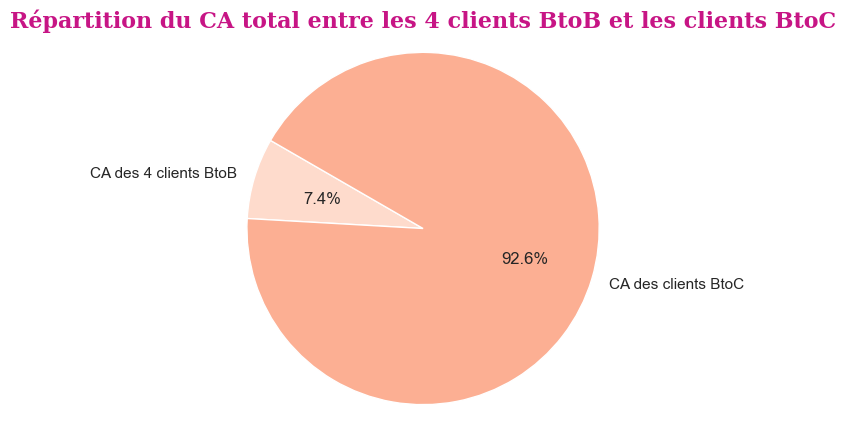

In [196]:
# Création du graphique en secteurs
labels = ['CA des 4 clients BtoB', 'CA des clients BtoC']
sizes = [ca_btb, ca_reste]
colors = sns.color_palette("Reds")

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=150)
plt.title('Répartition du CA total entre les 4 clients BtoB et les clients BtoC', fontdict = font_title)
plt.axis('equal')  # Assure que le graphique est un cercle
plt.show()

### <span style="color : #8470FF"> Analyses complémentaires<a class="anchor" id="3_5"></a>

#### Chiffres clés par période d'activité<a class="anchor" id="3_5_1"></a>

In [197]:
# Définition des périodes d'activités sur une année glissante
data_final.loc[data_final['month']<='2022-02','periode']=1
data_final.loc[data_final['month']>'2022-02','periode']=2

##### Chiffres d'affaires

In [198]:
CA_=data_final.groupby('periode')['price'].sum().reset_index().rename(columns={'price':'CA_annuel'})
CA_

periode   CA_annuel
0      1.0  5511897.35
1      2.0  6023170.45

In [199]:
# Evolution période 1 - période 2
CA_1=CA_[CA_.periode==1.0].iloc[0,1]
CA_2=CA_[CA_.periode==2.0].iloc[0,1]
print("L'évolution du chiffre d'affaires annuel entre la période 1 et la période 2 est de"
      , round((CA_2-CA_1)/CA_1*100),"%.")

L'évolution du chiffre d'affaires annuel entre la période 1 et la période 2 est de 9 %.


In [200]:
# Chiffre d'affaires annuel moyen
print("Le chiffre d'affaires annuel moyen est de",round(CA_.CA_annuel.mean()),"euros")

Le chiffre d'affaires annuel moyen est de 5767534 euros


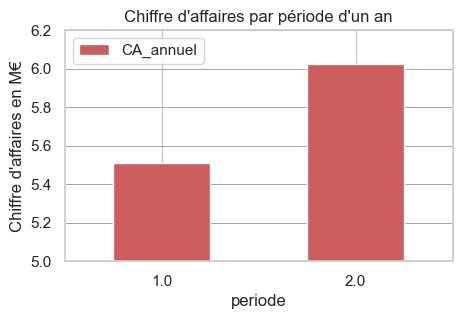

In [201]:
# Evolution période 1 - période 2
CA_.plot(x='periode',y='CA_annuel',kind='bar',figsize=(5,3),color='indianred')
plt.ylim(5e6,6.2e6)
plt.yticks([5.0e6,5.2e6,5.4e6,5.6e6,5.8e6,6.0e6,6.2e6],['5.0','5.2','5.4','5.6','5.8','6.0','6.2'])
plt.xticks(rotation=0)
plt.grid(axis='y',color='gray', linestyle='-', linewidth=0.5)
plt.title("Chiffre d'affaires par période d'un an")
plt.ylabel("Chiffre d'affaires en M€")
plt.legend(loc='upper left')
plt.show()

##### Nombre de ventes

In [202]:
print("Nombre de ventes sur les 2 années d'activités =",data_final.loc[~data_final.date.isna(),'date'].count())

Nombre de ventes sur les 2 années d'activités = 657726


In [203]:
# Définition des périodes d'activités sur une année glissante
data_final.loc[data_final['month']<='2022-02','periode']=1
data_final.loc[data_final['month']>'2022-02','periode']=2

In [204]:
ventes_=data_final.groupby('periode')['date'].count().reset_index().rename(columns={'date':'Nb_ventes'})
ventes_

periode  Nb_ventes
0      1.0     315682
1      2.0     342044

In [205]:
# Evolution période 1 - période 2
ventes_1=ventes_[ventes_.periode==1.0].iloc[0,1]
ventes_2=ventes_[ventes_.periode==2.0].iloc[0,1]
print("L'évolution du nombre de ventes annuel entre la période 1 et la période 2 est de"
      , round((ventes_2-ventes_1)/ventes_1*100),"%.")

L'évolution du nombre de ventes annuel entre la période 1 et la période 2 est de 8 %.


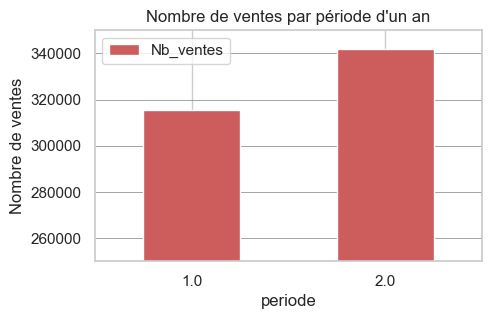

In [206]:
# Evolution période 1 - période 2
ventes_.plot(x='periode',y='Nb_ventes',kind='bar',figsize=(5,3),color='indianred')
plt.grid(axis='y',color='gray', linestyle='-', linewidth=0.5)
plt.ylim(250000,350000)
plt.ylabel("Nombre de ventes")
plt.xticks(rotation=0)
plt.title("Nombre de ventes par période d'un an")
plt.show()

##### Sessions d'achats

In [207]:
print("Nombre de sessions d'achats sur les 2 années d'activités =",
      data_final.loc[~data_final.date.isna(),'session_id'].unique().shape[0])

Nombre de sessions d'achats sur les 2 années d'activités = 330769


In [208]:
session_=data_final.groupby(['periode','session_id'])['jour'].count().reset_index()
session_=session_.groupby('periode')['session_id'].count().reset_index().rename(columns={'session_id':'Nb_session'})
session_

periode  Nb_session
0      1.0      157648
1      2.0      173121

In [346]:
# Étape 1 : Regrouper par client sur toutes les périodes et compter les sessions
session_par_client_total = data_final.groupby('client_id')['session_id'].nunique().reset_index()
session_par_client_total.rename(columns={'session_id': 'Nb_session'}, inplace=True)

# Étape 2 : Calculer la moyenne du nombre de sessions par client sur l'ensemble des périodes
moyenne_sessions_par_client_total = session_par_client_total['Nb_session'].mean()

# Afficher le résultat
print(f"La moyenne du nombre de sessions par client sur toutes les périodes est : {moyenne_sessions_par_client_total}")

La moyenne du nombre de sessions par client sur toutes les périodes est : 38.470458246103746


In [209]:
# Evolution période 1 - période 2
session_1=session_[session_.periode==1.0].iloc[0,1]
session_2=session_[session_.periode==2.0].iloc[0,1]
print("L'évolution du nombre de ventes annuel entre la période 1 et la période 2 est de"
      , round((session_2-session_1)/session_1*100),"%.")

L'évolution du nombre de ventes annuel entre la période 1 et la période 2 est de 10 %.


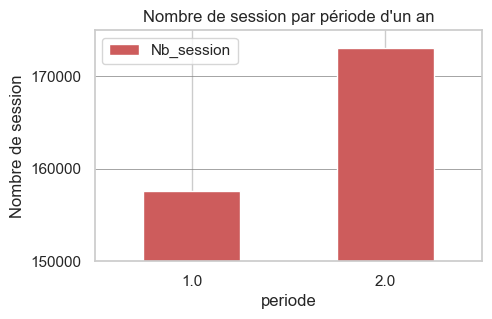

In [210]:
# Evolution période 1 - période 2
session_.plot(x='periode',y='Nb_session',kind='bar',figsize=(5,3),color='indianred')
plt.grid(axis='y',color='gray', linestyle='-', linewidth=0.5)
plt.ylim(150000,175000)
plt.yticks([150000,160000,170000],['150000','160000','170000'])
plt.ylabel("Nombre de session")
plt.xticks(rotation=0)
plt.title("Nombre de session par période d'un an")
plt.show()

##### Nombre de clients

In [211]:
print("Nombre de client ayant effectué des achats sur les 2 années d'activités =",
      data_final.loc[~data_final.date.isna(),'client_id'].unique().shape[0])

Nombre de client ayant effectué des achats sur les 2 années d'activités = 8598


In [212]:
client_=data_final.groupby(['periode','client_id'])['jour'].count().reset_index()
client_=client_.groupby('periode')['client_id'].count().reset_index().rename(columns={'client_id':'Nb_client'})
client_

periode  Nb_client
0      1.0       8598
1      2.0       8524

In [213]:
# Evolution période 1 - période 2
client_1=client_[client_.periode==1.0].iloc[0,1]
client_2=client_[client_.periode==2.0].iloc[0,1]
print("L'évolution du nombre de ventes annuel entre la période 1 et la période 2 est de"
      , round((client_2-client_1)/client_1*100),"%.")

L'évolution du nombre de ventes annuel entre la période 1 et la période 2 est de -1 %.


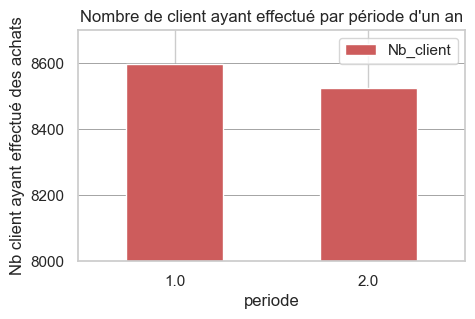

In [214]:
# Evolution période 1 - période 2
client_.plot(x='periode',y='Nb_client',kind='bar',figsize=(5,3),color='indianred')
plt.grid(axis='y',color='gray', linestyle='-', linewidth=0.5)
plt.ylim(8000,8700)
plt.yticks([8000,8200,8400,8600],['8000','8200','8400','8600'])
plt.xticks(rotation=0)
plt.title("Nombre de client ayant effectué par période d'un an")
plt.ylabel("Nb client ayant effectué des achats")
plt.show()

##### Fidélisation des clients

In [215]:
# Clients en période 1
client_1 = data_final[data_final.periode==1.0].groupby('client_id').agg({'month': 'sum'}).reset_index()

In [216]:
# Clients en période 2
client_2 = data_final[data_final.periode==2.0].groupby('client_id').agg({'month': 'sum'}).reset_index()

In [217]:
# Clients ayant effectué des achats qu'en période 1
print("Il y a ",client_1.loc[~client_1.client_id.isin(client_2.client_id),'client_id'].shape[0],"clients qui n'ont éffectué des achats qu'en période 1")

Il y a  74 clients qui n'ont éffectué des achats qu'en période 1


In [218]:
# Nouveau client en période 2
print("Il y a ",client_2.loc[~client_2.client_id.isin(client_1.client_id),'client_id'].shape[0],"nouveau client en période 2")

Il y a  0 nouveau client en période 2


In [219]:
# Taux de fidélisation des clients
nb_client_2 = client_2.shape[0]
nb_total_client = data_final.loc[~data_final.date.isna(),'client_id'].unique().shape[0]

print("Le taux de fidélisation des clients est de",round(nb_client_2 / nb_total_client*100),"%")

Le taux de fidélisation des clients est de 99 %


# <span style="color : #FFA500">PARTIE 3 - Julie : Analyse des Clients</span>

# <span style="color : #8470FF"><u>1.Lien entre le genre d’un client et les catégories des livres achetés</u></span>

In [220]:
# Test de normalité
# pip install pingouin
import pingouin as pg

import warnings
warnings.filterwarnings('ignore')

**Hypothèses et niveau de confiance**

*Quelques hypothèses:*

- Il y a un lien entre le genre d'un client et les catégories de livres achetés
- Les hommes achètent davantage de livres des catégories 0 et 2
- Les femmmes achètent davantage de livres de la catégorie 1
- Il n'y a pas de lien entre le genre et les catégories

Nous procéderons au test des hypothèses suivantes:

- **Hypothèse nulle H0** = Le genre d'un client et les catégories des livres achetés sont deux variables indépendantes *(si p-value > 0.05)*
- **Hypothèse alternative H1** = Le genre d'un client et les catégories des livres achetés ne sont pas deux variables indépendantes *(si p-value < 0.05)*

Nous choisissons un niveau de confiance de 95 %, c'est-à-dire que nous rejetterons l'hypothèse nulle en faveur de l'alternative si la p-value est inférieure à 0,05.

Il s'agit ici d'étudier la relation entre la variable "genre du client" et "catégorie des livres achetés" qui sont toutes deux des variables qualitatives. Nous effectuerons donc un test d'indépendance du Chi2.

Nous sommes ici dans le cas de l'analyse des corrélations entre deux variables qualitatives, nous optons donc pour une première représentation des données sous forme de tableau de contingence.

In [221]:
data_final2['categ'] =  data_final2['categ'].astype(str)

df_contingent_genre_categ = pd.crosstab(data_final['sex'],data_final['categ'], margins=True,margins_name="Total")
df_contingent_genre_categ

categ  categ_0  categ_1  categ_2   Total
sex                                     
f       197098   114087    16722  327907
m       199813   111416    18590  329819
Total   396911   225503    35312  657726

In [222]:
data_final2['categ'] =  data_final2['categ'].astype(str)

df_contingent_genre_categ2 = pd.crosstab(data_final['sex'],data_final['categ'])

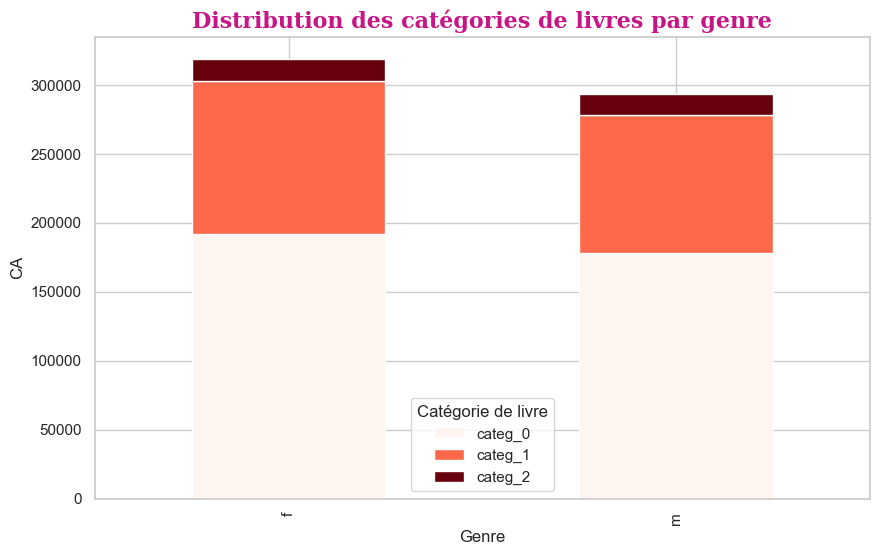

In [223]:
# Calculer la distribution des catégories de livres par genre
genre_category_distribution = pd.crosstab(data_final2['sex'], data_final2['categ'])

# Tracer un graphique en barres empilées
genre_category_distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Reds')
plt.title("Distribution des catégories de livres par genre", fontdict = font_title)
plt.xlabel("Genre")
plt.ylabel("CA")
plt.legend(title="Catégorie de livre")
plt.show()

* Visualisation du tableau de contingence via un graphique

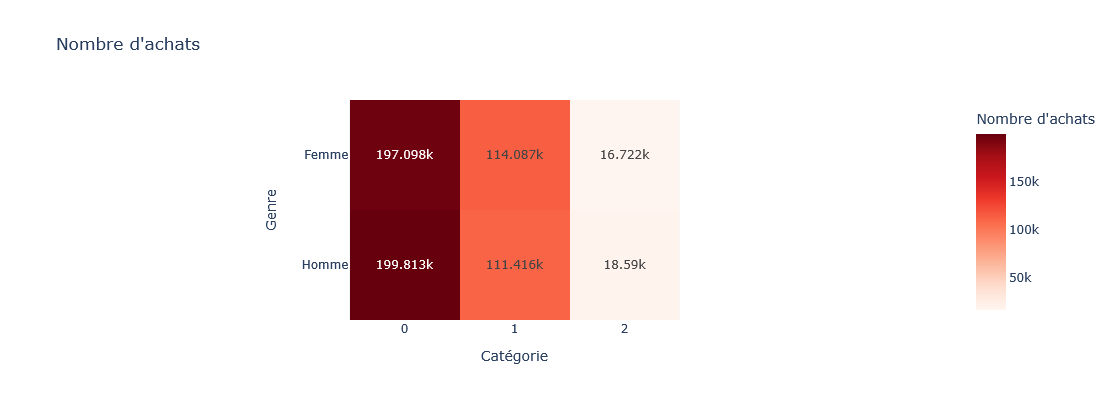

In [224]:
fig_contingent_genre_categ = px.imshow(
    df_contingent_genre_categ2,
    text_auto=True, 
    title="Nombre d'achats", 
    labels=dict(x="Catégorie", y="Genre", color="Nombre d'achats"),
    x=['0', '1', '2'],  # Colonnes
    y=['Femme', 'Homme'],  # Index
    color_continuous_scale='Reds',  # Palette de couleurs rouges
    width=600,  # Réduction de la largeur
    height=400  # Réduction de la hauteur
)

fig_contingent_genre_categ.show()

In [225]:
# Créer une table de contingence
contingency_table = pd.crosstab(data_final2['categ'], data_final2['sex'])

# Appliquer le test du Chi-carré
chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}, p-value: {p}, Degrés de liberté: {dof}")
alpha = 0.05  # Seuil de significativité
if p > alpha:
    print("H0 : Les deux variables qualitatives sont indépendantes si p-value > 5%")
else:
    print('H1 : Les deux variables qualitatives dépendent l’une de l’autre si p-value < 5%')

Chi2: 18.75788251563821, p-value: 8.448460261159054e-05, Degrés de liberté: 2
H1 : Les deux variables qualitatives dépendent l’une de l’autre si p-value < 5%


* Ainsi, nous voyons que les deux variables sont dépendantes, c'est-à-dire que les catégories de livres influencent le genre du client.

* Passons ce tableau en pourcentage afin d'exploiter au mieux les données.

In [226]:
# Test V de Cramer

X2 = chi2_contingency(df_contingent_genre_categ, correction=False)[0]
N = np.sum(df_contingent_genre_categ)
minimum_dimension = min(df_contingent_genre_categ.shape)-1
  
# Calculate Cramer's V
result = np.sqrt((X2/N) / minimum_dimension)
  
# Print the result
print(result)

categ
categ_0    0.009506
categ_1    0.012612
categ_2    0.031870
Total      0.007385
dtype: float64


* Le test V de Cramer donne un résultat pratiquement égal à zéro. 
Nous pouvons donc en conclure que la correlation entre le genre des clients et les catégories de livres achetés est extremement faible.

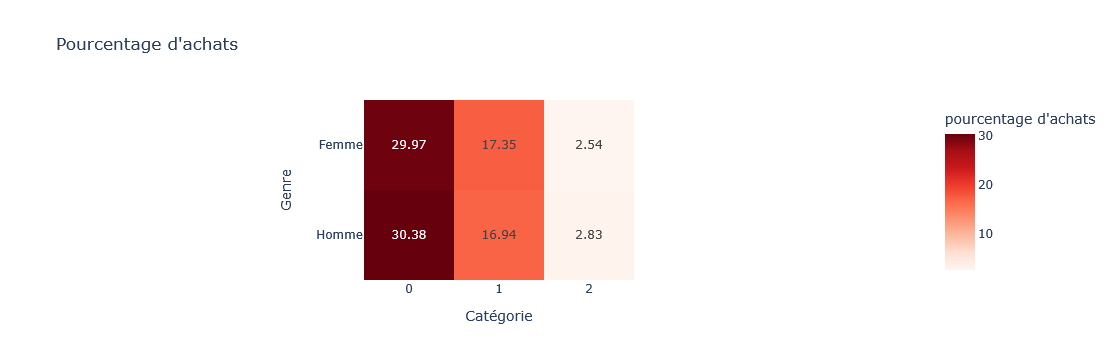

In [227]:
sommme_nombre_vente = df_contingent_genre_categ2.values.sum()

df_contingent_genre_categ_pourcent = round(df_contingent_genre_categ2 * 100 / sommme_nombre_vente,2)


fig_contingent_genre_categ_pourcent = px.imshow(df_contingent_genre_categ_pourcent, text_auto=True, title = "Pourcentage d'achats",
                                               labels=dict(x = "Catégorie", y = "Genre", color = "pourcentage d'achats"),
                                                x=['0', '1', '2'],
                                                y=['Femme', 'Homme'], color_continuous_scale='Reds')

                 
fig_contingent_genre_categ_pourcent.show()

**Interprétation des résultats**

<div class="alert alert-block alert-info">
    La p-value étant largement inférieure au seuil de significativité de 5%, nous <b>rejetons donc l'hypothèse nulle</b> et concluons donc qu'il y a bien un lien entre le genre d'un client et les catégories des livres achetés.
</div>

# <span style="color : #8470FF"><u>2.Lien entre l’âge des clients et le montant total des achats</u></span>

### Test de normalité

In [228]:
from scipy.stats import kstest
from scipy import stats

Les tests statistiques qui suivent vont tous concerner la variable 'âge'. Afin de savoir si nous utiliserons des tests paramétriques ou non-paramétriques, nous décidons de procéder à un **test de normalité** de cette variable pour voir si les observations suivent une loi normale.

**Hypothèses et niveau de confiance**

Les hypothèses sont les suivantes:

- **Hypothèse nulle H0** = les données suivent une loi normale

- **Hypothèse alternative H1** = les données ne suivent pas une loi normale

Nous choisissons un niveau de confiance de 95 %, c'est-à-dire que nous rejetterons l'hypothèse nulle en faveur de l'alternative si la p-value est inférieure à 0,05.

Nous commençons donc par représenter graphiquement la variable âge sous forme d'histogramme, puis nous utiliserons le test d'adéquation de Kolmogorov-Smirnov.

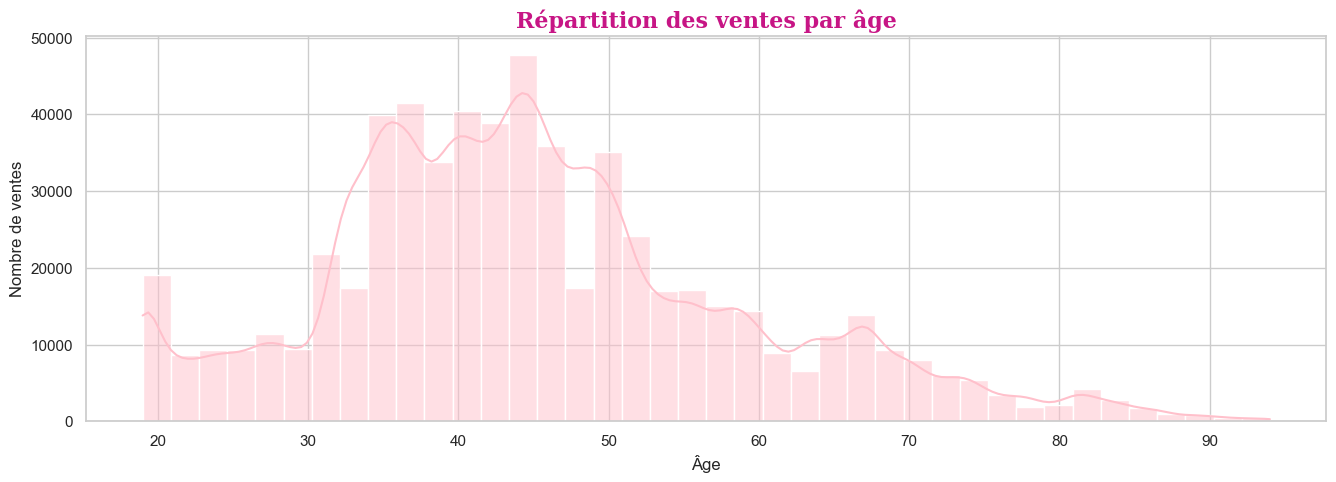

In [229]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Créer la figure
plt.figure(figsize=(16, 5))

# Histogramme avec KDE
sns.histplot(
    data=data_final2['age'], 
    bins=40, 
    kde=True, 
    color='pink',              # Couleur des barres de l'histogramme
    line_kws={'color': 'red'}  # Couleur et style de la courbe KDE
)

# Ajouter un titre
plt.title("Répartition des ventes par âge", fontdict = font_title)
plt.xlabel("Âge")
plt.ylabel("Nombre de ventes")

# Afficher le graphique
plt.show()


**Test statistique: le test de Kolmogorov-Smirnov**

In [230]:
# Vérifier la normalité de l'âge
age = data_final2.groupby('client_id')['age'].first()
stat_age, p_value_age = shapiro(age)
print(f"Shapiro-Wilk test pour l'âge: Stat={stat_age}, p-value={p_value_age}")

# Vérifier la normalité du montant total des achats par client
total_purchase_per_client = data_final2.groupby('client_id')['price'].sum()
stat_purchase, p_value_purchase = shapiro(total_purchase_per_client)
print(f"Shapiro-Wilk test pour le montant total des achats: Stat={stat_purchase}, p-value={p_value_purchase}")

# Synchronisation des données
data = pd.DataFrame({'age': age, 'total_purchase_per_client': total_purchase_per_client}).dropna()
age = data['age']
total_purchase_per_client = data['total_purchase_per_client']

# Tests de normalité
p_value_age = shapiro(age).pvalue
p_value_purchase = shapiro(total_purchase_per_client).pvalue

# Appliquer la corrélation appropriée
if p_value_age > 0.05 and p_value_purchase > 0.05:
    # Utiliser Pearson si les deux distributions sont normales
    correlation, p_value = pearsonr(age, total_purchase_per_client)
    print(f"Corrélation de Pearson: {correlation:.4f}, p-value: {p_value:.4f}")
else:
    # Utiliser Spearman si une des deux distributions n'est pas normale
    correlation, p_value = spearmanr(age, total_purchase_per_client)
    print(f"Corrélation de Spearman: {correlation:.4f}, p-value: {p_value:.4f}")

Shapiro-Wilk test pour l'âge: Stat=0.9697288870811462, p-value=4.6438064211784054e-39
Shapiro-Wilk test pour le montant total des achats: Stat=0.9042510986328125, p-value=0.0
Corrélation de Spearman: -0.1790, p-value: 0.0000


In [231]:
# Appliquer la corrélation appropriée
if p_value_age > 0.05 and p_value_purchase > 0.05:
    # Utiliser Pearson si les deux distributions sont normales
    correlation, p_value = pearsonr(age, total_purchase_per_client)
    print(f"Corrélation de Pearson: {correlation:.4f}, p-value: {p_value:.4f}")
else:
    # Utiliser Spearman si une des deux distributions n'est pas normale
    correlation, p_value = spearmanr(age, total_purchase_per_client)
    print(f"Corrélation de Spearman: {correlation:.4f}, p-value: {p_value:.4f}")

Corrélation de Spearman: -0.1790, p-value: 0.0000


In [232]:
ks_stat, p_value = kstest(total_purchase_per_client, 'norm', args=(np.mean(total_purchase_per_client), np.std(total_purchase_per_client)))
print(f"Statistique K-S : {ks_stat:.4f}")
print(f"Valeur-p : {p_value:.4f}")


Statistique K-S : 0.1056
Valeur-p : 0.0000


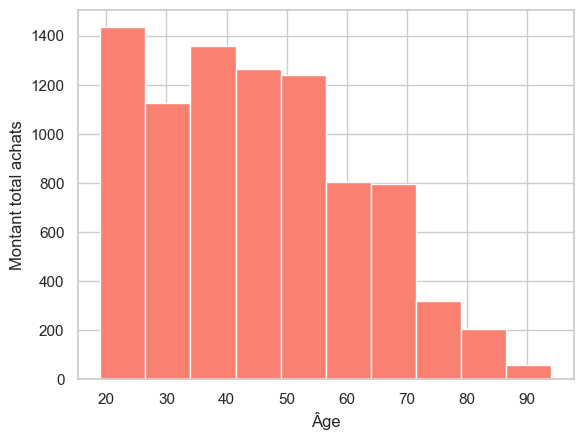

In [233]:
# Regardons graphiquement la distribution de la variable 'age'
plt.hist(data['age'], bins=10, color='salmon')  # Adjust color here
plt.xlabel("Âge")
plt.ylabel("Montant total achats")
plt.show()

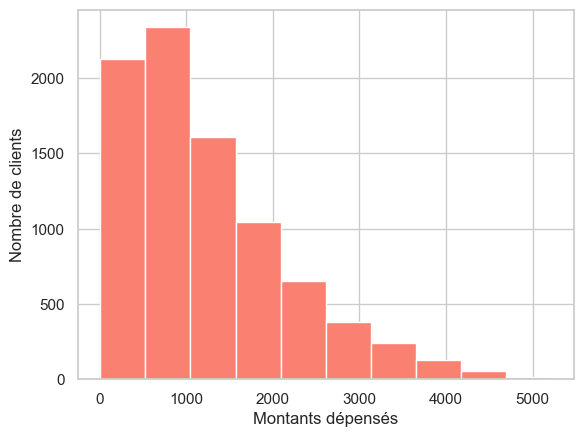

In [234]:
# Regardons graphiquement la distribution de la variable 'montant total'
plt.hist(data['total_purchase_per_client'], bins=10, color='salmon')  # Adjust color here
plt.xlabel("Montants dépensés")
plt.ylabel("Nombre de clients")
plt.show()

In [235]:
pearson = round(pearsonr(data["age"],data["total_purchase_per_client"])[0],4)
cov = round(np.cov(data["age"],data["total_purchase_per_client"],ddof=0)[1,0],4)
print("Le coefficient de Pearson est de",pearson)
print("La covariance est de",cov)

Le coefficient de Pearson est de -0.1837
La covariance est de -2891.807


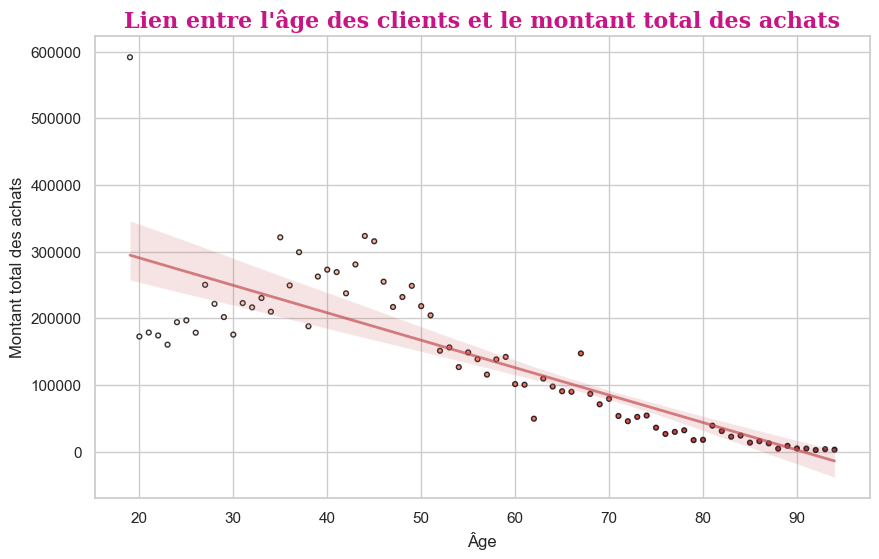

In [236]:
# Calculer le montant total des achats par client
age_revenue = data_final2.groupby('age')['price'].sum()
# Normaliser les couleurs selon les valeurs des points
norm = Normalize(vmin=age_revenue.index.min(), vmax=age_revenue.index.max())
cmap = plt.get_cmap('Reds')

# Ajouter les couleurs aux points via scatter_kws
colors = [cmap(norm(value)) for value in age_revenue.index]

# Créer la figure
plt.figure(figsize=(10, 6))

# Tracer la courbe de régression avec des couleurs personnalisées
sns.regplot(
    x=age_revenue.index, 
    y=age_revenue.values, 
    scatter_kws={'s': 12, 'facecolors': colors, 'edgecolors': 'black'},  # Points colorés
    line_kws={"color": "r", "alpha": 0.7, "lw": 2}  # Ligne de régression rouge
)

# Ajouter un titre et les axes
plt.title("Lien entre l'âge des clients et le montant total des achats", fontdict=font_title)
plt.xlabel("Âge")
plt.ylabel("Montant total des achats")
plt.grid(True)

# Afficher le graphique
plt.show()

In [237]:
# Utiliser les données préparées : age_revenue contient l'âge des clients et leur montant total des achats
age = age_revenue.index.values.reshape(-1, 1)  # Âge (variables indépendantes)
revenue = age_revenue.values  # Montant total des achats (variable dépendante)

# Initialiser le modèle de régression linéaire
model = LinearRegression()

# Ajuster le modèle aux données
model.fit(age, revenue)

# Prédire les valeurs avec le modèle ajusté
predictions = model.predict(age)

# Calculer l'indice de régression (R²)
r_squared = r2_score(revenue, predictions)

print(f"Indice de Régression (R²): {r_squared:.4f}")
print("Cela indique une relation relativement forte entre l'âge des clients et le montant total des achats. Cela signifie que l'âge est un facteur significatif pour expliquer les variations dans le montant des achats.")


Indice de Régression (R²): 0.6906
Cela indique une relation relativement forte entre l'âge des clients et le montant total des achats. Cela signifie que l'âge est un facteur significatif pour expliquer les variations dans le montant des achats.


Condition de validité du test :
    
    1: Au moins 20 individus dans l'échantillon (recommandé)
    2: Chaque variable suit une distribution normale
    
Les conditions ne sont pas respectées pour le test paramétrique, nous allons donc procéder aux tests de spearman (non paramétrique)

In [238]:
# le montant total dépensé change t'il en fonction de l'age du client ?

corr, pval = spearmanr(data["age"],data["total_purchase_per_client"])

# affichage du résultat
print("Spearman's correlation coefficient:", corr)
print("p-value:", pval)

if pval > alpha:
    print("H0 : Variables non corrélées si p-value > 5%")
else:
    print('H1 : Variables corrélées : p-value < 5%')

Spearman's correlation coefficient: -0.1790161455099465
p-value: 8.144097856517299e-63
H1 : Variables corrélées : p-value < 5%


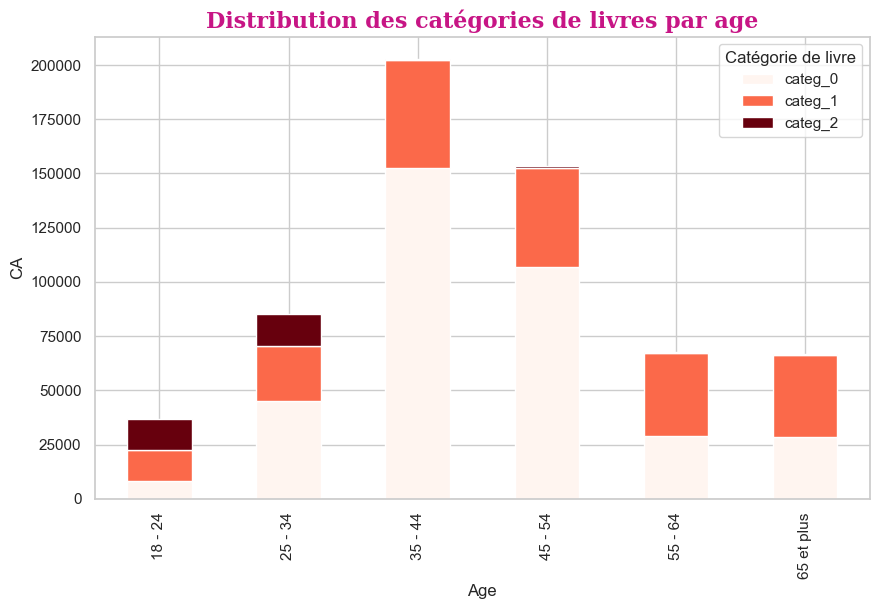

In [239]:
# Calculer la distribution des catégories de livres par groupe d age
age_category_distribution = pd.crosstab(data_final2['tranche_age'], data_final2['categ'])

# Tracer un graphique en barres empilées
age_category_distribution.plot(kind='bar', stacked=True, figsize=(10, 6),colormap='Reds')
plt.title("Distribution des catégories de livres par age", fontdict = font_title)
plt.xlabel("Age")
plt.ylabel("CA")
plt.legend(title="Catégorie de livre")
plt.show()

In [240]:
# Vérifier la normalité de l'âge avec Shapiro-Wilk
age = data_final2.groupby('client_id')['age'].first()
stat_age, p_value_age = shapiro(age)
print(f"Shapiro-Wilk test pour l'âge: Stat={stat_age:.4f}, p-value={p_value_age:.4f}")

# Vérifier la normalité du panier moyen par client avec Shapiro-Wilk
total_purchase_per_client_m = data_final2.groupby('client_id')['price'].mean()
stat_purchase, p_value_purchase = shapiro(total_purchase_per_client_m)
print(f"Shapiro-Wilk test pour le montant moyen des achats: Stat={stat_purchase:.4f}, p-value={p_value_purchase:.4f}")

# Appliquer le test de Kolmogorov-Smirnov sur le panier moyen par client
ks_stat_purchase, p_value_ks_purchase = kstest(total_purchase_per_client_m, 'norm', args=(np.mean(total_purchase_per_client_m), np.std(total_purchase_per_client_m)))
print(f"Kolmogorov-Smirnov test pour le montant moyen des achats: Stat={ks_stat_purchase:.4f}, p-value={p_value_ks_purchase:.4f}")

# Appliquer le test de Kolmogorov-Smirnov sur l'âge
ks_stat_age, p_value_ks_age = kstest(age, 'norm', args=(np.mean(age), np.std(age)))
print(f"Kolmogorov-Smirnov test pour l'âge: Stat={ks_stat_age:.4f}, p-value={p_value_ks_age:.4f}")

# Appliquer la corrélation appropriée
if p_value_age > 0.05 and p_value_purchase > 0.05:
    # Utiliser Pearson si les deux sont normales
    correlation, p_value = pearsonr(age, total_purchase_per_client_m)
    print(f"Corrélation de Pearson: {correlation:.4f}, p-value={p_value:.4f}")
else:
    # Utiliser Spearman si une des deux n'est pas normale
    correlation, p_value = spearmanr(age, total_purchase_per_client_m)
    print(f"Corrélation de Spearman: {correlation:.4f}, p-value={p_value:.4f}")


Shapiro-Wilk test pour l'âge: Stat=0.9697, p-value=0.0000
Shapiro-Wilk test pour le montant moyen des achats: Stat=0.6841, p-value=0.0000
Kolmogorov-Smirnov test pour le montant moyen des achats: Stat=0.2776, p-value=0.0000
Kolmogorov-Smirnov test pour l'âge: Stat=0.0640, p-value=0.0000
Corrélation de Spearman: -0.3259, p-value=0.0000


**Interprétation des résultats**

<div class="alert alert-block alert-info">
    
L'age et montant total des achats ne suivent pas une distribution normale, comme le montrent les résultats des tests de Shapiro-Wilk et de Kolmogorov-Smirnov. La corrélation de Spearman indique une corrélation faible mais significative entre l'âge et le montant total des achats. 
    
</div>

# <span style="color : #8470FF"><u>3.Lien entre l’âge des clients et la fréquence d’achat</u></span>

**Hypothèses et niveau de confiance**

*Quelques hypothèses:*

- Il y a un lien entre l'âge d'un client et la fréquence d'achat
- Plus un client est âgé et moins il est susceptible d'acheter régulièrement
- Un client entre 30 et 50 ans est plus enclin à effectuer des achats réguliers
- Il n'y a pas de lien entre l'âge d'un client et la fréquence d'achat

Nous procéderons au test des hypothèses suivantes:

- **Hypothèse nulle H0** = pas de corrélation entre l'âge et la fréquence d'achat.

- **Hypothèse alternative H1** = corrélation entre l'âge et la fréquence d'achat.

Nous choisissons un niveau de confiance de 95 %, c'est-à-dire que nous rejetterons l'hypothèse nulle en faveur de l'alternative si la p-value est inférieure à 0,05.

Nous sommes à nouveau dans la situation où nous souhaitons analyser la relation entre 2 variables quantitatives.
La distribution de la variable "âge" ne suivant pas une loi normale, nous optons à nouveau pour un test non paramétrique qui sera toujours le test de **corrélation de Spearman.** Nous effectuons une représentation graphique des données via un diagramme de dispersion.

In [241]:
# Regardons le nombre d'achats par client sur la période totale

frequence_achats = data_final2.groupby(['client_id','age','tranche_age'])['session_id'].count().reset_index()
frequence_achats.rename(columns = {'session_id': 'frequence_achats'}, inplace=True)
frequence_achats.sort_values(['tranche_age'],inplace=True)
frequence_achats.head()

client_id  age tranche_age  frequence_achats
3519    c_4175   22     18 - 24                81
8592     c_998   22     18 - 24                53
2565    c_3311   23     18 - 24                30
4292    c_4874   19     18 - 24                50
2567    c_3313   23     18 - 24                49

In [242]:
# Vérifier la normalité de l'âge
stat_age, p_value_age = shapiro(frequence_achats['age'])
print(f"Shapiro-Wilk test pour l'âge: Stat={stat_age}, p-value={p_value_age}")

# Vérifier la normalité de la fréquence d'achat
stat_purchase, p_value_purchase = shapiro(frequence_achats['frequence_achats'])
print(f"Shapiro-Wilk test pour la fréquence d'achat: Stat={stat_purchase}, p-value={p_value_purchase}")

# Tests de normalité
p_value_age = shapiro(frequence_achats['age']).pvalue
p_value_purchase = shapiro(frequence_achats['frequence_achats']).pvalue

Shapiro-Wilk test pour l'âge: Stat=0.9697288870811462, p-value=4.6438064211784054e-39
Shapiro-Wilk test pour la fréquence d'achat: Stat=0.8171488642692566, p-value=0.0


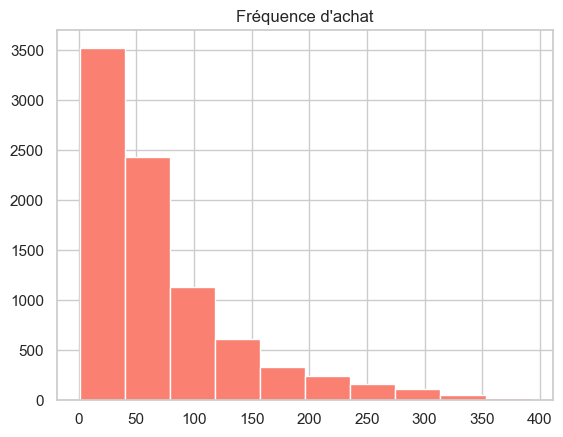

In [243]:
# Regardons graphiquement la distribution de la variable 'frequence_achat'

frequence_achats['frequence_achats'].hist(color='salmon')
plt.title("Fréquence d'achat")
plt.show()

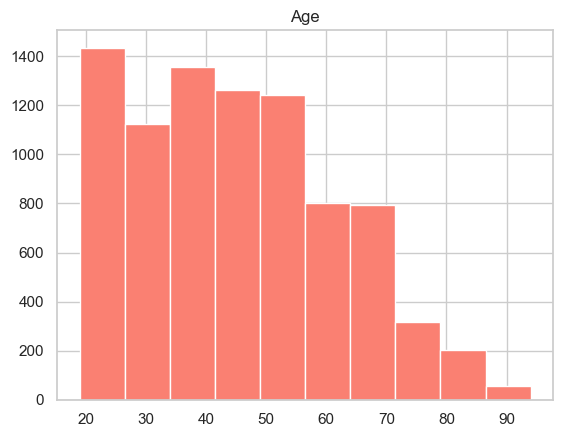

In [244]:
# Regardons graphiquement la distribution de la variable 'frequence_achat'

frequence_achats['age'].hist(color='salmon')
plt.title("Age")
plt.show()

In [264]:
corr, pval = spearmanr(frequence_achats['age'], frequence_achats['frequence_achats'])

# affichage du résultat
print("Spearman's correlation coefficient:", corr)
print("p-value:", pval)

if pval > alpha:
    print("H0 : Variables non corrélées si p-value > 5%")
else:
    print('H1 : Variables corrélées : p-value < 5%')

Spearman's correlation coefficient: 0.12960358760068205
p-value: 1.6381331276761283e-33
H1 : Variables corrélées : p-value < 5%


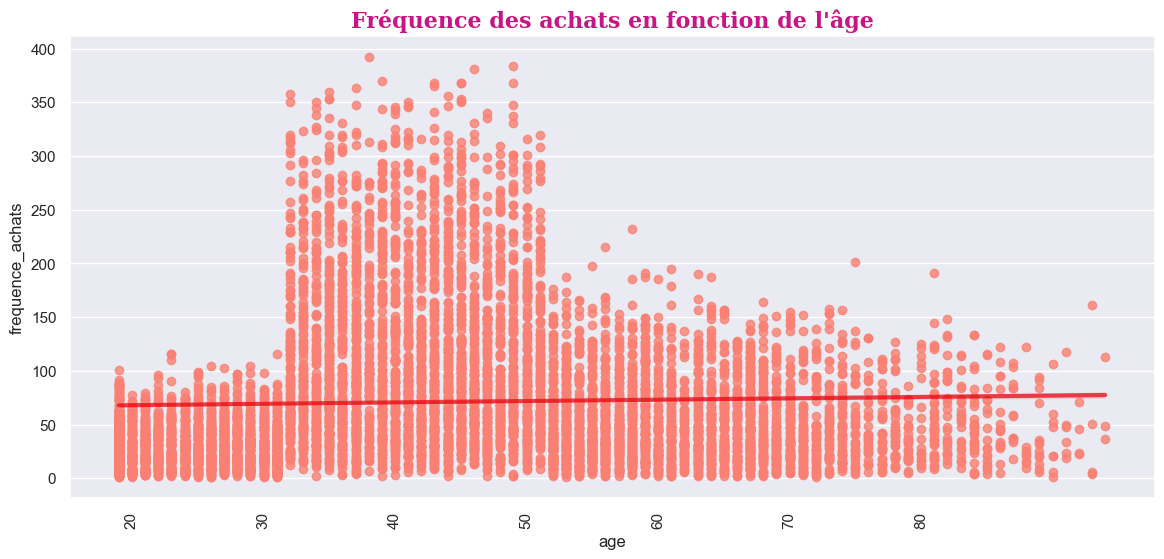

In [267]:
# Regardons cela avec la représentation graphique de la fréquence d'achats en fonction de l'âge

plt.figure(figsize = (14,6))
plt.title("Fréquence des achats en fonction de l'âge", fontdict = font_title)
sns.set_theme(palette="bright")
plt.xticks([20,30,40,50,60,70,80])
plt.xticks(rotation='vertical')
plt.grid(axis='x')
sns.regplot(x=frequence_achats["age"], y=frequence_achats["frequence_achats"],color='salmon',line_kws={"color":"r","alpha":0.7,"lw":3})
plt.show()

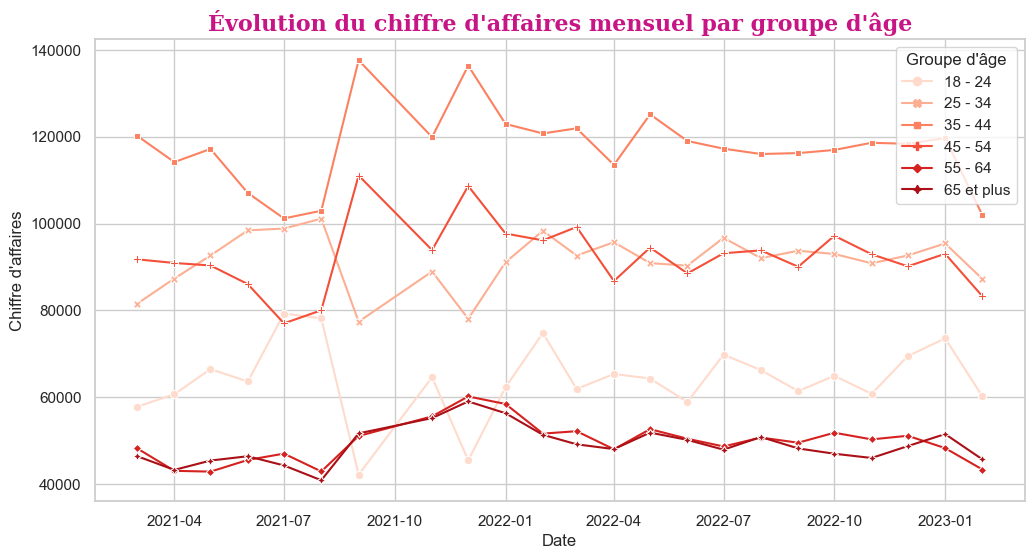

In [245]:
# Calculer la somme des prix par groupe d'âge et par date (mois)
test = data_final2.groupby([data_final2['date'].dt.to_period("M"), 'tranche_age'])['price'].sum().unstack()

# Convertir l'index pour un affichage correct
test.index = test.index.to_timestamp()

# Tracer les graphiques avec Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=test, markers=True, dashes=False, palette = "Reds")

# Personnalisation du graphique
plt.title("Évolution du chiffre d'affaires mensuel par groupe d'âge", fontdict = font_title)
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires")
plt.legend(title='Groupe d\'âge')
plt.grid(True)
plt.show()

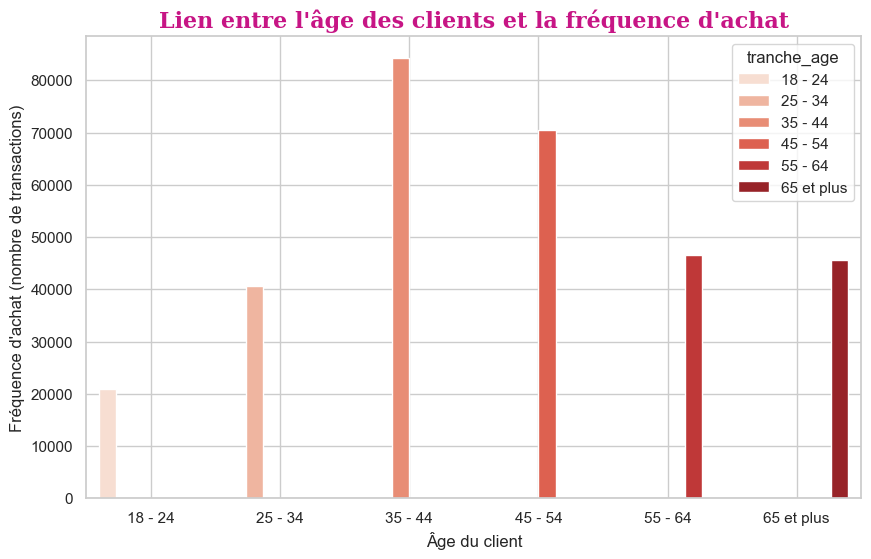

In [246]:
# Calculer la fréquence d'achat par client
age_frequency = data_final2.groupby('tranche_age',observed=True)['session_id'].nunique()

# Tracer le graphique
plt.figure(figsize=(10, 6))
sns.barplot(x=age_frequency.index, y=age_frequency.values,hue=age_frequency.index, palette='Reds')
plt.title("Lien entre l'âge des clients et la fréquence d'achat", fontdict = font_title)
plt.xlabel("Âge du client")
plt.ylabel("Fréquence d'achat (nombre de transactions)")
plt.grid(True)
plt.show()

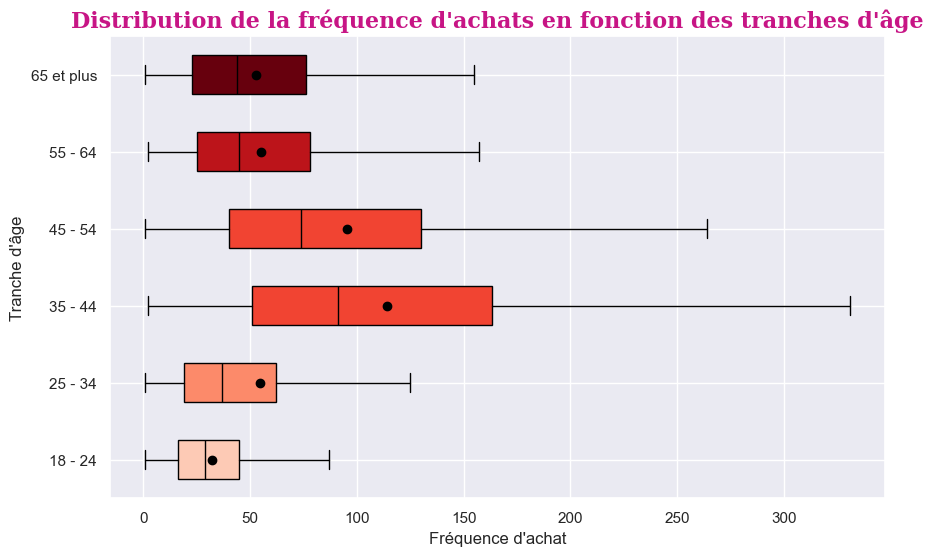

L'eta-squared est de  0.19298505064892696


In [290]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

import matplotlib.cm as cm

# Regardons maintenant ce que donne la corrélation par Anova entre les variables tranche_âge (qualitative) et frequence_achats (quantitative)

X = "tranche_age" # qualitative
Y = "frequence_achats" # quantitative

plt.figure(figsize=(10, 6))
plt.title("Distribution de la fréquence d'achats en fonction des tranches d'âge", fontdict = font_title)  # Ajout du titre

modalites = frequence_achats[X].unique()
groupes = [frequence_achats[frequence_achats[X] == m][Y] for m in modalites]

medianprops = {'color': "black"}
meanprops = {'marker': 'o', 'markeredgecolor': 'black', 'markerfacecolor': 'black'}

colors = cm.get_cmap('Reds', len(groupes))

boxplot = plt.boxplot(
    groupes,
    labels=modalites,
    showfliers=False,
    vert=False,
    patch_artist=True,
    showmeans=True,
    medianprops=medianprops,
    meanprops=meanprops
)

for patch, color in zip(boxplot['boxes'], colors(np.linspace(0.3, 0.9, len(groupes)))):
    patch.set_facecolor(color)

plt.ylabel("Tranche d'âge")
plt.xlabel("Fréquence d'achat")
plt.show()

print("L'eta-squared est de ",eta_squared(frequence_achats[X],frequence_achats[Y]))

Testons maintenant la correlation entre les variables âge et catégorie avec le test de Kruskal-Wallis

+ L’hypothèse nulle (H0) : La médiane est la même pour tous les groupes de données = absence de différence
+ L’hypothèse alternative : (H1) : La médiane n’est pas égale pour tous les groupes de données = il y a une différence

In [292]:
# Création des groupes basés sur les tranches d'âge
groupes = [frequence_achats[frequence_achats['tranche_age'] == tranche]['frequence_achats'] 
           for tranche in frequence_achats['tranche_age'].unique()]

# Test de Kruskal-Wallis
kruskal_wallis = kruskal(*groupes)  # Les groupes sont passés comme arguments séparés
print(f"Statistique de Kruskal-Wallis : {kruskal_wallis.statistic}, p-value : {kruskal_wallis.pvalue}")

Statistique de Kruskal-Wallis : 1746.8838683611705, p-value : 0.0


In [295]:
# Calculer la fréquence d'achat par client
purchase_frequency_per_client = data_final2.groupby('client_id')['session_id'].nunique()

# Associer chaque client à son groupe d'âge
age_groups = data_final2.groupby('client_id')['tranche_age'].first()

# Préparer les données pour le test de Kruskal-Wallis
grouped_data = [purchase_frequency_per_client[age_groups == age_group] for age_group in age_groups.unique()]

# Appliquer le test de Kruskal-Wallis si les groupes sont valides
if len(grouped_data) > 1 and all(len(group) > 0 for group in grouped_data):
    kruskal_result = kruskal(*grouped_data)
    print(f"Statistique de Kruskal-Wallis: {kruskal_result.statistic:.4f}, p-value: {kruskal_result.pvalue:.4f}")
else:
    print("Impossible d'appliquer le test de Kruskal-Wallis : un ou plusieurs groupes sont vides ou trop petits.")

# Vérifier la normalité de la fréquence d'achat par client
stat_purchase, p_value_purchase = shapiro(purchase_frequency_per_client)
print(f"Shapiro-Wilk test pour la fréquence d'achat: Stat={stat_purchase:.4f}, p-value={p_value_purchase:.4f}")

# Associer chaque client à son âge
age_per_client = data_final2.groupby('client_id')['age'].first()

# Vérifier la normalité de l'âge
stat_age, p_value_age = shapiro(age_per_client)
print(f"Shapiro-Wilk test pour l'âge: Stat={stat_age:.4f}, p-value={p_value_age:.4f}")

# Appliquer la corrélation appropriée
if p_value_age > 0.05 and p_value_purchase > 0.05:
    # Utiliser Pearson si les deux distributions sont normales
    correlation, p_value = pearsonr(purchase_frequency_per_client, age_per_client)
    print(f"Corrélation de Pearson: {correlation:.4f}, p-value: {p_value:.4f}")
else:
    # Utiliser Spearman si une des deux distributions n'est pas normale
    correlation, p_value = spearmanr(purchase_frequency_per_client, age_per_client)
    print(f"Corrélation de Spearman: {correlation:.4f}, p-value: {p_value:.4f}")

Statistique de Kruskal-Wallis: 1061.3645, p-value: 0.0000
Shapiro-Wilk test pour la fréquence d'achat: Stat=0.8582, p-value=0.0000
Shapiro-Wilk test pour l'âge: Stat=0.9697, p-value=0.0000
Corrélation de Spearman: 0.2134, p-value: 0.0000


In [293]:
# Fixer un seuil minimum pour garder les groupes non vides et suffisamment grands
min_group_size = 100

# Filtrer les groupes d'âge qui ont suffisamment de clients
filtered_age_groups = age_groups.groupby(age_groups).filter(lambda x: len(x) >= min_group_size)

# Créer une nouvelle série contenant seulement les clients des groupes suffisamment grands
filtered_purchase_frequency = purchase_frequency_per_client[filtered_age_groups.index]

# Afficher la taille des groupes restants après filtrage
group_sizes = filtered_age_groups.groupby(filtered_age_groups).size()
print("Taille des groupes restants :")
print(group_sizes)

Taille des groupes restants :
tranche_age
18 - 24       1146
25 - 34       1560
35 - 44       1779
45 - 54       1609
55 - 64       1227
65 et plus    1273
Name: tranche_age, dtype: int64


In [294]:
# Préparer les données pour le test de Kruskal-Wallis à partir des données filtrées
grouped_data = [filtered_purchase_frequency[filtered_age_groups == age_group] for age_group in filtered_age_groups.unique()]

# Appliquer le test de Kruskal-Wallis
kruskal_result = kruskal(*grouped_data)
print(f"Statistique de Kruskal-Wallis: {kruskal_result.statistic:.4f}, p-value: {kruskal_result.pvalue:.4f}")

# Interprétation des résultats
print("La statistique de Kruskal-Wallis est utilisée pour déterminer s'il existe une différence significative dans la fréquence d'achat entre les différents groupes d'âge.")


Statistique de Kruskal-Wallis: 1061.3645, p-value: 0.0000
La statistique de Kruskal-Wallis est utilisée pour déterminer s'il existe une différence significative dans la fréquence d'achat entre les différents groupes d'âge.


**Interprétation des résultats**

<div class="alert alert-block alert-info">
    
La p-value est inférieure à notre seuil de significativité de 5%, nous <b>rejetons donc l'hypothèse nulle</b> en faveur de l'alternative : il y a bien une corrélation négative entre l'âge et la fréquence d'achat.

Nous constatons qu'à partir de 40 ans, la fréquence d'achat diminue avec l'âge.
    
</div>

# <span style="color : #8470FF"><u>4.Lien entre l’âge des clients et la taille du panier moyen</u></span>

**Hypothèses et niveau de confiance**

*Quelques hypothèses:*

- Il y a un lien entre l'âge d'un client et la taille du panier
- Plus un client est âgé et plus la taille du panier est faible
- Le panier moyen est le plus élevé pour les clients âgés entre 30 et 50 ans
- Il n'y a pas de lien entre l'âge d'un client et la taille du panier

Nous procéderons au test des hypothèses suivantes:

- **Hypothèse nulle H0** = pas de corrélation entre l'âge et la taille du panier moyen.

- **Hypothèse alternative H1** = corrélation entre l'âge et la taille du panier moyen.

Nous choisissons un niveau de confiance de 95 %, c'est-à-dire que nous rejetterons l'hypothèse nulle en faveur de l'alternative si la p-value est inférieure à 0,05.

Nous sommes à nouveau dans la situation où nous souhaitons analyser la relation entre 2 variables quantitatives.
La distribution de la variable "âge" ne suivant pas une loi normale, nous optons à nouveau pour un test non paramétrique qui sera toujours le test de **corrélation de Spearman.** Nous effectuons une représentation graphique des données via un diagramme de dispersion.

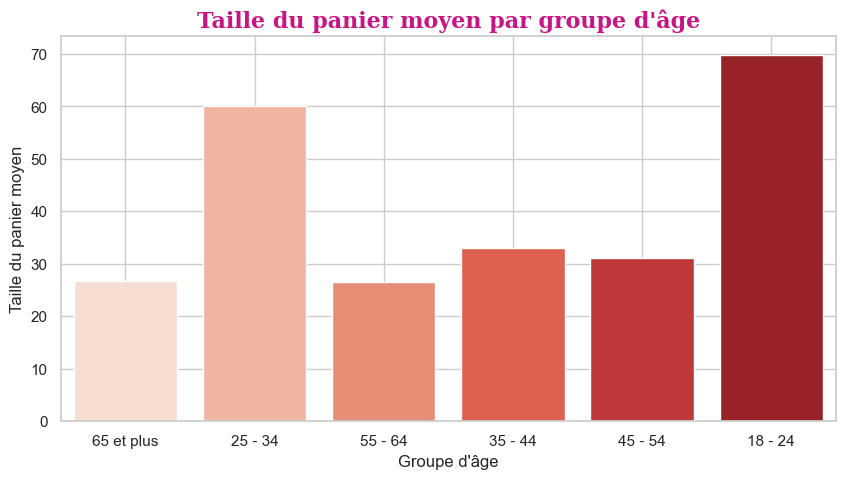

In [250]:
# Calculer la taille du panier moyen par client
age_basket_size2 = data_final2.groupby('client_id').agg({
    'tranche_age': 'first',  # Utilise le groupe d'âge
    'price': lambda x: x.sum() / data_final2.loc[x.index, 'session_id'].nunique()  # Calcul du panier moyen par client
})

# Visualisation avec un barplot par groupe d'âge
plt.figure(figsize=(10, 5))
sns.barplot(x='tranche_age', y='price', data=age_basket_size2, errorbar=None, palette='Reds')
plt.title("Taille du panier moyen par groupe d'âge", fontdict = font_title)
plt.xlabel("Groupe d'âge")
plt.ylabel("Taille du panier moyen")
plt.grid(True)
plt.show()

In [307]:
# Allons chercher nos données

panier_moyen_par_age = round(data_final2.groupby(['client_id','age','tranche_age'])['price'].mean().reset_index(),2)
panier_moyen_par_age.rename(columns = {'price': 'panier_moyen'}, inplace=True)
panier_moyen_par_age.sort_values(['tranche_age'],inplace=True)   
panier_moyen_par_age.head()

client_id  age tranche_age  panier_moyen
3519    c_4175   22     18 - 24         31.08
8592     c_998   22     18 - 24         52.45
2565    c_3311   23     18 - 24         38.77
4292    c_4874   19     18 - 24         49.52
2567    c_3313   23     18 - 24         56.64

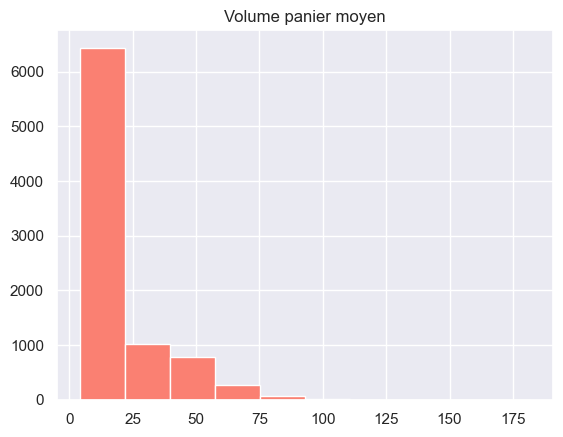

In [311]:
# Regardons graphiquement la distribution de la variable panier_moyen

panier_moyen_par_age['panier_moyen'].hist(color='salmon')
plt.title("Volume panier moyen")
plt.show()

In [317]:
# Test shapiro

shapiro(panier_moyen_par_age['panier_moyen'])
stat_purchase, p_value_purchase = shapiro(panier_moyen_par_age['panier_moyen'])
print(f"Shapiro-Wilk test pour le panier moyen : Stat={stat_purchase}, p-value={p_value_purchase}")

Shapiro-Wilk test pour le panier moyen : Stat=0.6841273307800293, p-value=0.0


In [325]:
# Calculer la taille du panier moyen par client
panier_moyen = data_final2.groupby('client_id').apply(lambda x: x['price'].sum() / x['session_id'].nunique())

# Vérifier la normalité de l'âge
age = data_final2.groupby('client_id')['age'].first()
stat_age, p_value_age = shapiro(age)
print(f"Shapiro-Wilk test pour l'âge: Stat={stat_age}, p-value={p_value_age}")

# Vérifier la normalité du montant total des achats par client
total_purchase_per_client = data_final2.groupby('client_id')['price'].sum()
stat_purchase, p_value_purchase = shapiro(panier_moyen)
print(f"Shapiro-Wilk test pour le panier moyen : Stat={stat_purchase}, p-value={p_value_purchase}")


Shapiro-Wilk test pour l'âge: Stat=0.9697288870811462, p-value=4.6438064211784054e-39
Shapiro-Wilk test pour le panier moyen : Stat=0.8142165541648865, p-value=0.0


In [324]:
# Appliquer la corrélation appropriée
if p_value_age > 0.05 and p_value_purchase > 0.05:
    # Utiliser Pearson si les deux sont normales
    correlation, p_value = pearsonr(age, panier_moyen)
    print(f"Corrélation de Pearson: {correlation}, p-value: {p_value}")
else:
    # Utiliser Spearman si une des deux n'est pas normale
    correlation, p_value = spearmanr(age, panier_moyen)
    print(f"Corrélation de Spearman: {correlation}, p-value: {p_value}")

Corrélation de Spearman: -0.6954825708219955, p-value: 0.0


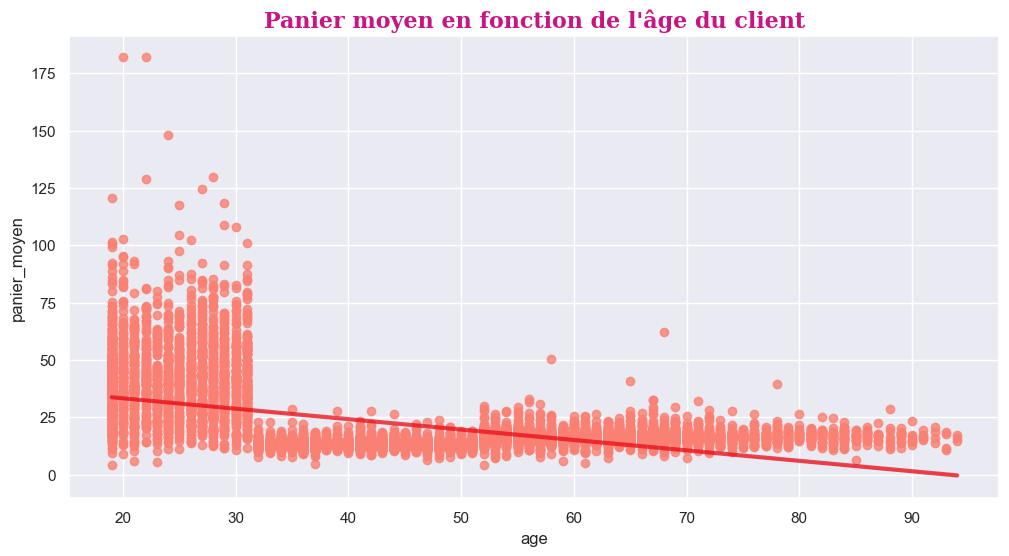

In [322]:
# Regardons cela avec une représentation graphique

plt.figure(figsize = (12,6))
plt.title("Panier moyen en fonction de l'âge du client", fontdict = font_title)
plt.xlabel("age")
plt.ylabel("montant du panier moyen")
sns.regplot(x = panier_moyen_par_age['age'], y = panier_moyen_par_age['panier_moyen'], color='salmon',line_kws={"color":"r","alpha":0.7,"lw":3})
plt.show()

**Interprétation des résultats**

<div class="alert alert-block alert-info">
    
La p-value est inférieure à notre seuil de significativité de 5%, nous <b>rejetons donc l'hypothèse nulle</b> en faveur de l'alternative: il y a bien une corrélation négative entre l'âge et la taille du panier moyen.

Nous constatons que le panier moyen est plus élevé entre 30 et 50 ans.
    
</div>

# <span style="color : #8470FF"><u>5.Lien entre l’âge des clients et les catégories des livres achetés</u></span>

**Hypothèses et niveau de confiance**

*Quelques hypothèses:*

- Il y a un lien entre l'âge d'un client et les catégories des livres achetés
- Les produits de la catégorie 2 intéressent davantage les clients jeunes
- La catégorie 1 est celle qui rassemble l'ensemble des âges
- Les personnes âgées ne s'intéressent pas aux produits de catégories 0 et 2
- Il n'y a pas de lien entre l'âge d'un client et les catégories des livres achetés

Nous procéderons au test des hypothèses suivantes:

- **Hypothèse nulle H0** = pas de lien entre l'âge et les catégories des livres achetés.
- **Hypothèse alternative H1** = lien entre l'âge et les catégories des livres achetés.

Nous choisissons un niveau de confiance de 95 %, c'est-à-dire que nous rejetterons l'hypothèse nulle en faveur de l'alternative si la p-value est inférieure à 0,05.

Nous sommes ici dans la situation où nous souhaitons analyser la corrélation entre 1 variable quantitative (âge) et 1 variable qualitative à 3 modalités (catégories 0,1,2). La distribution de la variable "âge" ne suivant pas une loi normale, nous optons donc pour un test non paramétrique qui sera le test de **Kruskall-Wallis**.
Nous effectuons une représentation graphique des données via un boxplot.

In [252]:
# calculer le CA par âge
cat_age_liv = data_final2.groupby(["age", "categ"])["price"].sum().sort_values(ascending = False).reset_index()
cat_age_liv.head(5)

age    categ      price
0   19  categ_2  439537.37
1   35  categ_0  194967.18
2   27  categ_2  193482.29
3   45  categ_0  192763.48
4   44  categ_0  189442.82

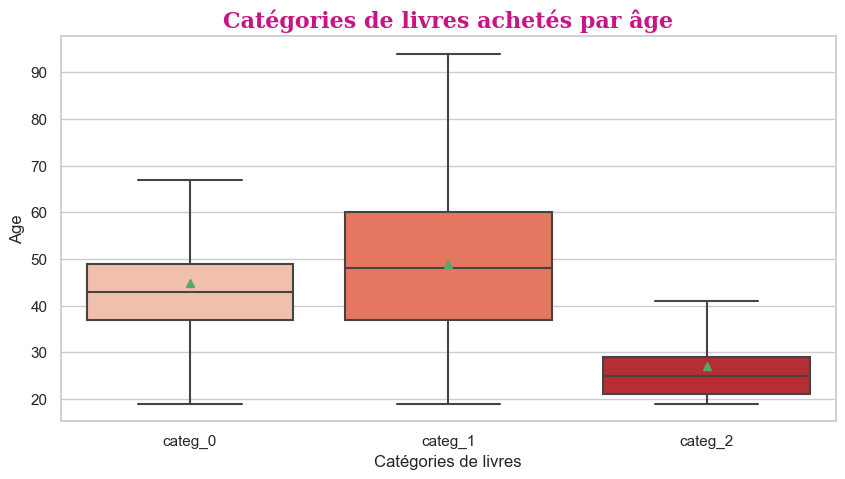

In [253]:
# Boites à moustache
plt.figure(figsize = (10, 5))
sns.boxplot(x = data_final2["categ"], y= data_final2["age"], data = data_final, showfliers=False, showmeans=True, palette = "Reds")
plt.xlabel("Catégories de livres")
plt.ylabel("Age")
plt.title("Catégories de livres achetés par âge", fontdict = font_title)
plt.show()

In [326]:
# Nous allons commencer par réaliser un tableau de contingence

X = "tranche_age"
Y = "categ"

conting = data_final2[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
conting

categ        categ_0  categ_1  categ_2   Total
tranche_age                                   
18 - 24         8217    14121    14526   36864
25 - 34        45003    25374    14601   84978
35 - 44       152606    49477      777  202860
45 - 54       107006    45711      635  153352
55 - 64        28791    38212      634   67637
65 et plus     28446    37882      607   66935
Total         370069   210777    31780  612626

In [328]:
# Calculons maintenant le Khi2, la p-value ainsi que le nombre de degrés de liberté

chi2, p, dof, exp = chi2_contingency(conting)
print("le khi2 est de",round(chi2,2))
print("la p-value est de",round(p,5))
print("le nombre de degrés de liberté est de",dof)

le khi2 est de 180322.25
la p-value est de 0.0
le nombre de degrés de liberté est de 18


* On observe une différence significative de la moyenne (points verts) d’âge au sein des deux groupes (catégories de livres)
* On pourrait penser qu’il y a bien une différence entre l’age median et la catégorie de livres achetés c'est à dire l'âge différe selon la catégorie de livres achetés

In [254]:
age_category_distribution

categ        categ_0  categ_1  categ_2
tranche_age                           
18 - 24         8217    14121    14526
25 - 34        45003    25374    14601
35 - 44       152606    49477      777
45 - 54       107006    45711      635
55 - 64        28791    38212      634
65 et plus     28446    37882      607

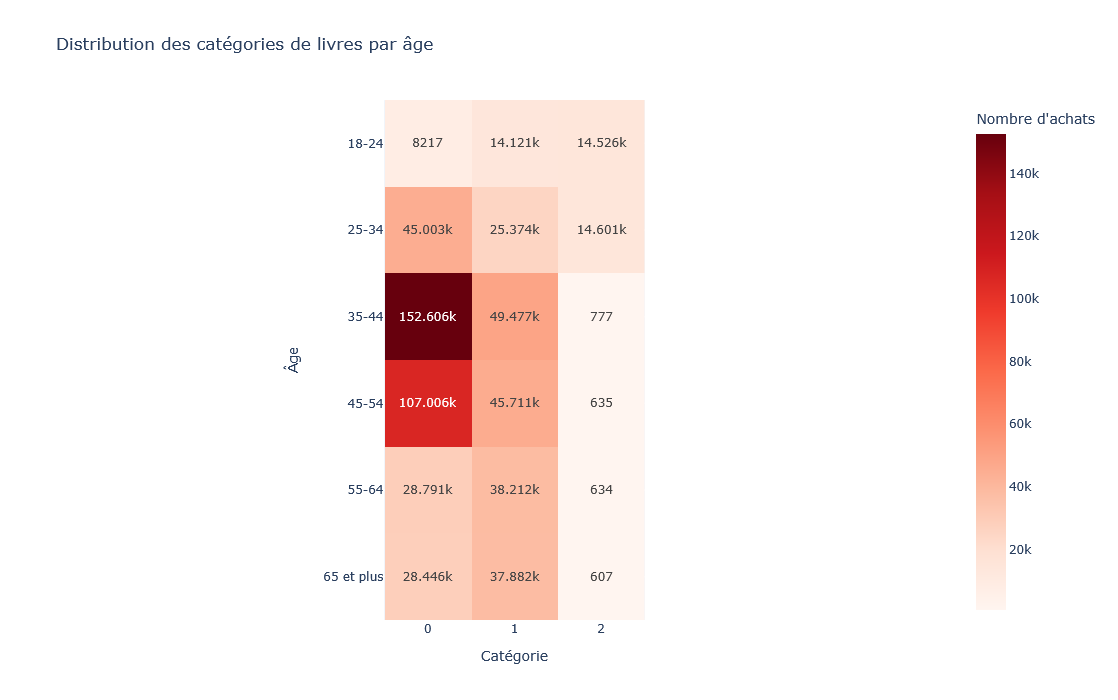

In [255]:
fig_category_distribution = px.imshow(age_category_distribution,
                                                text_auto=True, title = "Distribution des catégories de livres par âge",
                                      labels=dict(x = "Catégorie", y = "Âge", color = "Nombre d'achats"),
                                                x=['0', '1', '2'],
                                                y=['18-24', '25-34', '35-44', '45-54', '55-64', '65 et plus'], color_continuous_scale='Reds', width=1000,  # Largeur de la figure
    height=700)
                 

    
    
fig_category_distribution.show()

In [331]:
# Regardons avec le Test V de Cramer

X2 = chi2_contingency(conting, correction=False)[0]
N = np.sum(conting)
minimum_dimension = min(conting.shape)-1
  
# Calculate Cramer's V
result = np.sqrt((X2/N) / minimum_dimension)
  
# Print the result
print(result)

categ
categ_0    0.284976
categ_1    0.377605
categ_2    0.972461
Total      0.221489
dtype: float64


In [256]:
# Créer une table de contingence entre les groupes d'âge et les catégories de livres
contingency_table = pd.crosstab(data_final2['tranche_age'], data_final2['categ'])

# Appliquer le test du Chi-carré
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

# Interprétation des résultats
if p < 0.05:
    print("\nInterprétation:")
    print(f"Le test du Chi-carré montre une différence significative dans la distribution des catégories de livres entre les différents groupes d'âge (Chi2 = {chi2:.4f}).")
else:
    print("\nInterprétation:")
    print("Le test du Chi-carré ne montre pas de différence significative entre les groupes d'âge en termes de distribution des catégories de livres.")

Chi-Square Statistic: 180322.24558078725, p-value: 0.0

Interprétation:
Le test du Chi-carré montre une différence significative dans la distribution des catégories de livres entre les différents groupes d'âge (Chi2 = 180322.2456).


**Interprétation des résultats**

<div class="alert alert-block alert-info">
    
La p-value est inférieure à notre seuil de significativité de 5%, nous <b>rejetons donc l'hypothèse nulle</b> en faveur de l'alternative : il y a bien un lien entre l'âge et les catégories des livres achetés.
    
</div>

In [257]:
# Calculer le montant total des achats par client
total_purchase_per_client = data_final2.groupby('client_id')['price'].sum()

# Calculer la fréquence d'achat par client (nombre de transactions)
purchase_frequency_per_client = data_final2.groupby('client_id')['session_id'].nunique()

# Calculer la taille du panier moyen par client
panier_moyen = data_final2.groupby('client_id').apply(lambda x: x['price'].sum() / x['session_id'].nunique())

# Extraire la catégorie du client (si applicable)
categ = data_final2.groupby('client_id')['categ'].first()

age = data_final2.groupby('client_id')['age'].first()

# Créer un DataFrame avec toutes les variables
df_correlation = pd.DataFrame({
    'age': age,
    'total_achat': total_purchase_per_client,
    'frenquence_achat': purchase_frequency_per_client,
    'panier_moyen': panier_moyen,
    'categ': categ
})

# Afficher les premières lignes pour vérification
df_correlation.head()



age  total_achat  frenquence_achat  panier_moyen    categ
client_id                                                           
c_1         68       550.19                32     17.193438  categ_0
c_10        67      1353.60                34     39.811765  categ_1
c_100       31       254.85                 5     50.970000  categ_0
c_1000      57      2209.92                91     24.284835  categ_0
c_1001      41      1720.08                44     39.092727  categ_0

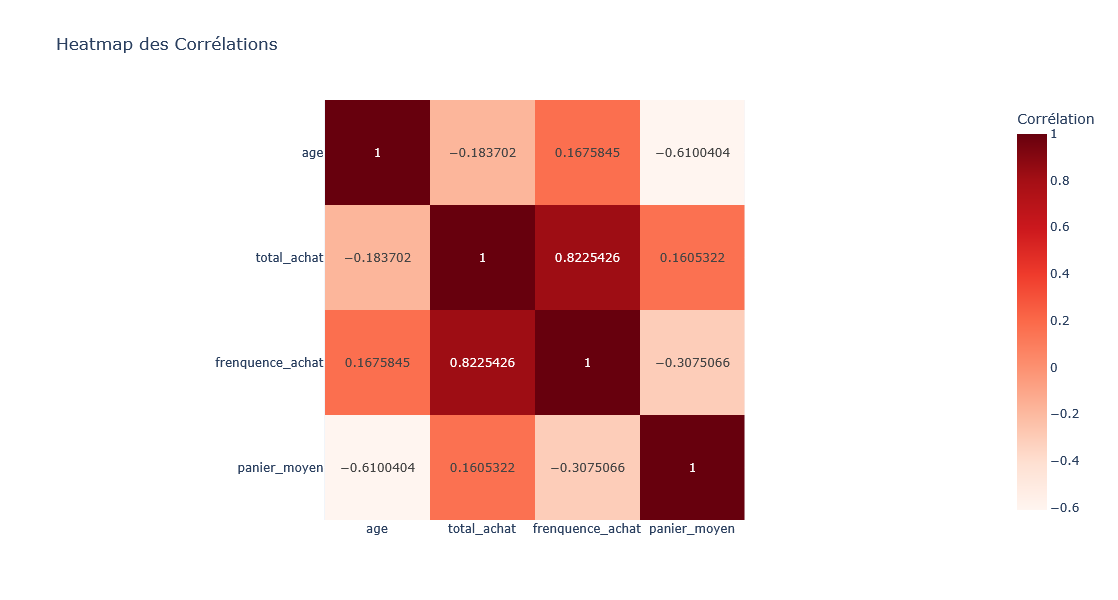

In [258]:
# Étape 1 : Ajouter la colonne categ
categories = ['categ_0', 'categ_1', 'categ_2']
df_correlation['categ'] = categories * (len(df_correlation) // len(categories)) + categories[:len(df_correlation) % len(categories)]

# Étape 2 : Encodage de categ
df_correlation['categ_encoded'] = df_correlation['categ'].astype('category').cat.codes

# Étape 3 : Calcul de la matrice de corrélation
df_numeric = df_correlation.select_dtypes(include=['float', 'int'])
correlation_matrix = df_numeric.corr()

# Étape 4 : Visualisation avec px.imshow
fig = px.imshow(
    correlation_matrix,
    text_auto=True,
    title="Heatmap des Corrélations",
    labels=dict(color="Corrélation"),
    color_continuous_scale='Reds',
    width=800,
    height=600
)
fig.show()

### <span style="color:RGB(51,165,182);">Conclusion</span>

Les résultats de la matrice de corrélation révèlent plusieurs relations significatives entre l'âge des clients, leurs habitudes d'achat, et les catégories de produits qu'ils préfèrent :

- **Âge et Panier Moyen** : Une corrélation négative modérément forte (-0.666535) indique que les clients plus âgés ont tendance à avoir un panier moyen plus faible.
  
  - **Conseil** : Créez des offres spéciales ou des promotions ciblées pour les groupes d'âge plus avancés, afin d'augmenter la taille de leur panier moyen. Adaptez également la sélection de produits ou les recommandations en fonction de l'âge.

- **Âge et Total des Achats** : Une légère corrélation négative (-0.189402) suggère que le total des achats diminue légèrement avec l'âge.
  
  - **Conseil** : Bien que cette corrélation soit faible, examinez les produits ou services que les clients plus âgés achètent moins fréquemment et réfléchissez à des stratégies pour encourager leurs achats dans ces catégories.

- **Âge et Fréquence d'Achat** : Une corrélation positive faible (0.176295) montre que les clients plus âgés achètent légèrement plus fréquemment.
  
  - **Conseil** : Capitalisez sur cette tendance en fidélisant davantage les clients plus âgés avec des programmes de fidélité, des newsletters personnalisées, ou des rappels d'achat réguliers.

- **Total des Achats et Fréquence d'Achat** : Une corrélation très forte (0.847650) confirme que plus un client achète fréquemment, plus son total d'achat est élevé.
  
  - **Conseil** : Encouragez la fréquence des achats avec des offres limitées dans le temps, des abonnements, ou des avantages pour les clients réguliers.

- **Panier Moyen et Fréquence d'Achat** : Une corrélation négative modérée (-0.270738) indique que les clients qui achètent plus souvent ont tendance à avoir un panier moyen plus faible.
  
  - **Conseil** : Explorez des moyens d'augmenter le panier moyen pour les acheteurs fréquents, comme des ventes incitatives (« upselling »), des suggestions de produits complémentaires, ou des seuils pour obtenir des réductions.

- **Panier Moyen et Catégorie de Produits** : Une corrélation positive modérée (0.318386) suggère que certaines catégories de produits sont associées à des paniers moyens plus élevés.
  
  - **Conseil** : Identifiez les catégories de produits qui conduisent à des paniers moyens plus élevés et concentrez vos efforts marketing sur celles-ci. Proposez des recommandations basées sur ces catégories pour encourager des achats plus importants.

### <span style="color:RGB(51,165,182);">Résumé des Conseils</span>

- **Segmentez par Âge** : Personnalisez les offres et recommandations pour chaque groupe d'âge.
- **Fidélisez les Clients** : Augmentez la fréquence des achats avec des avantages pour les clients réguliers.
- **Augmentez le Panier Moyen** : Utilisez des techniques d'upselling et des recommandations ciblées pour accroître la valeur moyenne des paniers.
- **Ciblez les Catégories** : Mettez en avant les catégories de produits qui génèrent des paniers moyens plus élevés.